# Exploratory Data Analysis on House Prices Data
- Correlation on Train Data
- Join test and train data
- Correlation on Combined Data
- Data Dictionary
- Change columns to appropriate types in Train Data
    - Train Data
        - categorical | add order for categorical data
        - Columns that has missing categories 
    - Test Data    
        - categorical | add order for categorical data
        - Columns that has missing categories 
        - Save test file
- Handling Missing Data
    - Identify columns with missing values in combined data
    - Analysis of columns with missing values
    - Filling missing values
- Save processed data    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix

from scipy import stats

%matplotlib inline

In [2]:
train_data = pd.read_csv('data/train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
train_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
train_data['Id'].min(), train_data['Id'].max()

(1, 1460)

In [6]:
test_data = pd.read_csv('data/test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
test_data.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [8]:
test_data['Id'].min(), test_data['Id'].max()

(1461, 2919)

In [9]:
test_data['Id'].max() - test_data['Id'].min()

1458

## Correlation on Train Data

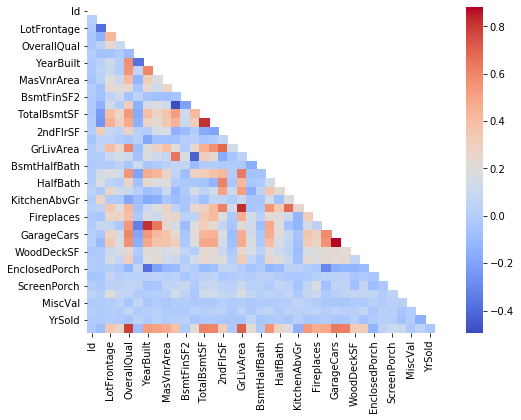

In [10]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)

mask = np.triu(train_data.corr())

sns.heatmap(train_data.corr(), mask=mask, cmap= 'coolwarm')#,annot=True)


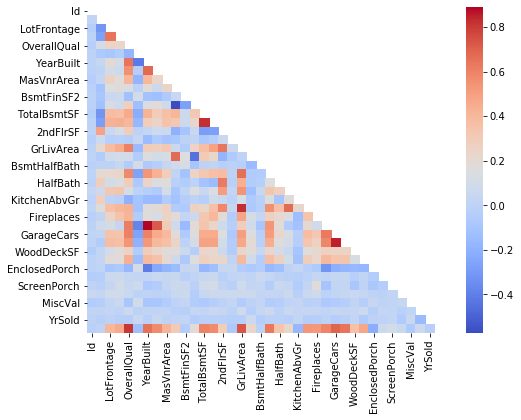

In [11]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)

mask = np.triu(train_data.corr(method='spearman'))

sns.heatmap(train_data.corr(method='spearman'), mask=mask, cmap= 'coolwarm')

In [12]:
#scatter_matrix(train_data)
#plt.show()

## Join test and train data 

In [13]:
# is sale price less than 0 
(train_data['SalePrice'] < 0).sum()

0

In [14]:
# let's add a SalePrice column so that we can combine the two dataframes
test_data['SalePrice'] = -999

In [15]:
len(train_data), len(test_data)

(1460, 1459)

In [16]:
len(train_data.columns), len(test_data.columns)

(81, 81)

In [17]:
data = pd.concat([train_data, test_data])
data.shape

(2919, 81)

## Correlation on Combined  Data

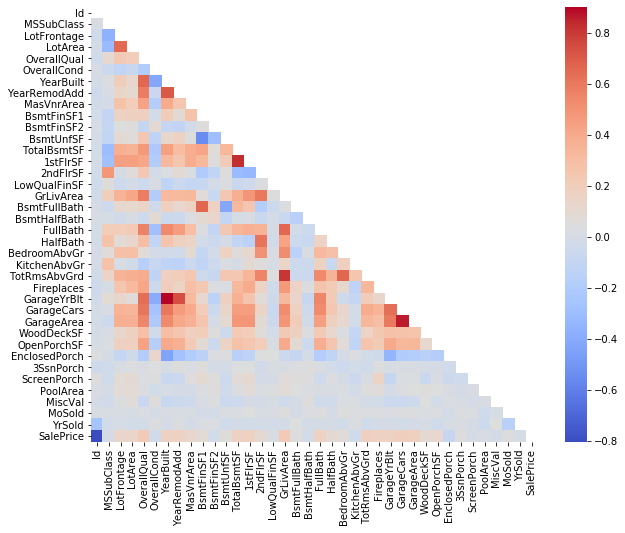

In [18]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

mask = np.triu(data.corr(method='spearman'))

sns.heatmap(data.corr(method='spearman'), mask=mask, cmap= 'coolwarm')


The above heatmap shows that negative correlations have changed and moved towrds positive number. Ignore 'Saleprice' because we added -999 for now

## Data Dictionary

Following columns are ordered:

    - OverallQual 
    - OverallCond 
    - orderded
    - ExterQual 
    - ExterCond 
    - Ordered
    - BsmtQual 
    - BsmtCond
    - HeatingQC
    - KitchenQual
    - FireplaceQu
    - GarageQual
    - GarageCond
    - PoolQC
    - BsmtFullBath -- Odered (more is better)
    - BsmtHalfBath -- (no-negative trend )
    - FullBath -- ordered (upward trend)
    - HalfBath -- ordered (upward trend)
    - BedroomAbvGr -- ordered (upward trend)
    - KitchenAbvGr -- ordered (down trend)
    - TotRmsAbvGrd -- ordered (upward trend)
    - Fireplaces -- ordered (upward trend)
    - GarageCars -- ordered (upward trend)

Following columns can be considered to be ordered:
    - BsmtExposure 
    - BsmtFinType1 
    - BsmtFinType2
    
Following can be binned:
    - MSSubClass
    - YearBuilt
    - YearRemodAdd
    - GarageYrBlt
    - YrSold  

In [19]:
data_dict = {
    'MSSubClass': [20,30,40,45,50, 60,70,75,80,85,90,120,150,160,180,190], 
    'MSZoning': ['A', 'C (all)', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], 
    'Street': ['Grvl', 'Pave'], 
    'Alley': ['Grvl', 'Pave'], 
    'LotShape': ['Reg','IR1', 'IR2', 'IR3'], 
    'LandContour': ['Lvl','Bnk', 'HLS','Low'], 
    'Utilities': ['AllPub','NoSewr','NoSeWa','ELO'],
    'LotConfig': ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], 
    'LandSlope': ['Gtl', 'Mod', 'Sev'], 
    'Neighborhood': ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert'
                    ,'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 
                    'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'], 
    'Condition1': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 
    'Condition2': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 
    'BldgType': ['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI'], 
    'HouseStyle': ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'], 
    'OverallQual': np.arange(1,11), 
    'OverallCond': np.arange(1,11), 
    'RoofStyle': ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'], 
    'RoofMatl': ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'], 
    'Exterior1st': ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 
                   'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
    'Exterior2nd': ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 
                   'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
    'MasVnrType': ['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone'], 
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd','Ex'], 
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd','Ex'], 
    'Foundation': ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], 
    'BsmtQual': ['Po', 'Fa', 'TA', 'Gd','Ex'],
    'BsmtCond': ['Po', 'Fa', 'TA', 'Gd','Ex'], 
    'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'], 
    'BsmtFinType1': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'],
    'BsmtFinType2': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'],
    'Heating': ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'], 
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd','Ex'],
    'CentralAir': ['N', 'Y'],
    'Electrical': ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], 
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd','Ex'],
    'Functional': ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], 
    'FireplaceQu': ['Po', 'Fa', 'TA', 'Gd','Ex'],
    'GarageType': ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd'],
    'GarageFinish': ['Fin', 'RFn', 'Unf'],
    'GarageQual': ['Po', 'Fa', 'TA', 'Gd','Ex'],
    'GarageCond': ['Po', 'Fa', 'TA', 'Gd','Ex'],
    'PavedDrive': ['N', 'P', 'Y'], 
    'PoolQC':  ['Fa', 'TA', 'Gd','Ex'], 
    'Fence': ['GdPrv', 'MnPrv', 'GdWo', 'MnWw'], 
    'MiscFeature': ['Elev', 'Gar2', 'Othr', 'Shed', 'TenC'],
    'SaleType': ['WD', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD','Oth'], 
    'SaleCondition': ['Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial'], 
    'BsmtFullBath': np.arange(0,4), 
    'BsmtHalfBath': np.arange(0, 3),
    'FullBath': np.arange(0,5),
    'HalfBath': np.arange(0,3), 
    'BedroomAbvGr': np.arange(0,9),
    'KitchenAbvGr' : np.arange(0,4), 
    'TotRmsAbvGrd' : np.arange(0, 16), 
    'Fireplaces' : np.arange(0,5), 
    'GarageCars' : np.arange(0,6), 
    'MoSold' : np.arange(1,13)
   
}

len(data_dict.keys())

56

## Change columns to appropriate types in combined data

In [20]:
#

In [21]:
order_cat = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
             'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'BsmtExposure', 'BsmtFinType1',
             'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
             'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

# year is categorical variable becuase it makes no sense to add two years. 
# Also house build in 2010 is better than the one built in 1980

year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold'] 

In [22]:
cat_cols = data.select_dtypes('object').columns.values
cat_cols

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [23]:
# columns that are categorical but not object type
additional_cat = [key for key in data_dict.keys() if key not in cat_cols]
cat_cols = np.concatenate((cat_cols, additional_cat))
cat_cols

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass',
       'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold'], dtype=object)

In [24]:
for col in cat_cols:
    is_ordered = True if col in order_cat else False
    data[col] = pd.Categorical(data[col], categories=data_dict[col], ordered=is_ordered)

In [25]:
# add categories for categrical data
for col in year_cols:
    data[col] = pd.Categorical(data[col], ordered=True)

In [26]:
data.select_dtypes('category').describe()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
count         2919     2915   2919   198     2919        2919      2917   
unique          16        5      2     2        4           4         2   
top             20       RL   Pave  Grvl      Reg         Lvl    AllPub   
freq          1079     2265   2907   120     1859        2622      2916   

       LotConfig LandSlope Neighborhood  ... GarageQual GarageCond PavedDrive  \
count       2919      2919         2476  ...       2760       2760       2919   
unique         5         3           24  ...          5          5          3   
top       Inside       Gtl      CollgCr  ...         TA         TA          Y   
freq        2133      2778          267  ...       2604       2654       2641   

       PoolQC  Fence  MiscFeature  MoSold  YrSold SaleType SaleCondition  
count      10    571          105    2919    2919     2918          2919  
unique      3      4            4      12       5        9             6  
top        Ex  MnPrv         Shed       6    2007       WD        Normal  
freq        4    329           95     503     692     2525          2402  

[4 rows x 60 columns]

In [27]:
data['YrSold'].min(), data['OverallQual'].max(), data['ExterQual'].min(), data['ExterQual'].max()

(2006, 10, 'Fa', 'Ex')

### Columns that has missing categories

In [28]:
temp = pd.DataFrame(data.select_dtypes('category').describe())
temp

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
count         2919     2915   2919   198     2919        2919      2917   
unique          16        5      2     2        4           4         2   
top             20       RL   Pave  Grvl      Reg         Lvl    AllPub   
freq          1079     2265   2907   120     1859        2622      2916   

       LotConfig LandSlope Neighborhood  ... GarageQual GarageCond PavedDrive  \
count       2919      2919         2476  ...       2760       2760       2919   
unique         5         3           24  ...          5          5          3   
top       Inside       Gtl      CollgCr  ...         TA         TA          Y   
freq        2133      2778          267  ...       2604       2654       2641   

       PoolQC  Fence  MiscFeature  MoSold  YrSold SaleType SaleCondition  
count      10    571          105    2919    2919     2918          2919  
unique      3      4            4      12       5        9             6  
top        Ex  MnPrv         Shed       6    2007       WD        Normal  
freq        4    329           95     503     692     2525          2402  

[4 rows x 60 columns]

In [29]:
print('col_name' , 'expected # of categories', ' --> ', 'actual # of categories', '-->', 'missing categories')
for i, key in enumerate(cat_cols):
    unique_val = temp.loc[['unique'], [key]].values[0][0]
    print(key , len(data_dict[key]), ' --> ', unique_val, '-->', (len(data_dict[key]) - unique_val))

col_name expected # of categories  -->  actual # of categories --> missing categories
MSZoning 8  -->  5 --> 3
Street 2  -->  2 --> 0
Alley 2  -->  2 --> 0
LotShape 4  -->  4 --> 0
LandContour 4  -->  4 --> 0
Utilities 4  -->  2 --> 2
LotConfig 5  -->  5 --> 0
LandSlope 3  -->  3 --> 0
Neighborhood 25  -->  24 --> 1
Condition1 9  -->  9 --> 0
Condition2 9  -->  8 --> 1
BldgType 5  -->  2 --> 3
HouseStyle 8  -->  8 --> 0
RoofStyle 6  -->  6 --> 0
RoofMatl 8  -->  8 --> 0
Exterior1st 17  -->  15 --> 2
Exterior2nd 17  -->  13 --> 4
MasVnrType 5  -->  4 --> 1
ExterQual 5  -->  4 --> 1
ExterCond 5  -->  5 --> 0
Foundation 6  -->  6 --> 0
BsmtQual 5  -->  4 --> 1
BsmtCond 5  -->  4 --> 1
BsmtExposure 4  -->  4 --> 0
BsmtFinType1 6  -->  6 --> 0
BsmtFinType2 6  -->  6 --> 0
Heating 6  -->  6 --> 0
HeatingQC 5  -->  5 --> 0
CentralAir 2  -->  2 --> 0
Electrical 5  -->  5 --> 0
KitchenQual 5  -->  4 --> 1
Functional 8  -->  7 --> 1
FireplaceQu 5  -->  5 --> 0
GarageType 6  -->  6 --> 0
GarageFi

In [30]:
data['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Elev     0
Name: MiscFeature, dtype: int64

In [31]:
data_dict['MiscFeature']

['Elev', 'Gar2', 'Othr', 'Shed', 'TenC']

In [32]:
len(data.columns)

81

## Split 'combined data' between test and train for separtae analysis

In [33]:
test_data = data[data['SalePrice'] == -999]

In [34]:
train_data = data[data['SalePrice'] != -999]

## Exploratory Analysis on each column

### Sale price


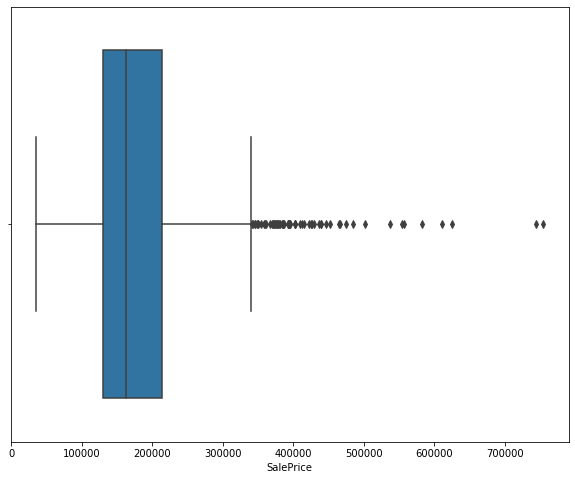

In [35]:
sns.boxplot(x=train_data['SalePrice'] )
plt.show()

In [36]:
train_data[train_data['SalePrice'] > 400000]

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
58      59         60       RL         66.0    13682   Pave   NaN      IR2   
161    162         60       RL        110.0    13688   Pave   NaN      IR1   
178    179         20       RL         63.0    17423   Pave   NaN      IR1   
185    186         75       RM         90.0    22950   Pave   NaN      IR2   
231    232         60       RL        174.0    15138   Pave   NaN      IR1   
278    279         20       RL        107.0    14450   Pave   NaN      Reg   
349    350         60       RL         56.0    20431   Pave   NaN      IR2   
389    390         60       RL         96.0    12474   Pave   NaN      Reg   
440    441         20       RL        105.0    15431   Pave   NaN      Reg   
473    474         20       RL        110.0    14977   Pave   NaN      IR1   
496    497         20       RL          NaN    12692   Pave   NaN      IR1   
515    516         20       RL         94.0    12220   Pave   NaN      Reg   
527    528         60       RL         67.0    14948   Pave   NaN      IR1   
591    592         60       RL         97.0    13478   Pave   NaN      IR1   
661    662         60       RL         52.0    46589   Pave   NaN      IR2   
664    665         20       RL         49.0    20896   Pave   NaN      IR2   
691    692         60       RL        104.0    21535   Pave   NaN      IR1   
769    770         60       RL         47.0    53504   Pave   NaN      IR2   
798    799         60       RL        104.0    13518   Pave   NaN      Reg   
803    804         60       RL        107.0    13891   Pave   NaN      Reg   
898    899         20       RL        100.0    12919   Pave   NaN      IR1   
1046  1047         60       RL         85.0    16056   Pave   NaN      IR1   
1142  1143         60       RL         77.0     9965   Pave   NaN      Reg   
1169  1170         60       RL        118.0    35760   Pave   NaN      IR1   
1182  1183         60       RL        160.0    15623   Pave   NaN      IR1   
1243  1244         20       RL        107.0    13891   Pave   NaN      Reg   
1353  1354         50       RL         56.0    14720   Pave   NaN      IR1   
1373  1374         20       RL          NaN    11400   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
58           HLS    AllPub  ...        0    NaN    NaN         NaN       0   
161          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
178          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
185          Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
231          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
278          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
349          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
389          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
440          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
473          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
496          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
515          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
527          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
591          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
661          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
664          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
769          HLS    AllPub  ...        0    NaN    NaN         NaN       0   
798          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
803          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
898          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1046         Lvl    AllPub  .

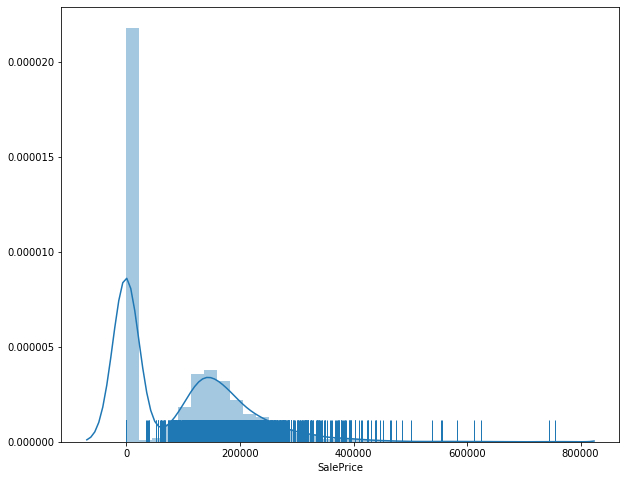

In [37]:
sns.distplot(data['SalePrice'], rug=True)

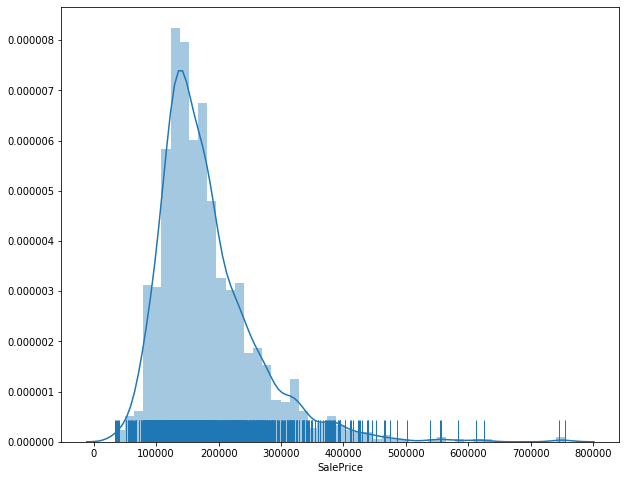

In [38]:
sns.distplot(train_data['SalePrice'], rug=True)

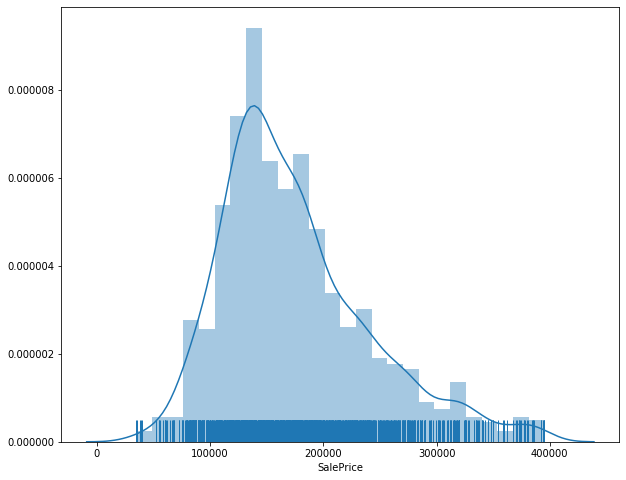

In [39]:
sns.distplot(train_data[(train_data['SalePrice'] > 0) & (train_data['SalePrice'] < 400000)]['SalePrice'], rug=True)

In [40]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [41]:
data[data['SalePrice'] < 0]

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461         20       RH         80.0    11622   Pave   NaN      Reg   
1     1462         20       RL         81.0    14267   Pave   NaN      IR1   
2     1463         60       RL         74.0    13830   Pave   NaN      IR1   
3     1464         60       RL         78.0     9978   Pave   NaN      IR1   
4     1465        120       RL         43.0     5005   Pave   NaN      IR1   
...    ...        ...      ...          ...      ...    ...   ...      ...   
1454  2915        160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916        160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917         20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918         85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919         60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
2            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            HLS    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold SaleType SaleCondition SalePrice  
0         6   2010       WD        Normal      -999  
1         6   2010       WD        Normal      -999  
2         3   2010       WD        Normal      -999  
3         6   2010       WD        Normal      -999  
4         1   2010       WD        Normal      -999  
...     ...    ...      ...           ...       ...  
1454      6   2006       WD        Normal      -999  
1455      4   2006       WD       Abnorml      -999  
1456      9   2006       WD       Abnorml      -999  
1457      7   2006       WD        Normal      -999  
1458     11   2006       WD        Normal      -999  

[1459 rows x 81 columns]

<font style='color: blue'> So, sales have potential outliers. Records where sale data is > 400K. But they can also be expensive houses. So don't delete them for now.</font>

## SalePrice vs other Categorical variables

### catplot

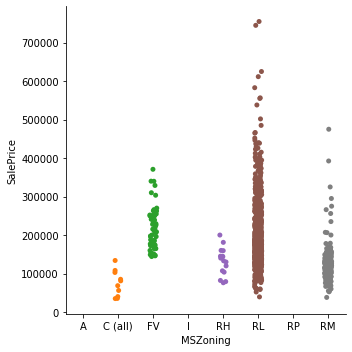

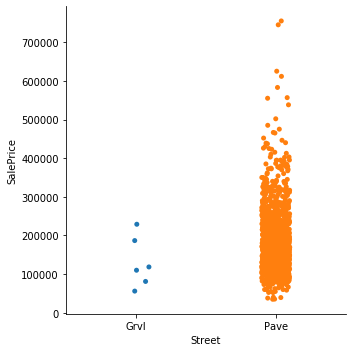

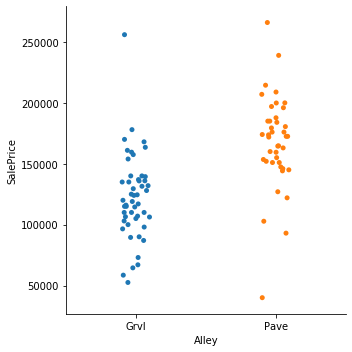

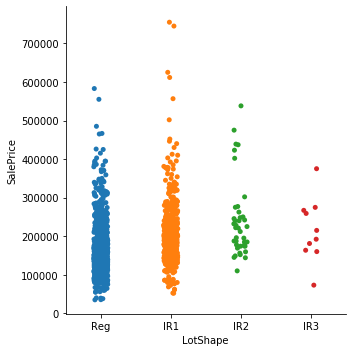

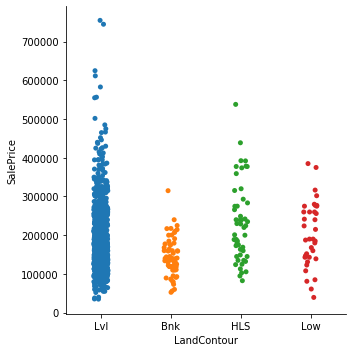

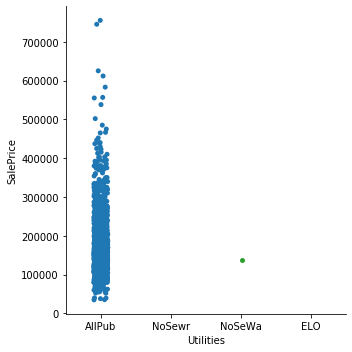

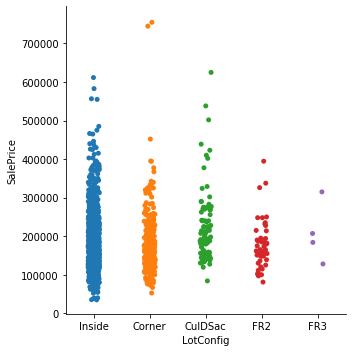

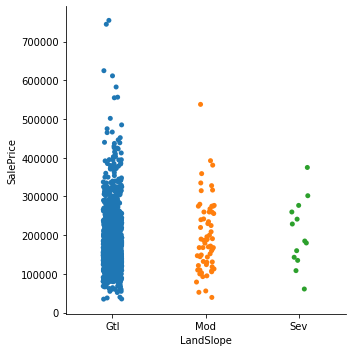

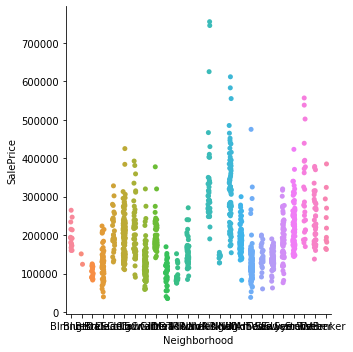

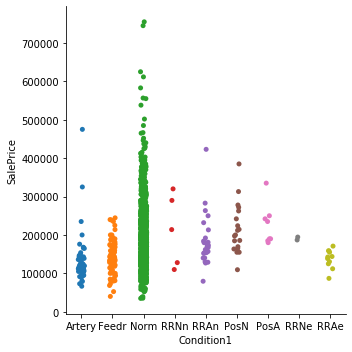

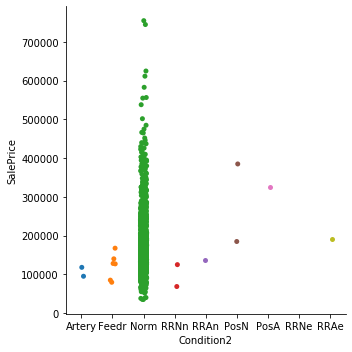

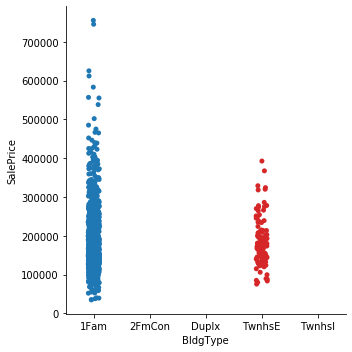

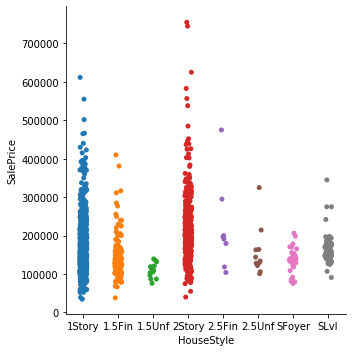

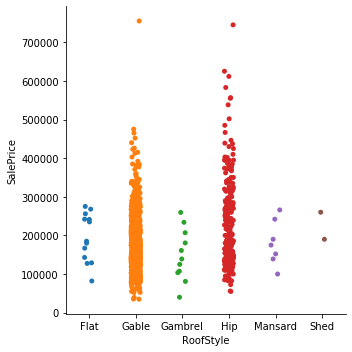

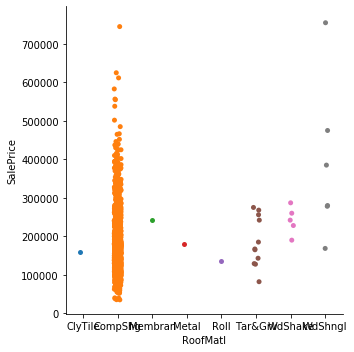

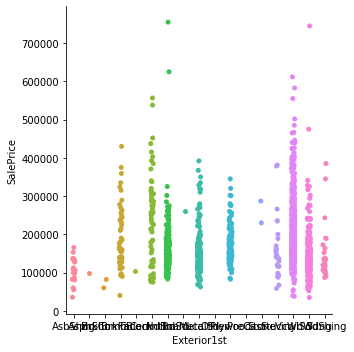

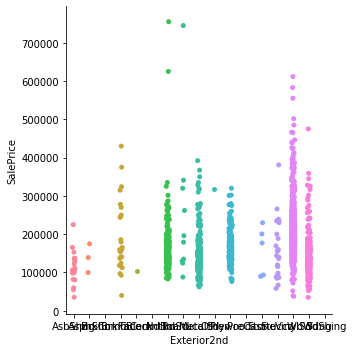

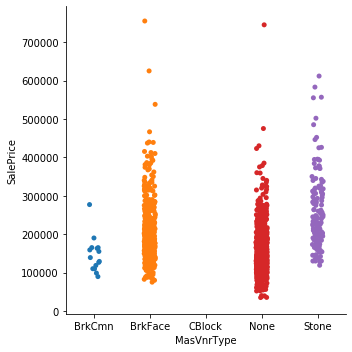

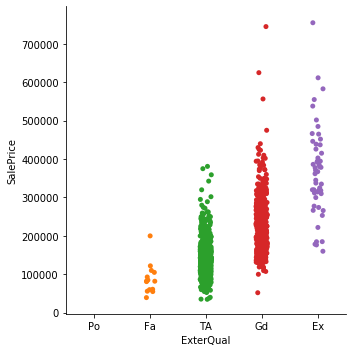

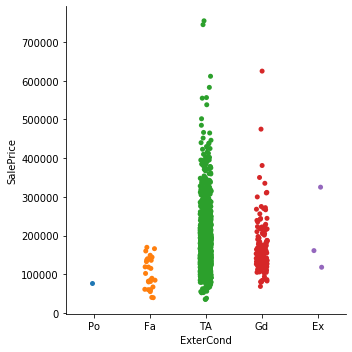

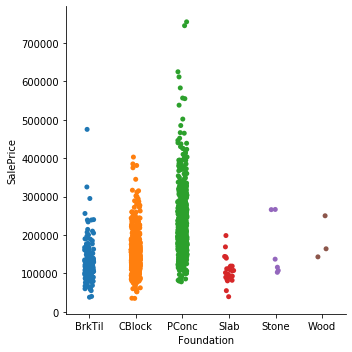

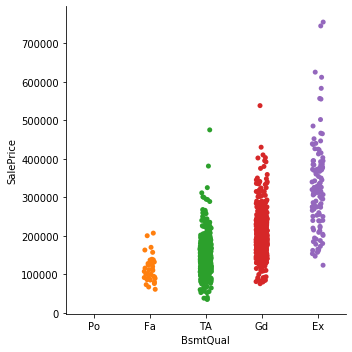

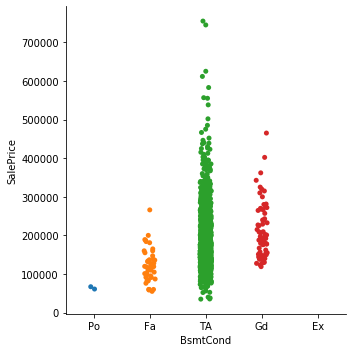

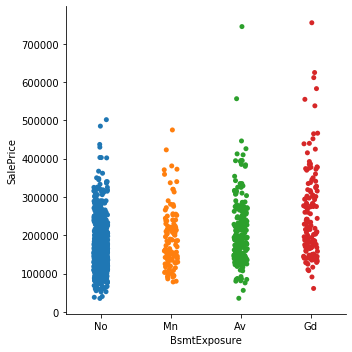

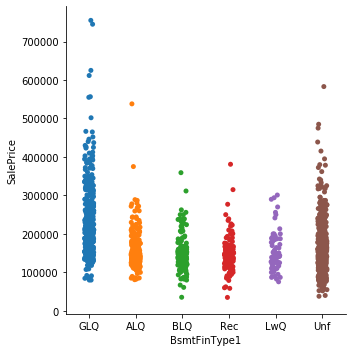

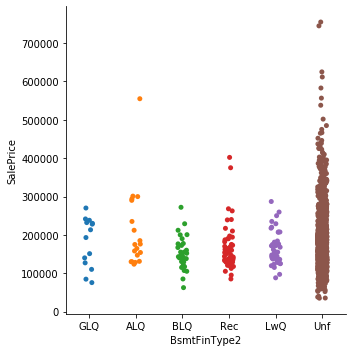

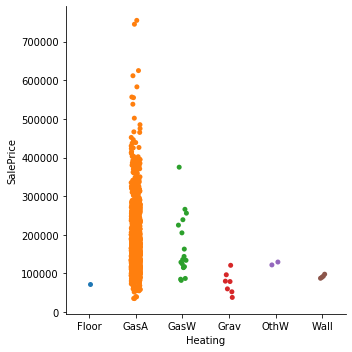

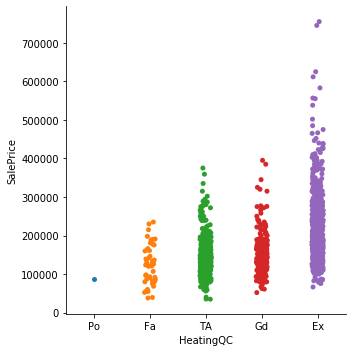

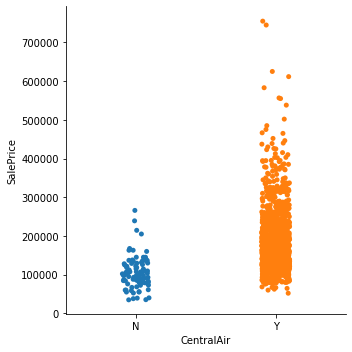

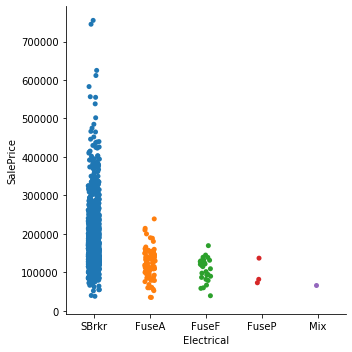

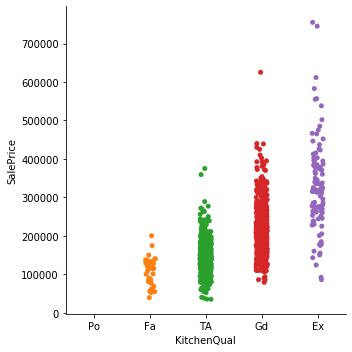

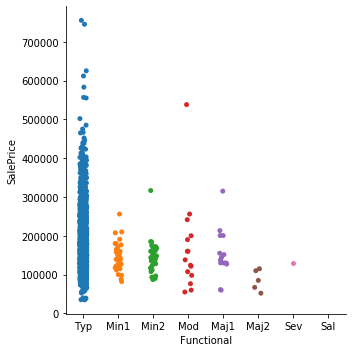

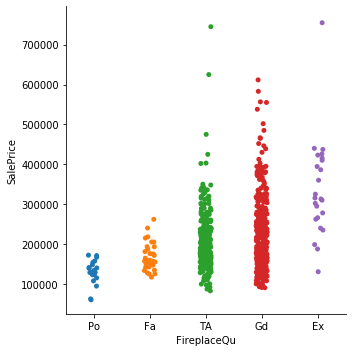

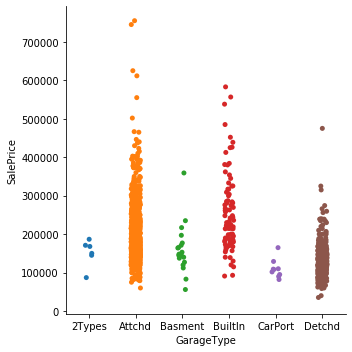

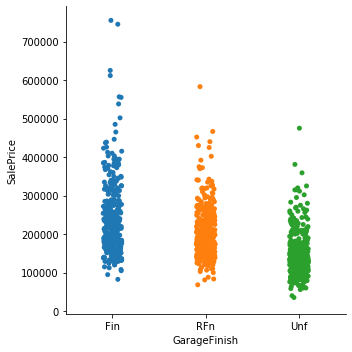

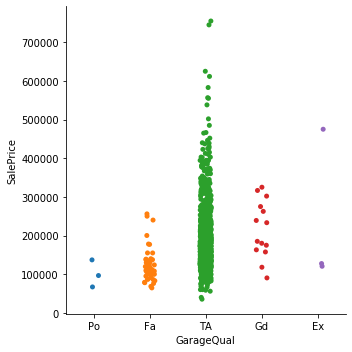

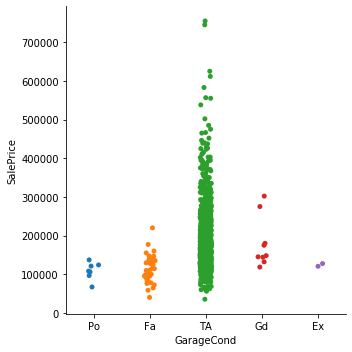

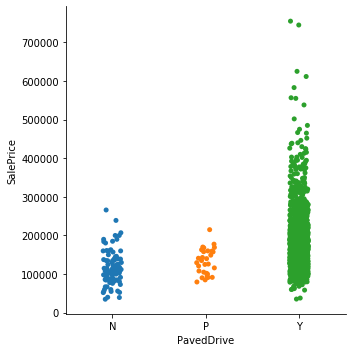

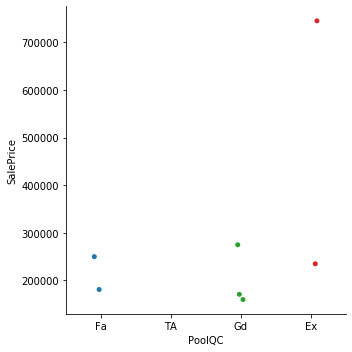

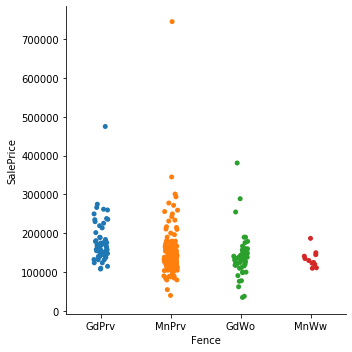

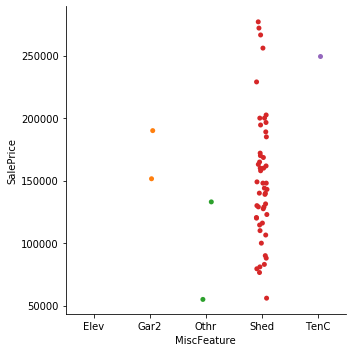

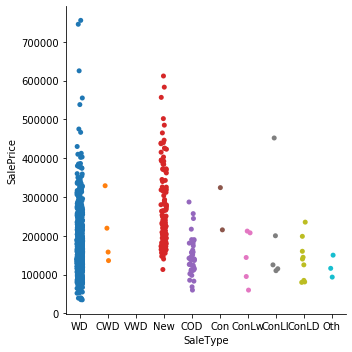

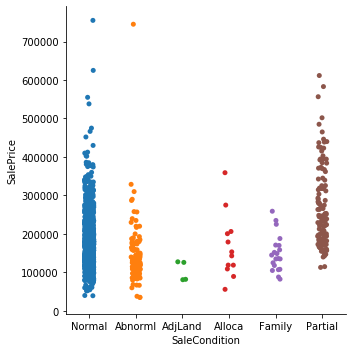

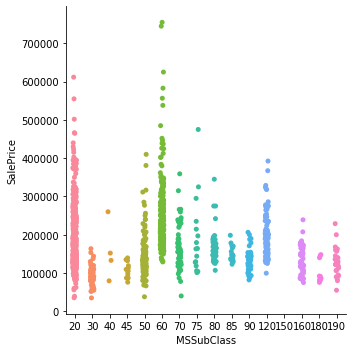

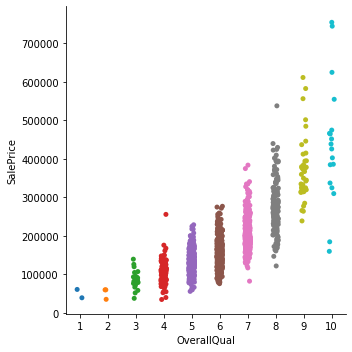

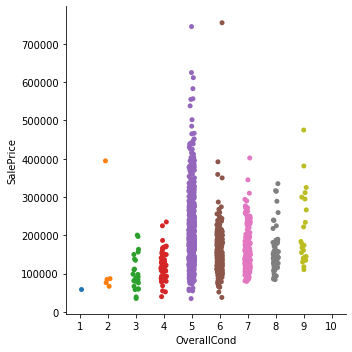

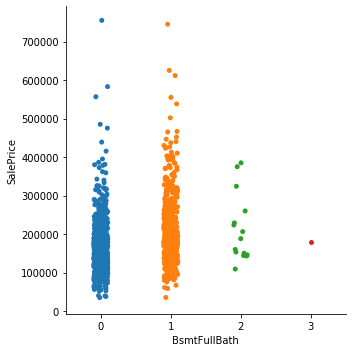

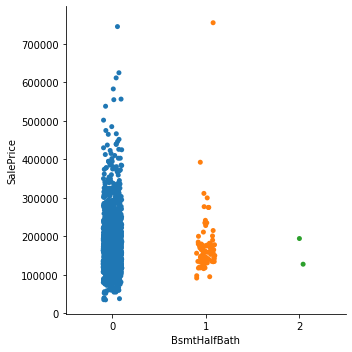

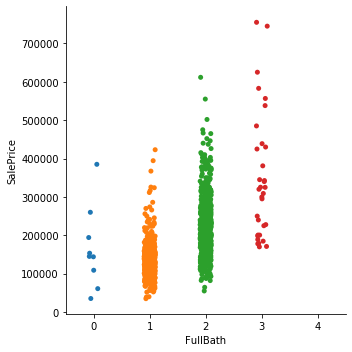

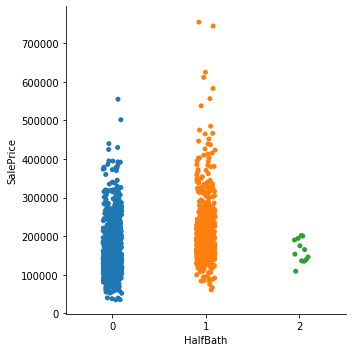

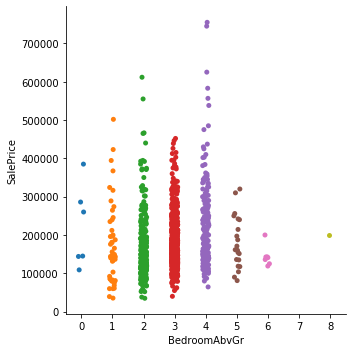

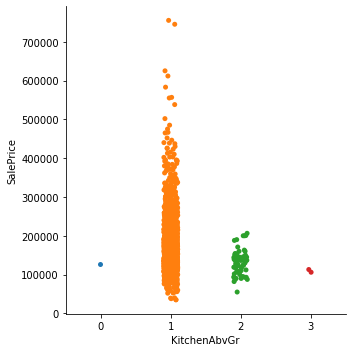

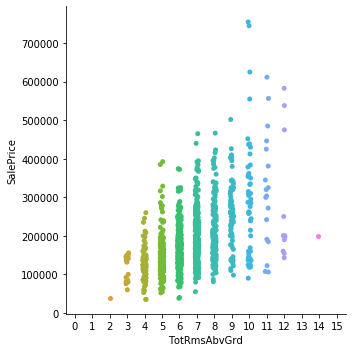

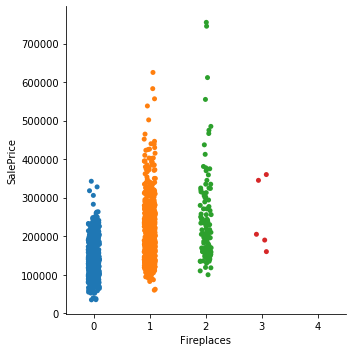

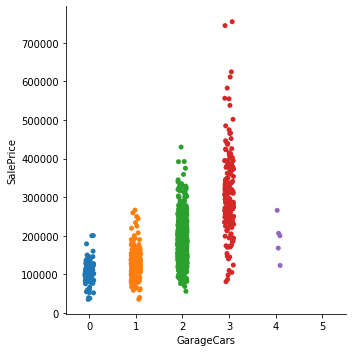

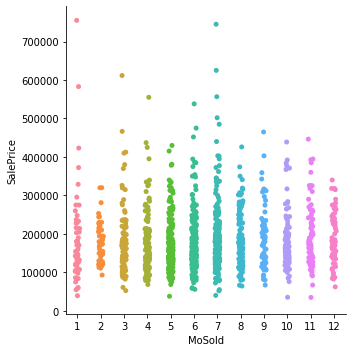

In [42]:
for col in cat_cols:
    sns.catplot(data =train_data, x=col, y ='SalePrice', hue=col)
    plt.show()

Potential Grouping :

MSZoning --> RL , FV correspond to higher prices


### boxplot

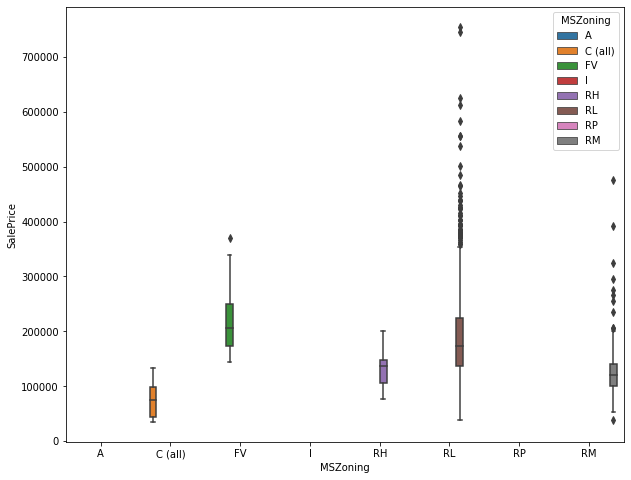

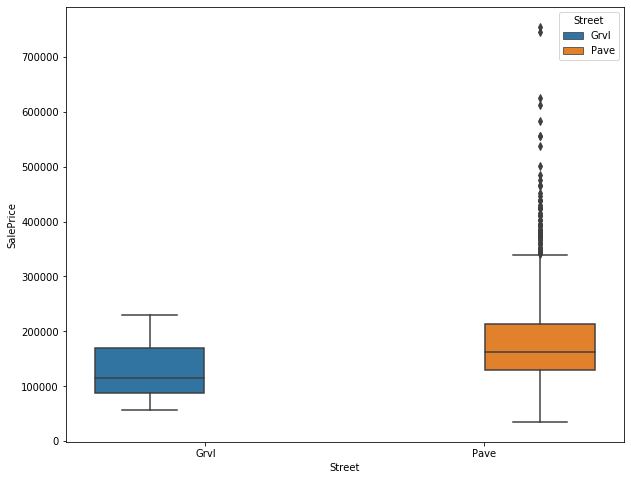

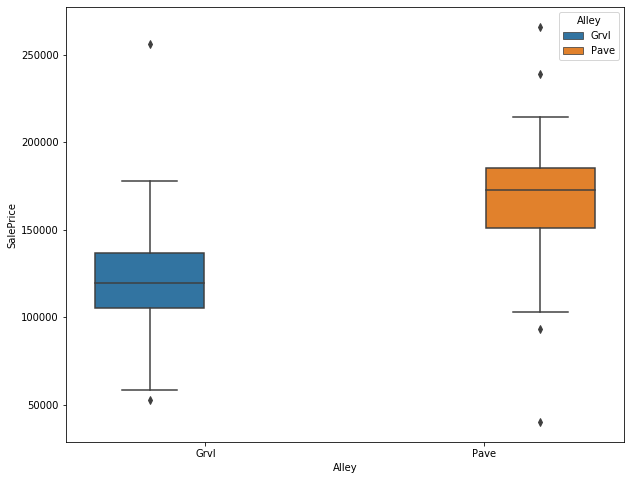

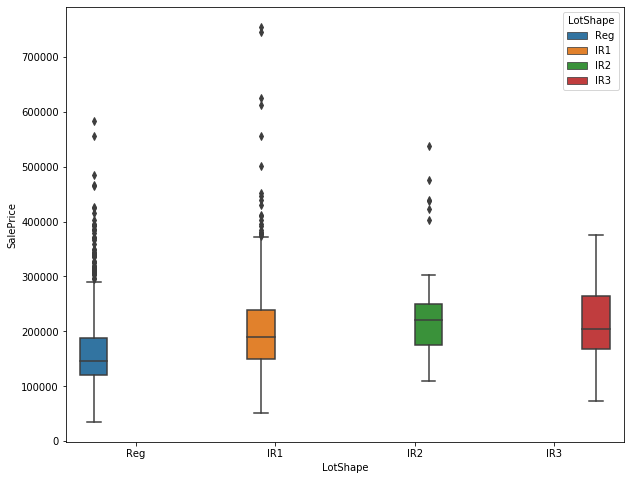

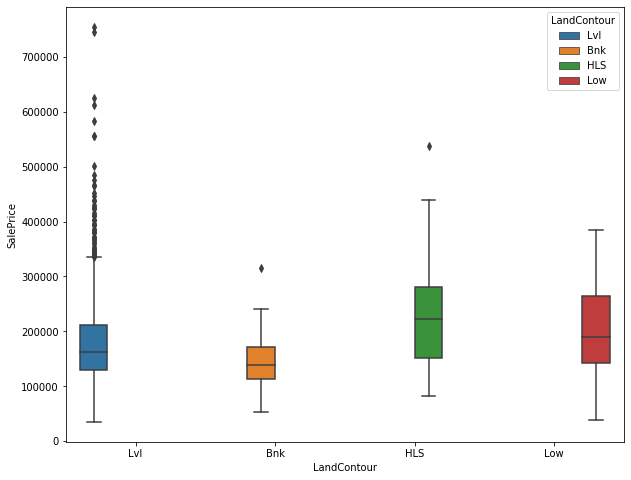

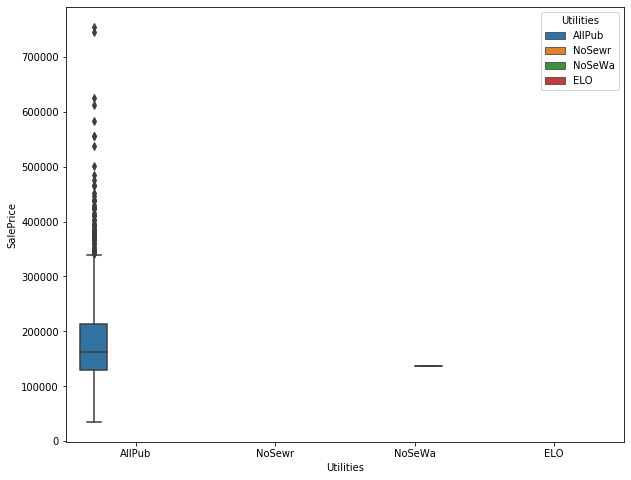

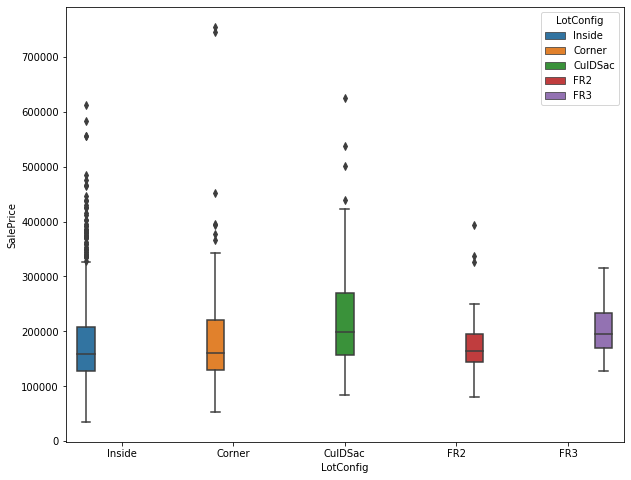

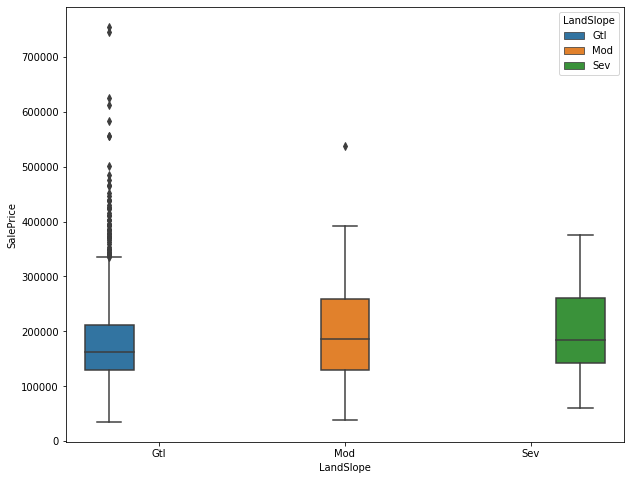

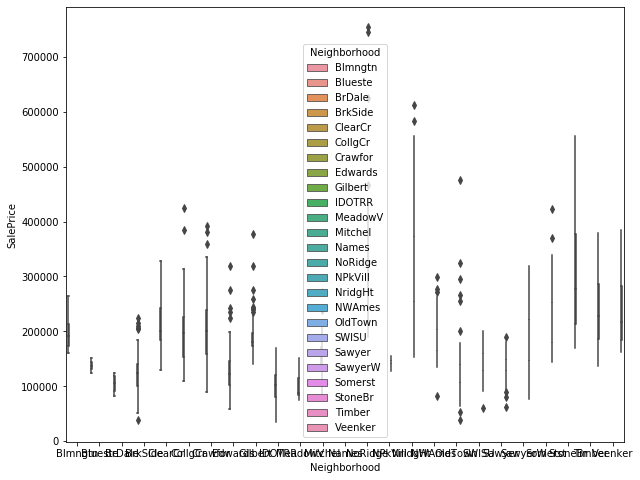

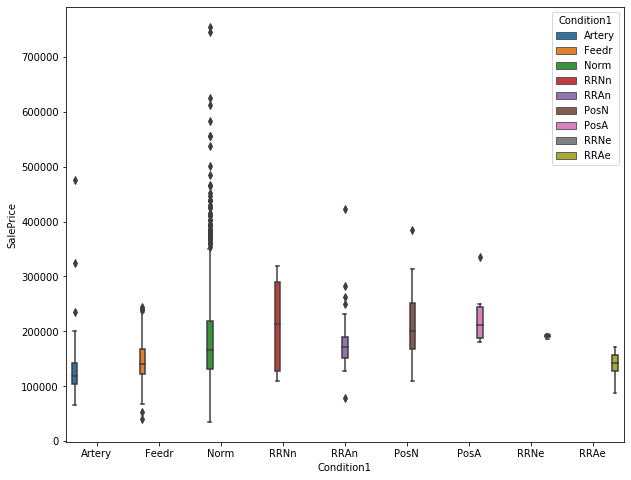

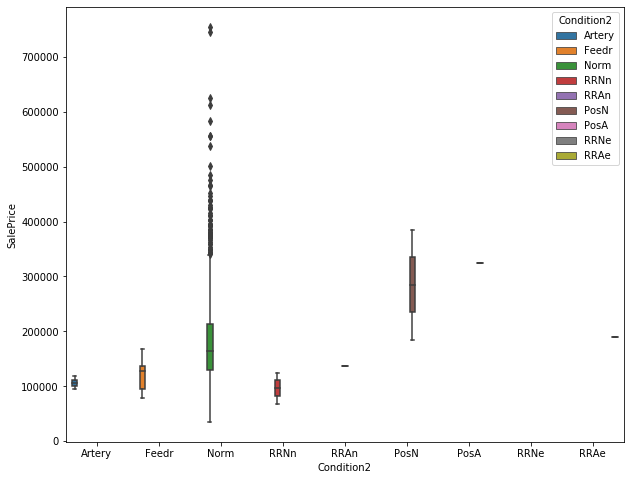

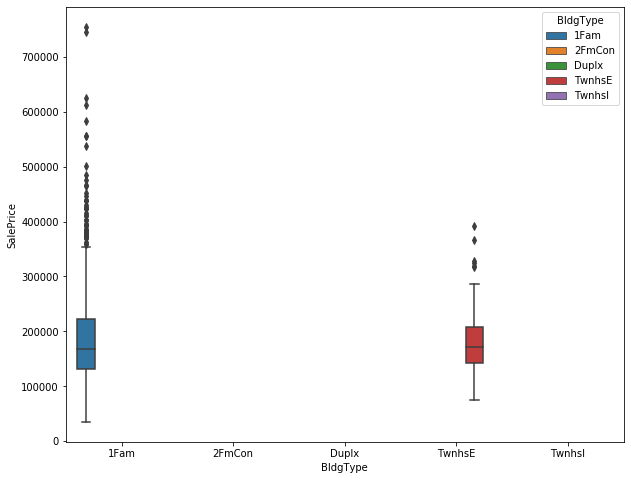

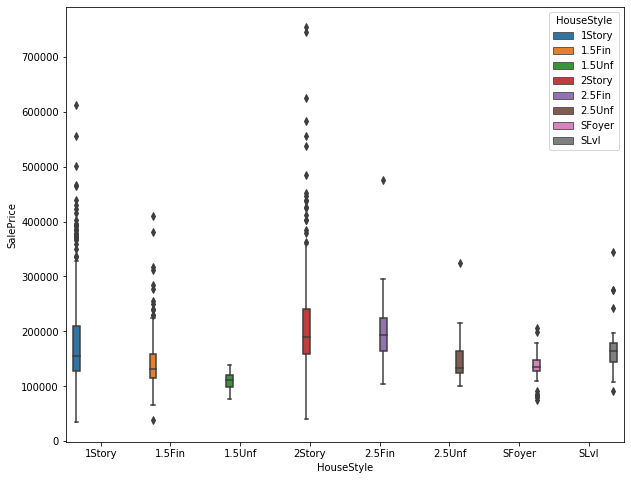

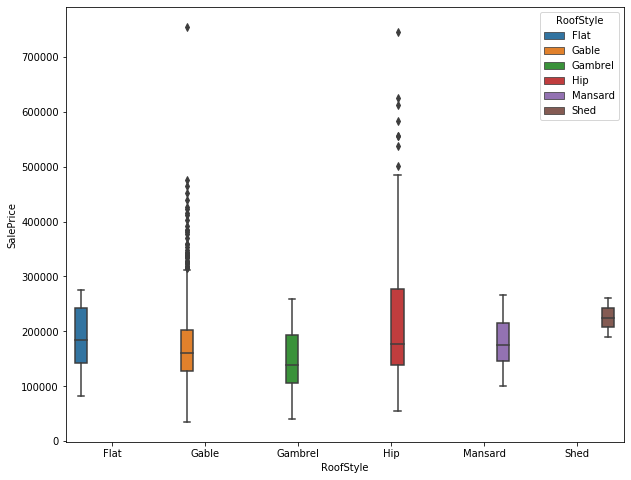

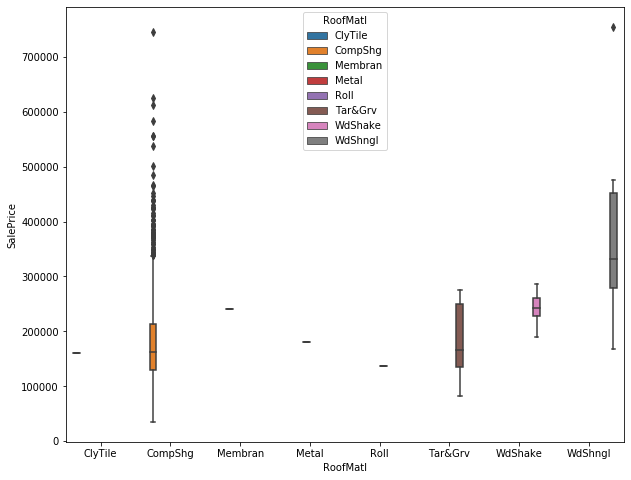

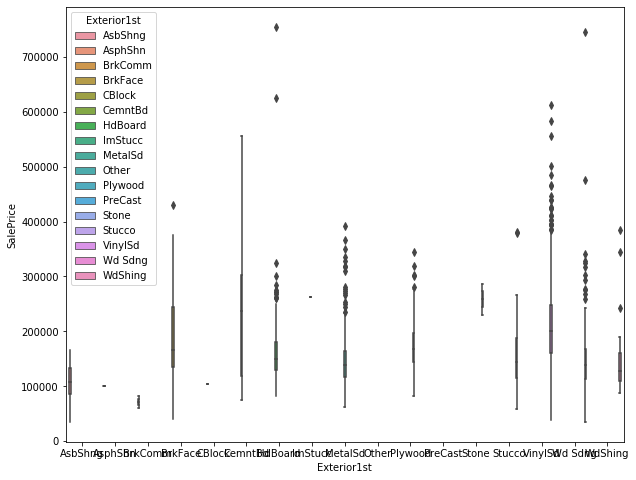

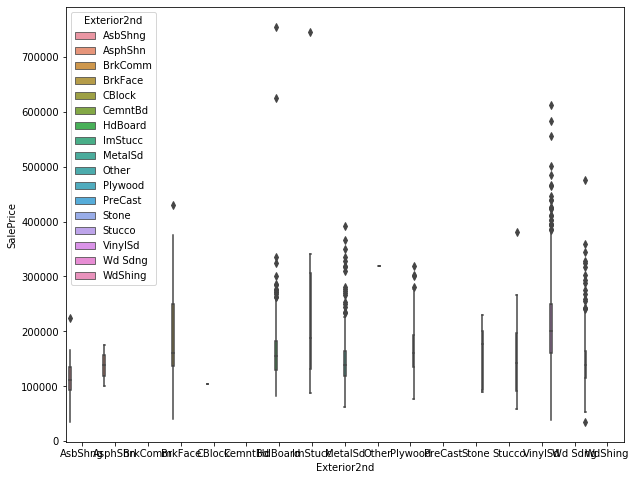

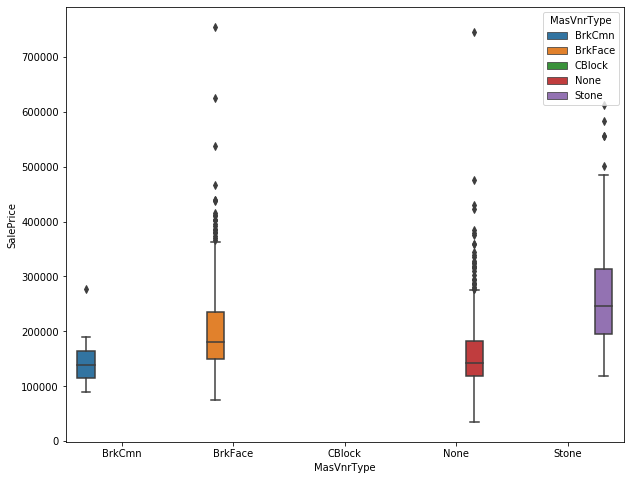

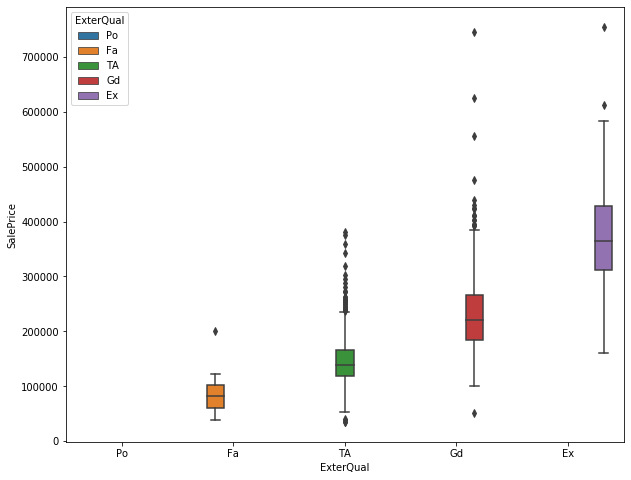

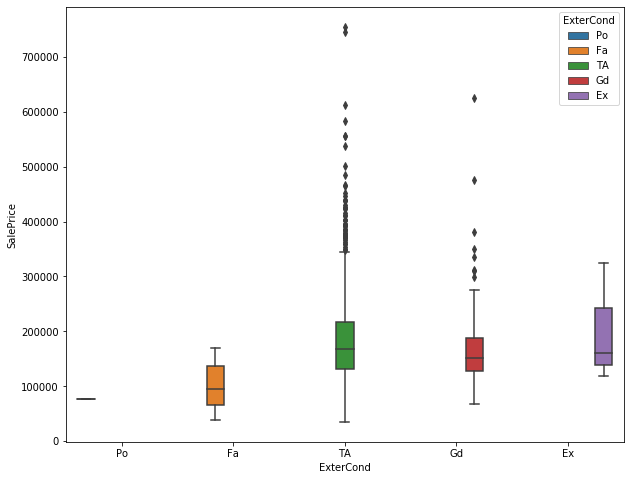

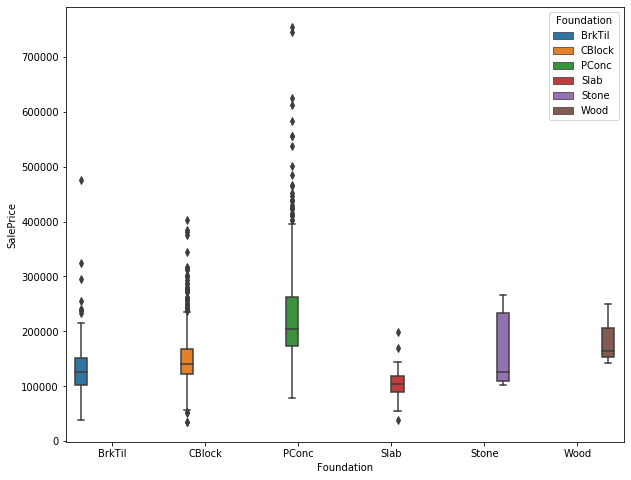

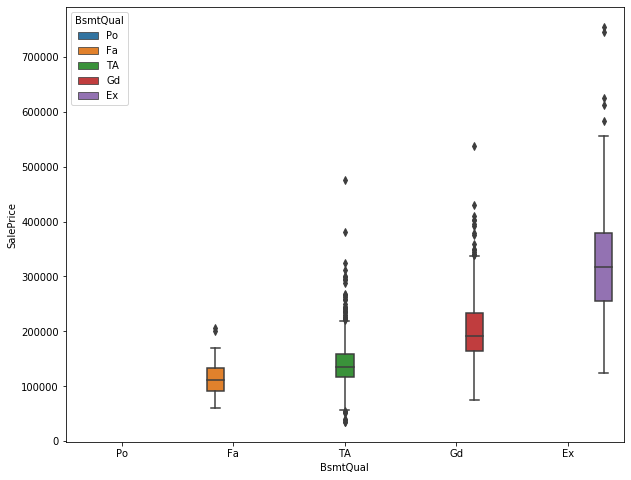

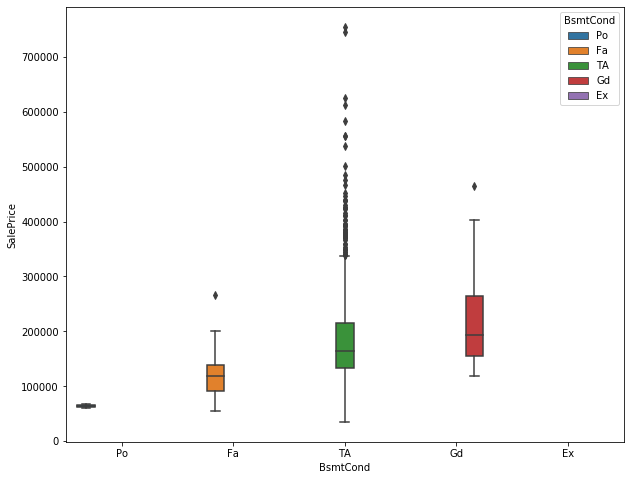

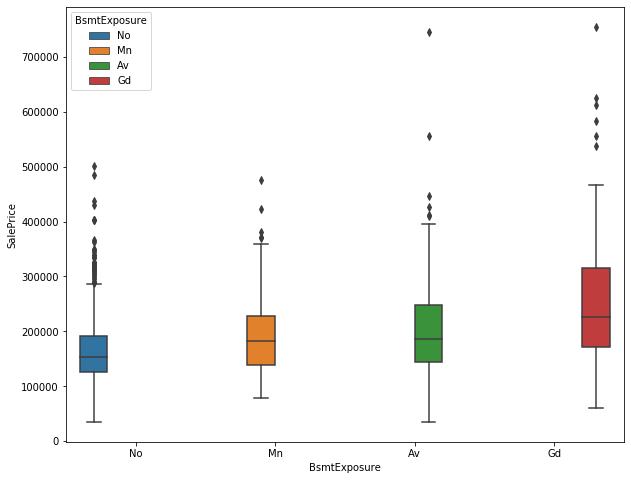

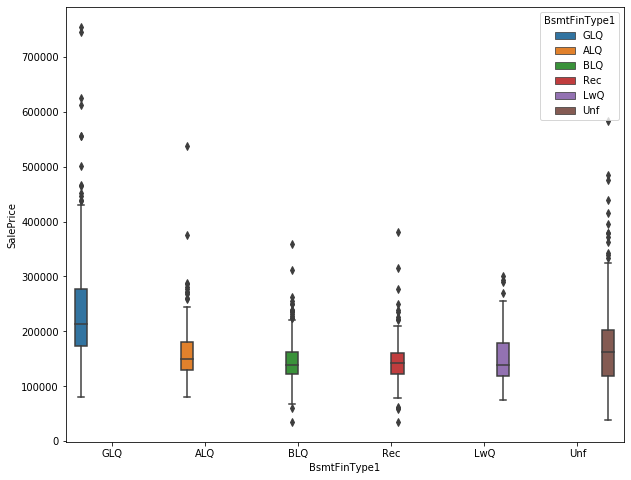

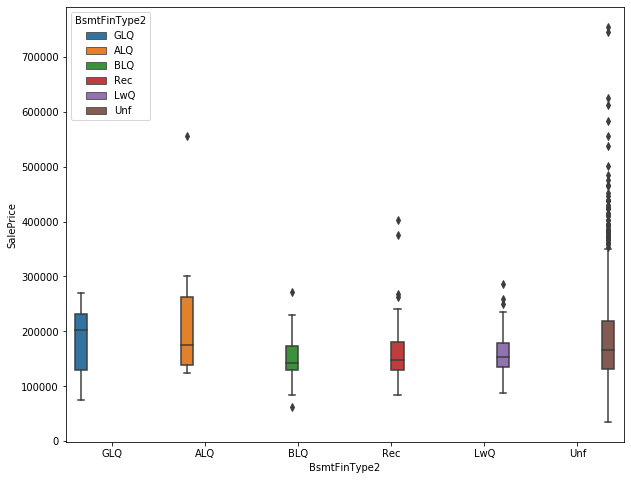

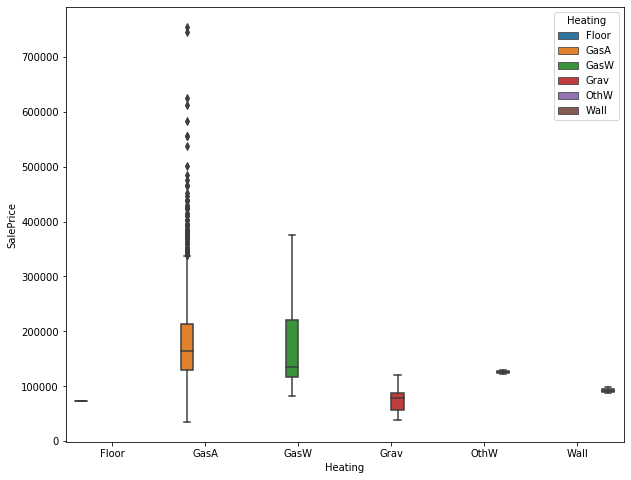

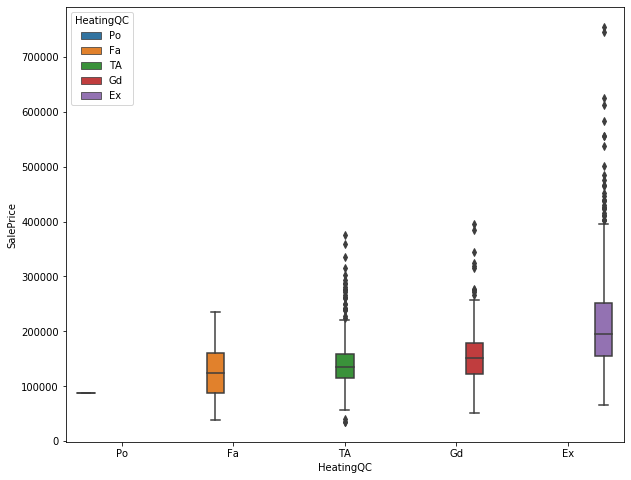

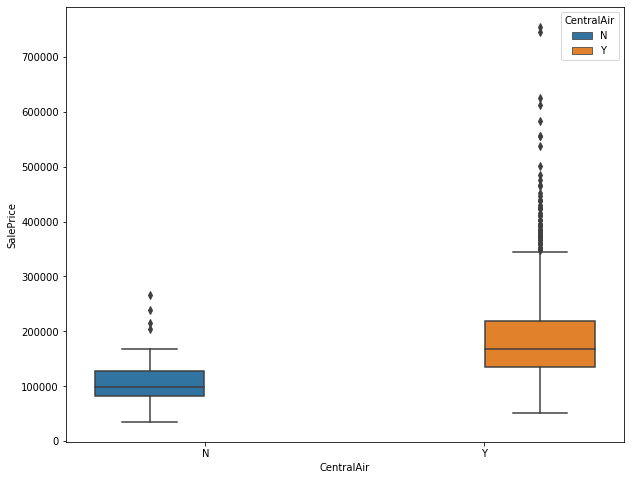

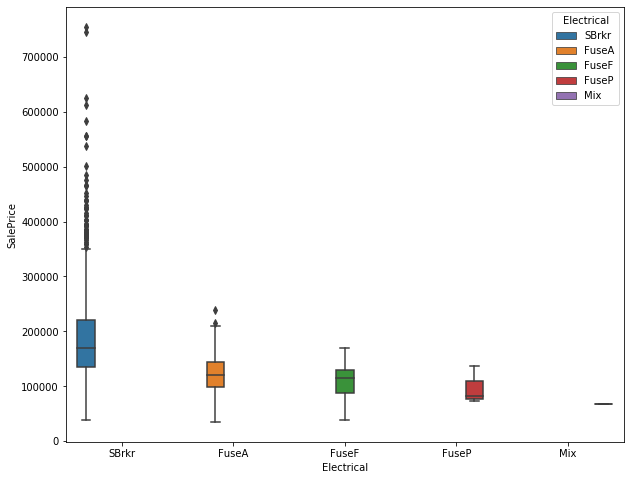

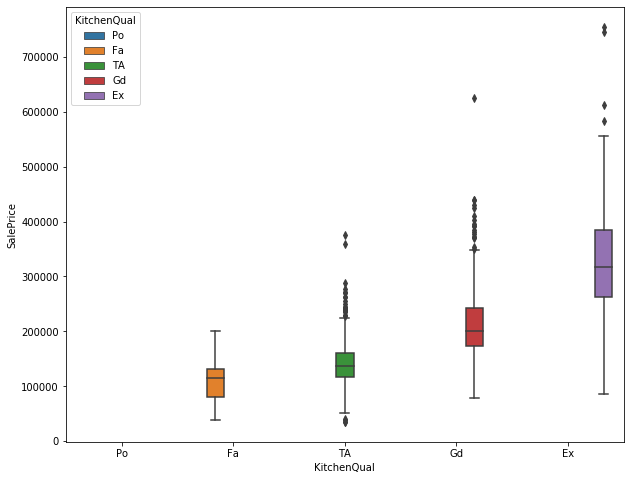

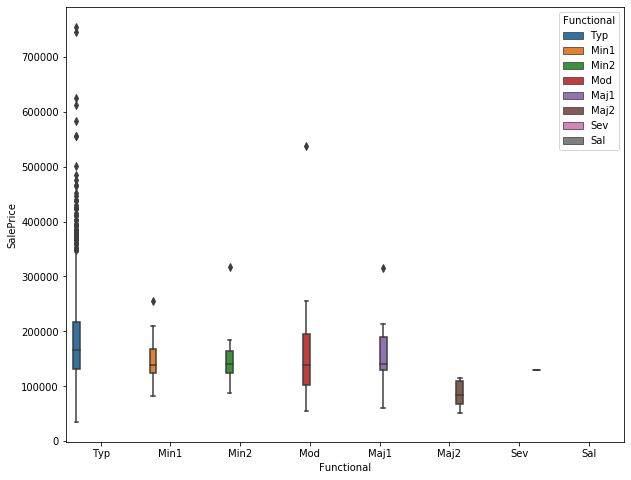

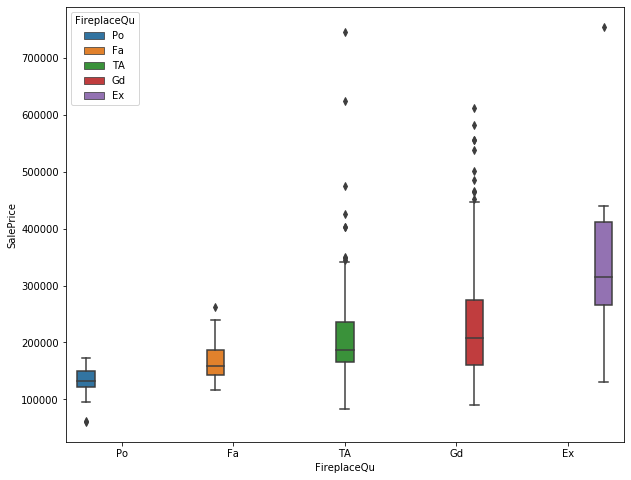

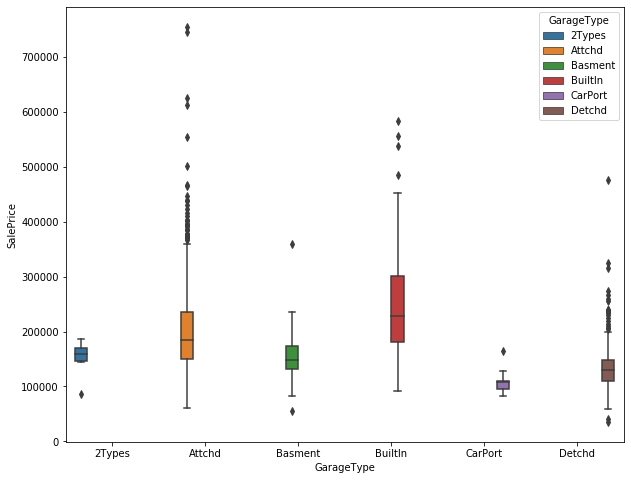

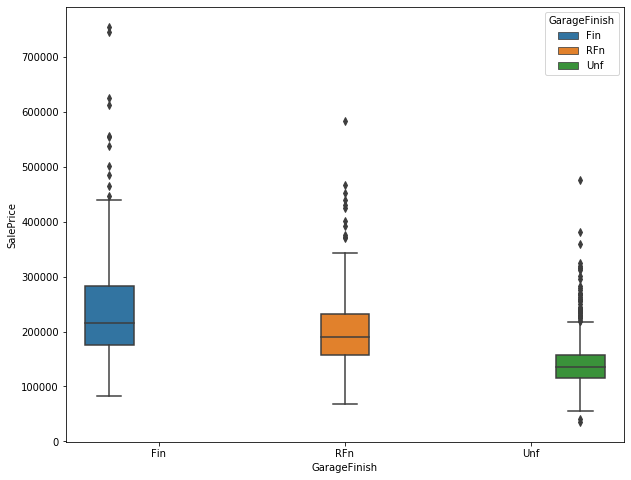

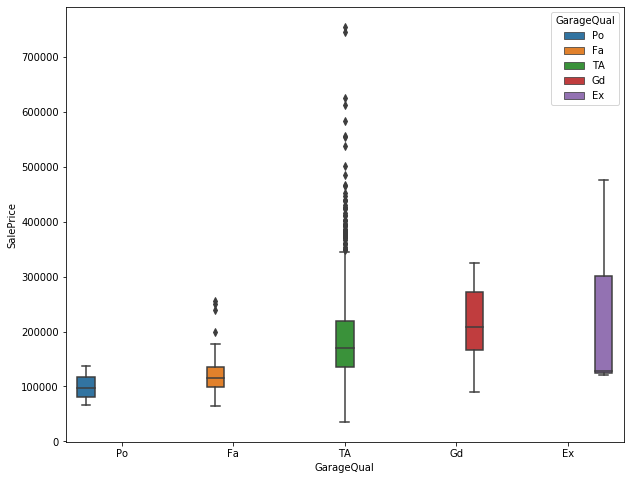

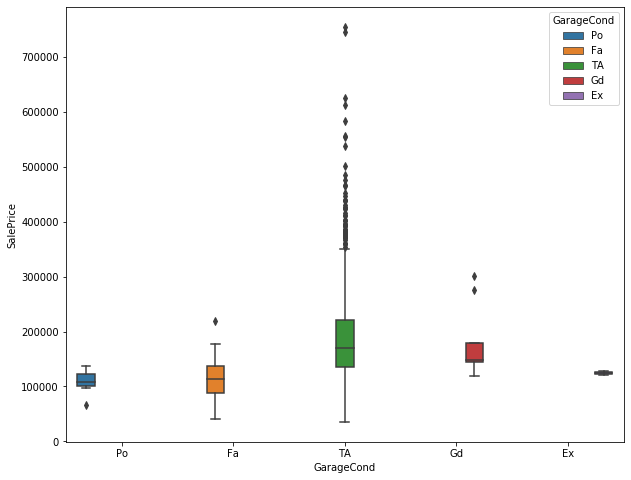

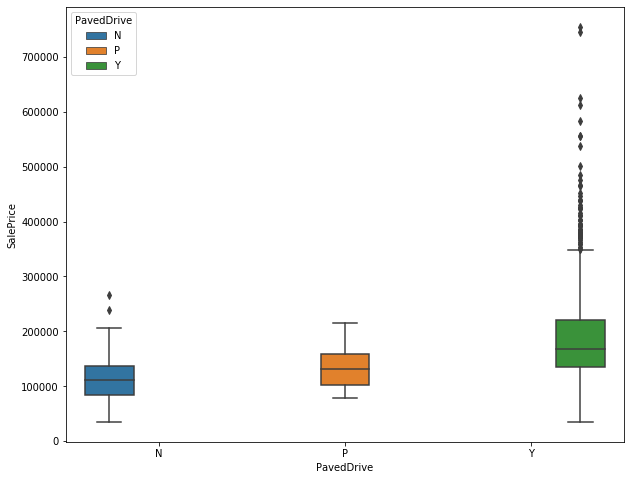

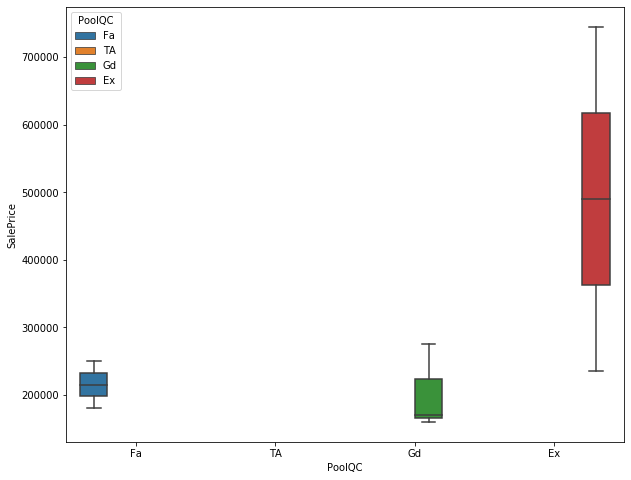

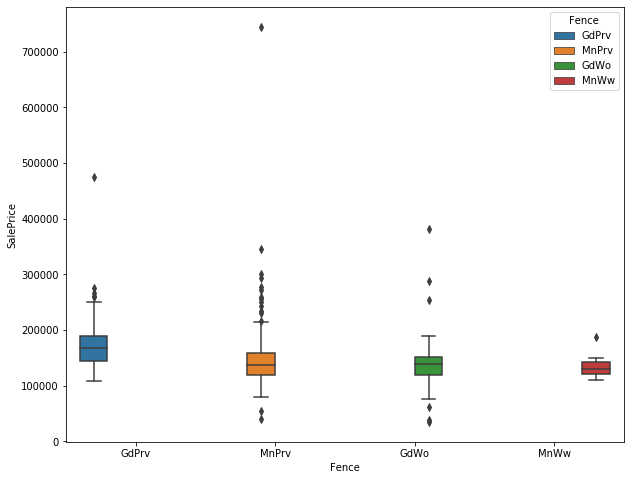

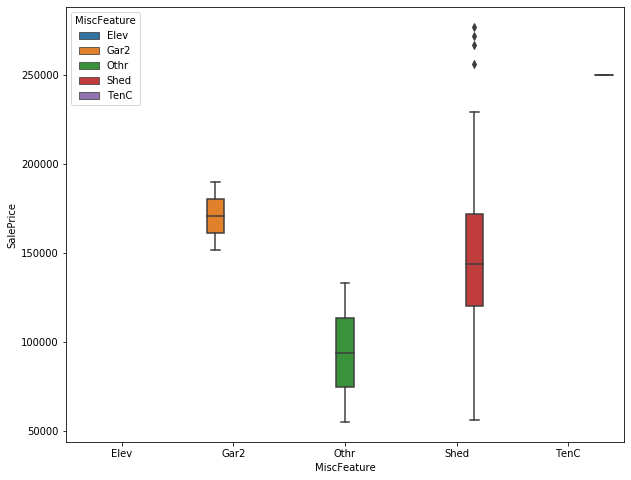

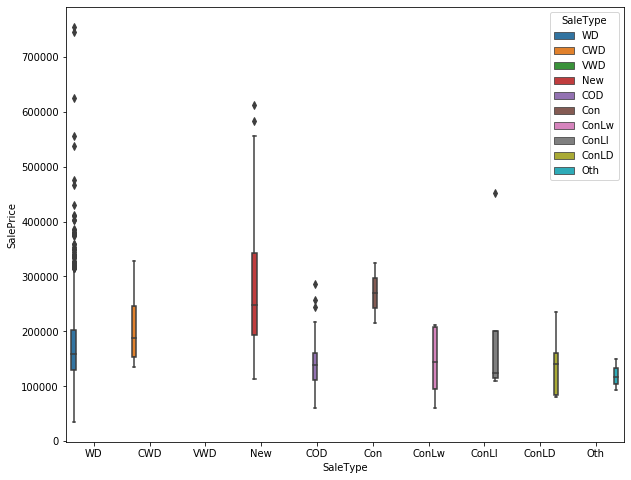

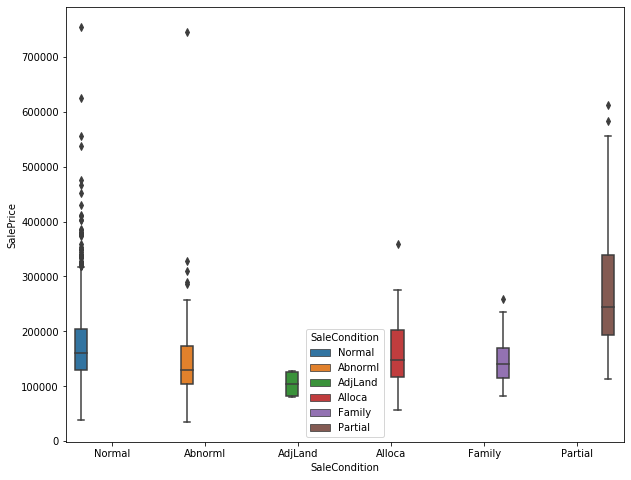

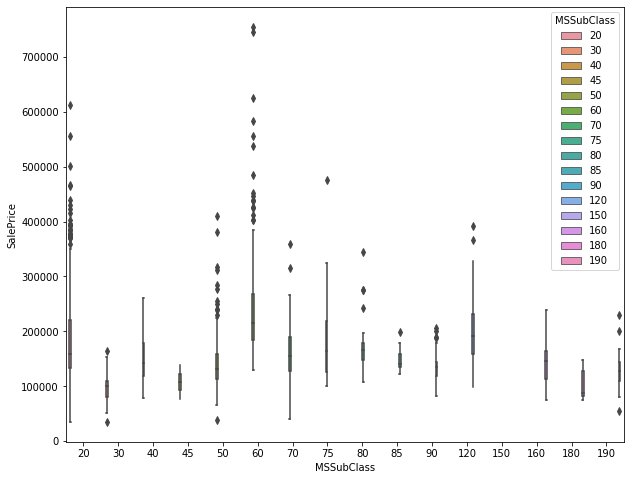

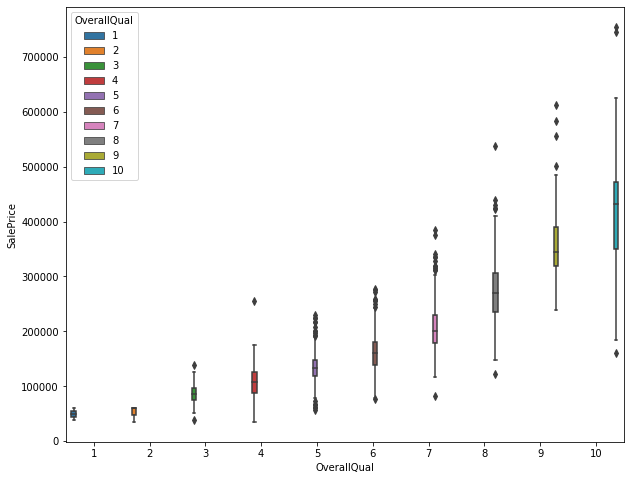

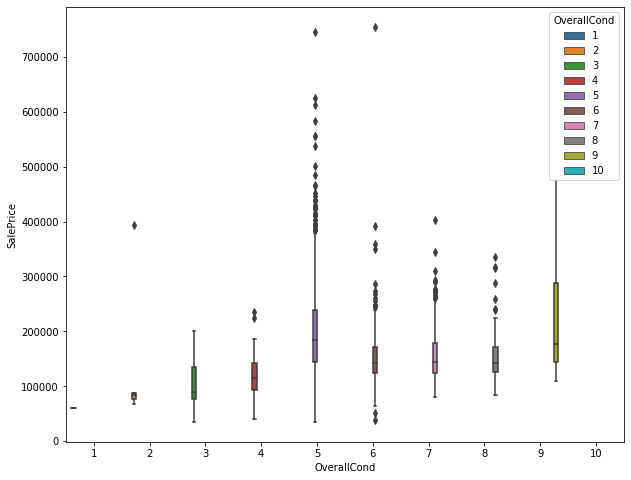

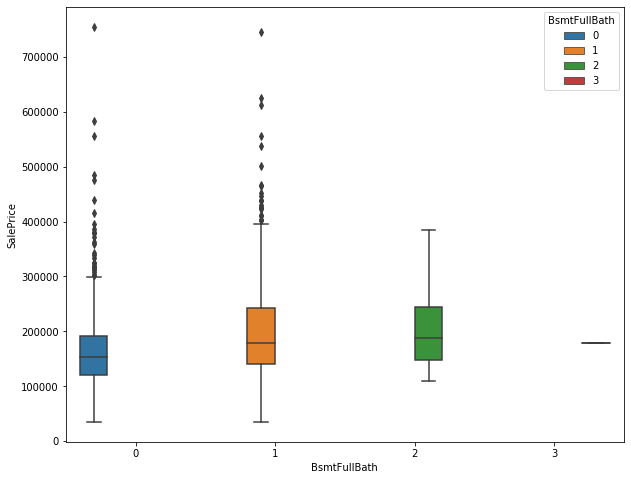

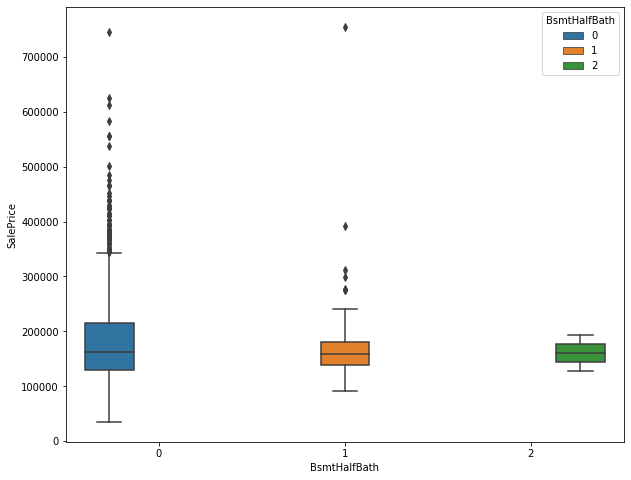

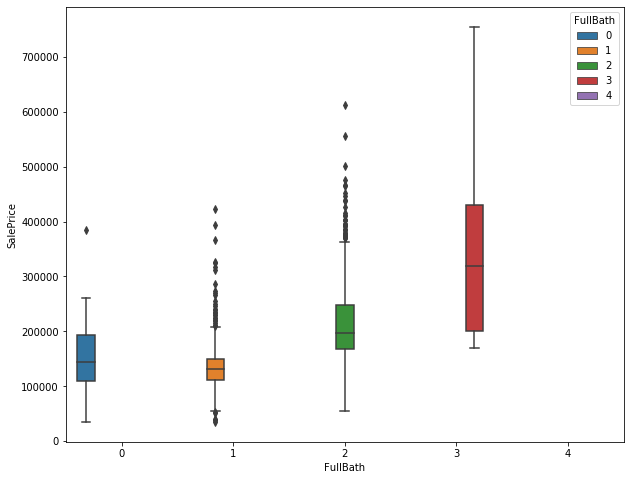

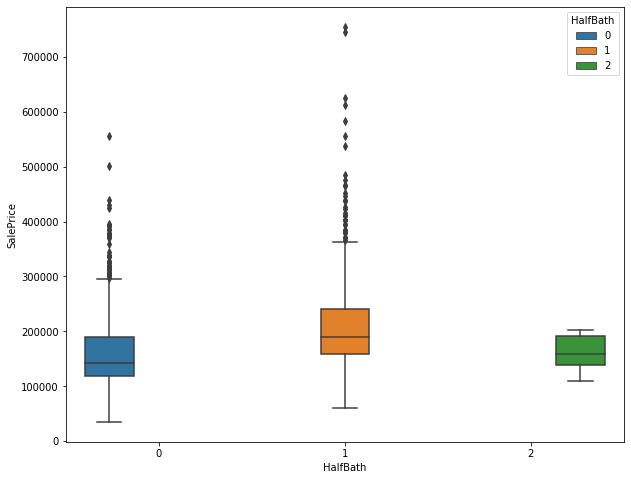

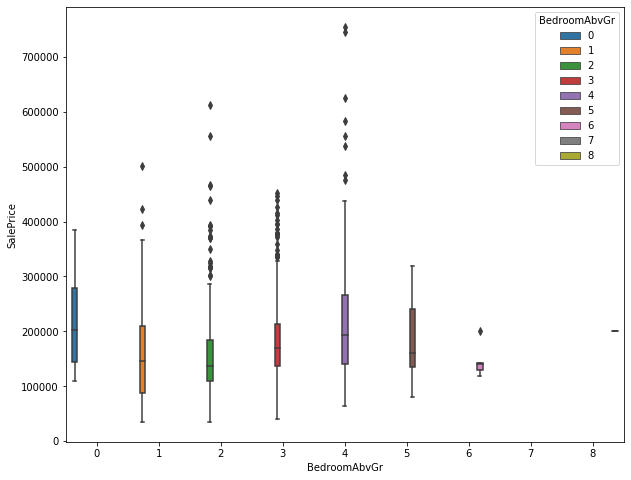

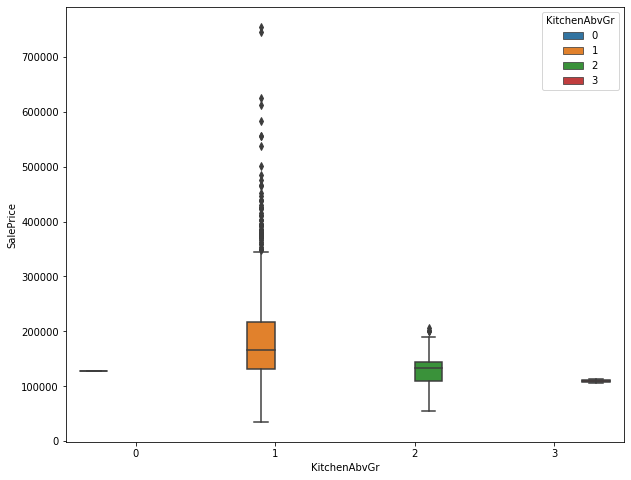

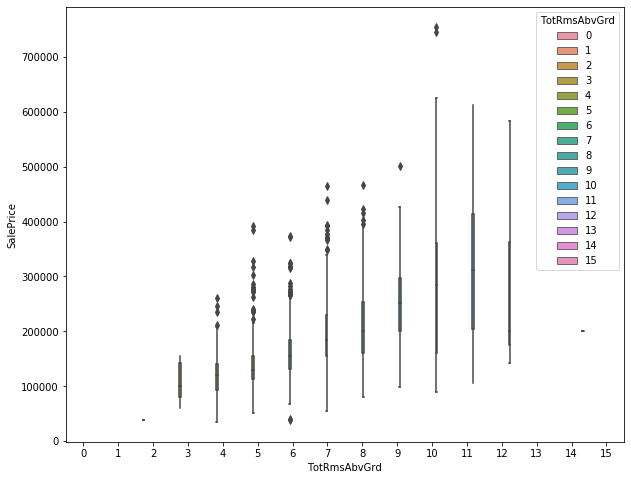

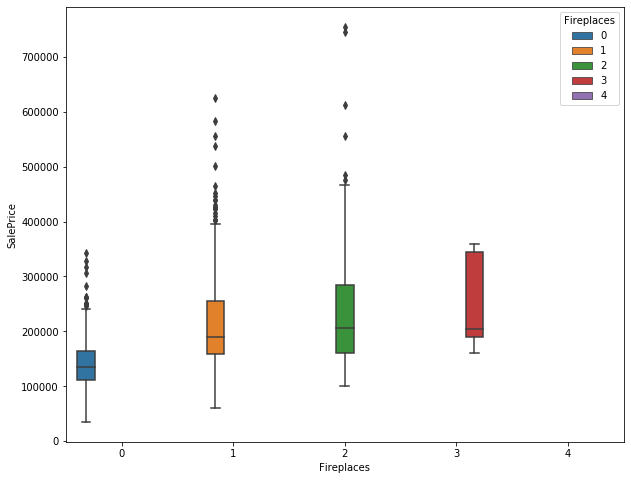

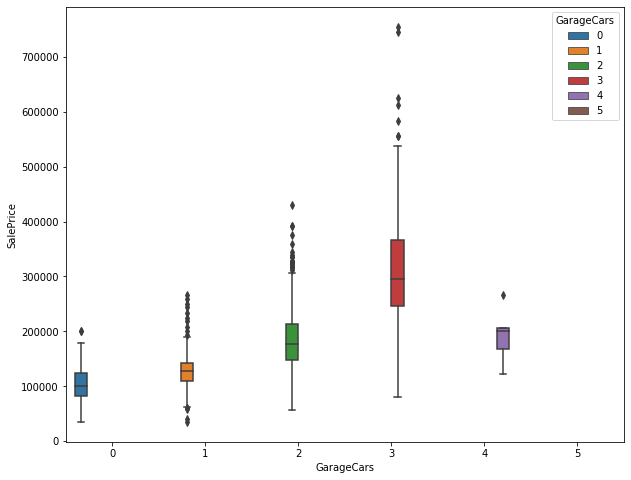

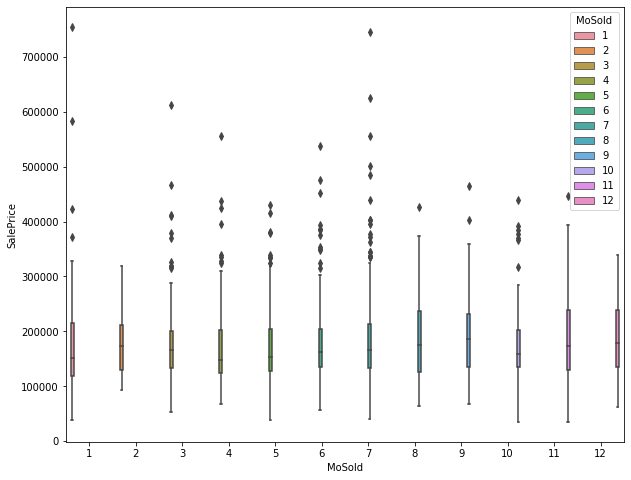

In [43]:
for col in cat_cols:
    sns.boxplot(data =train_data, x=col, y ='SalePrice', hue=col)
    plt.show()

- expensive houses have street= pave
- expensive houses have Alley= pave
- expensive houses have MasVnrType = brkface, None, Stone
- expensive houses have ExteriorQuality = Ex, Gd
- expensive houses have ExteriorQuality= TA
- expensive houses have EX condition for other features also
- expensive houses have central Air = Y


### regplot

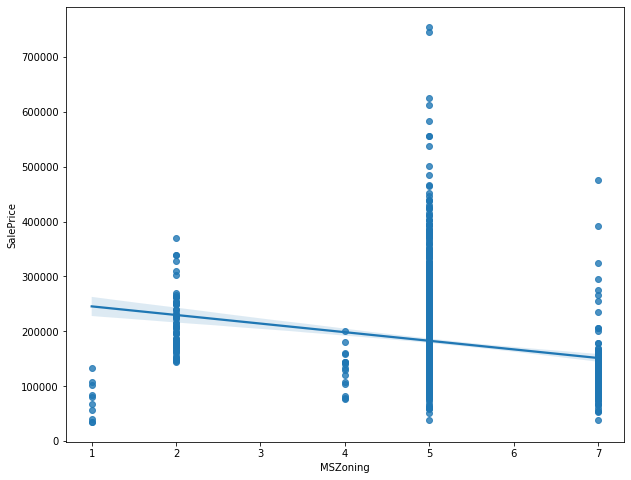

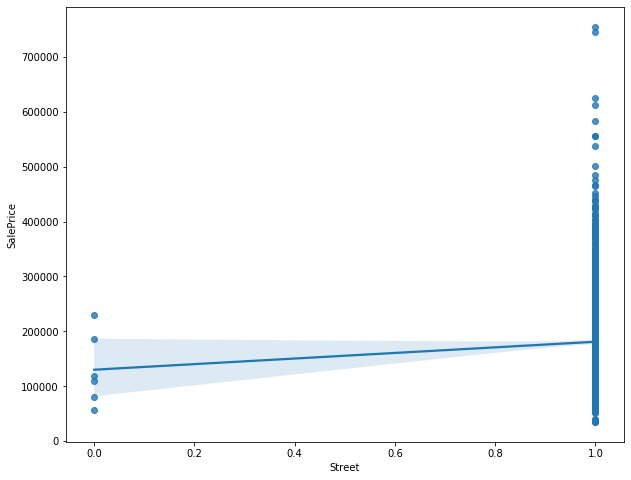

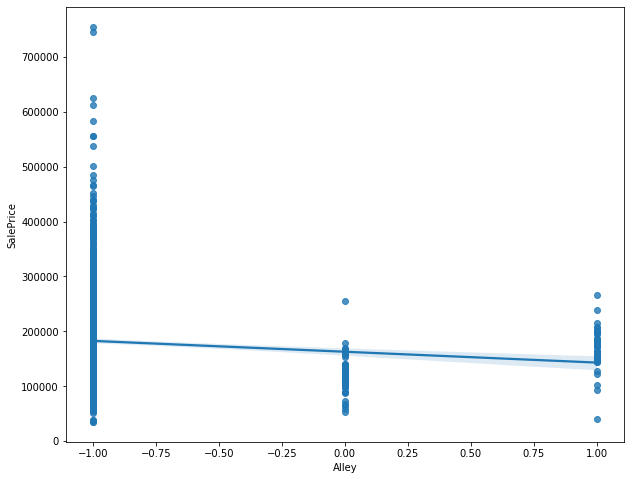

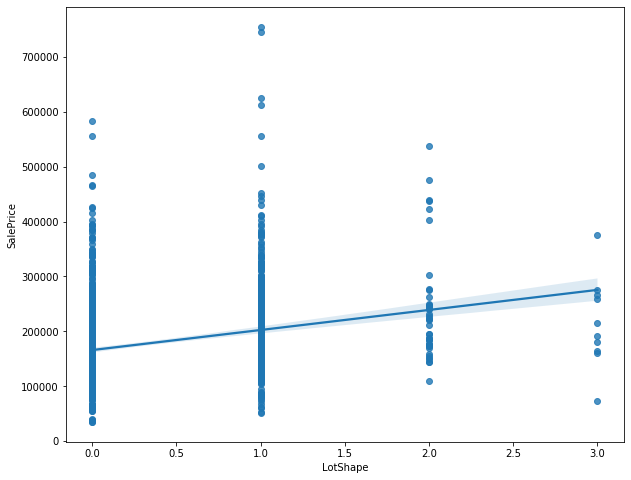

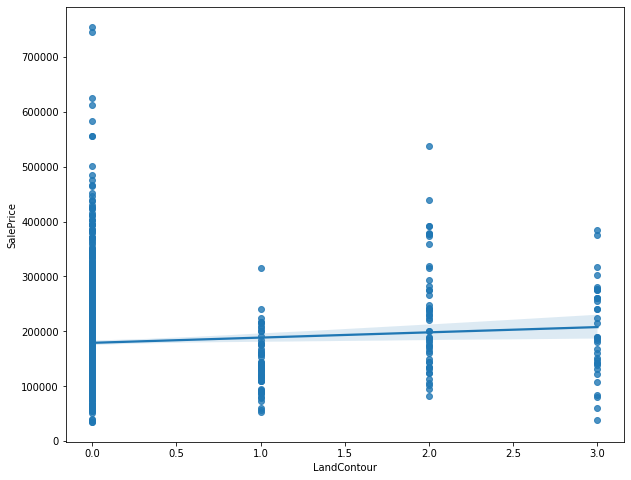

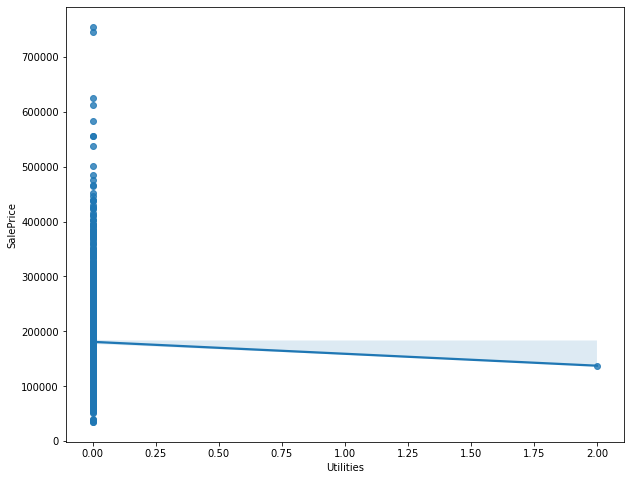

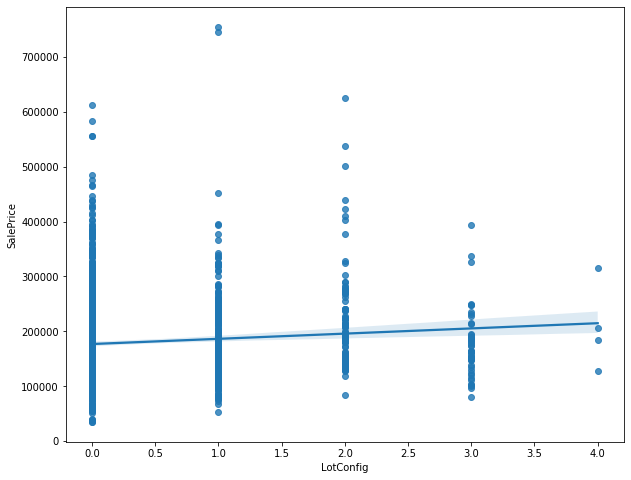

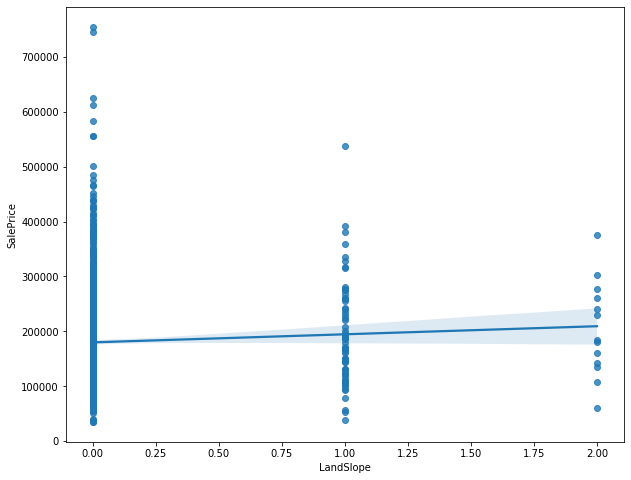

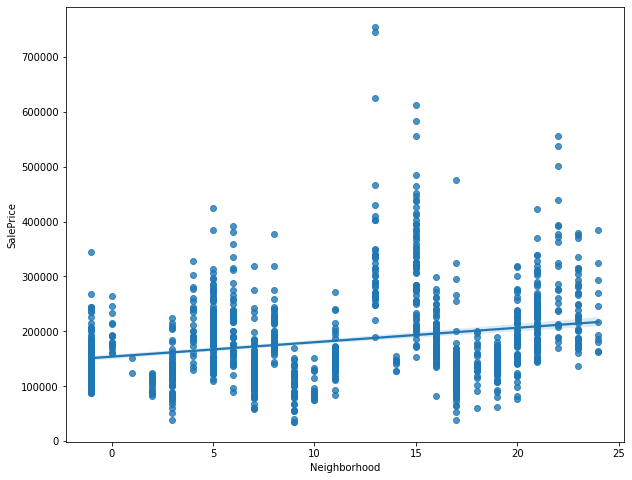

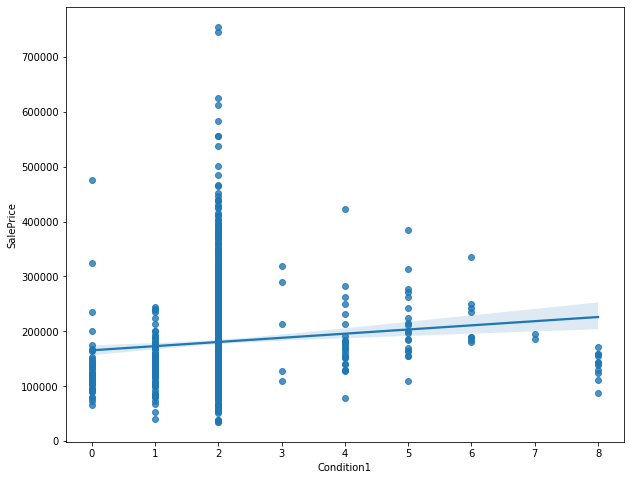

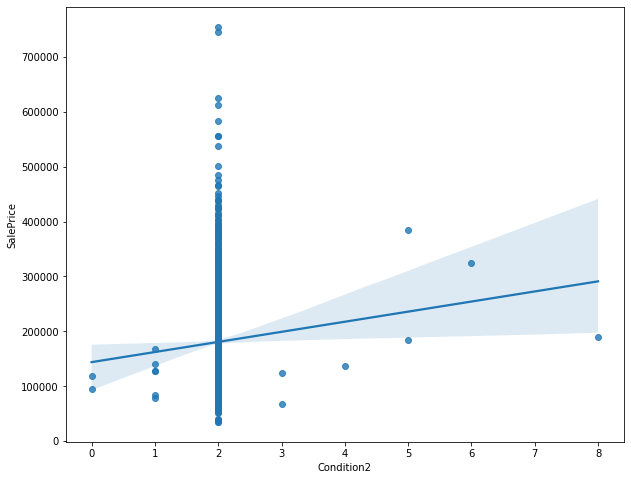

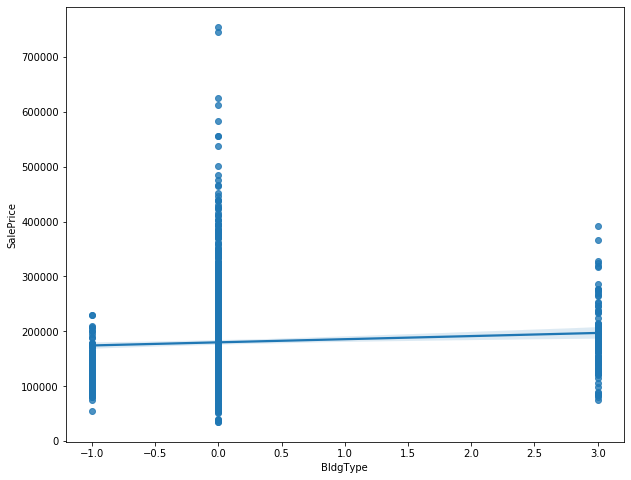

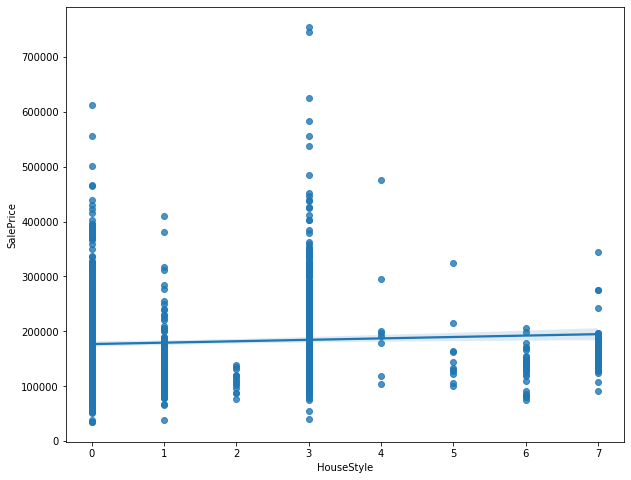

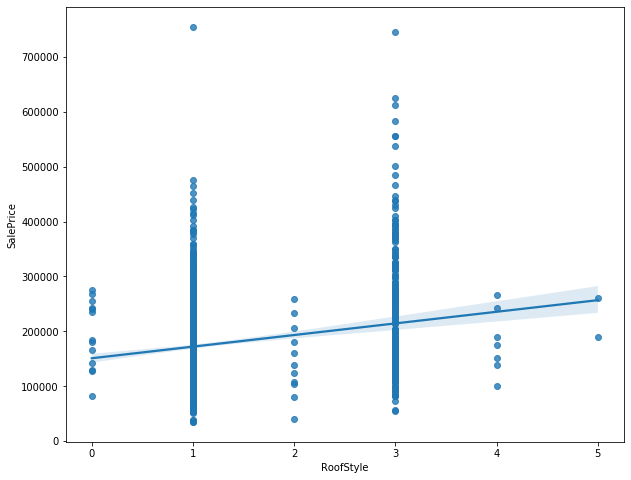

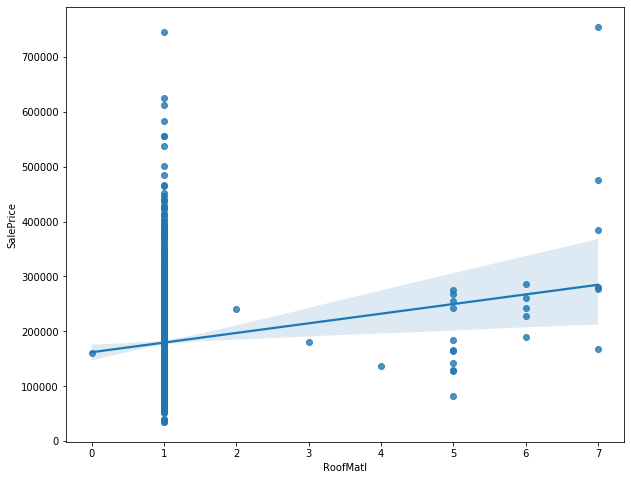

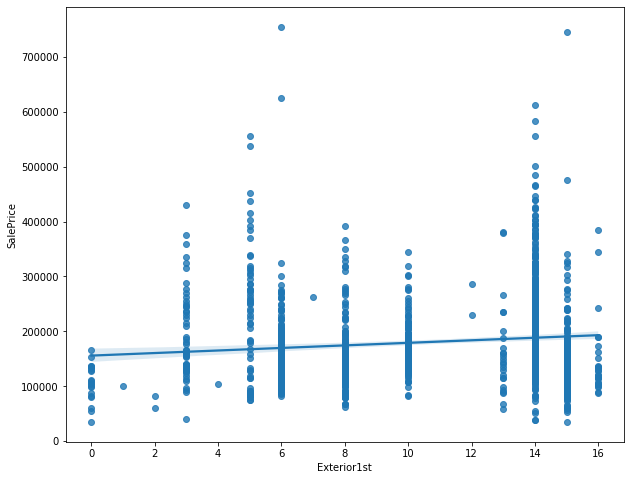

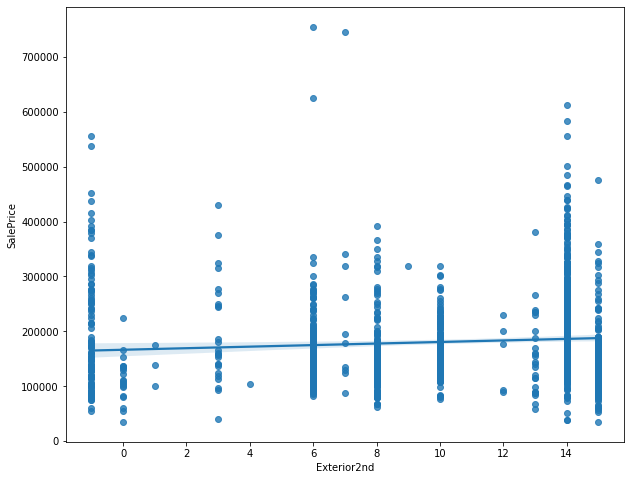

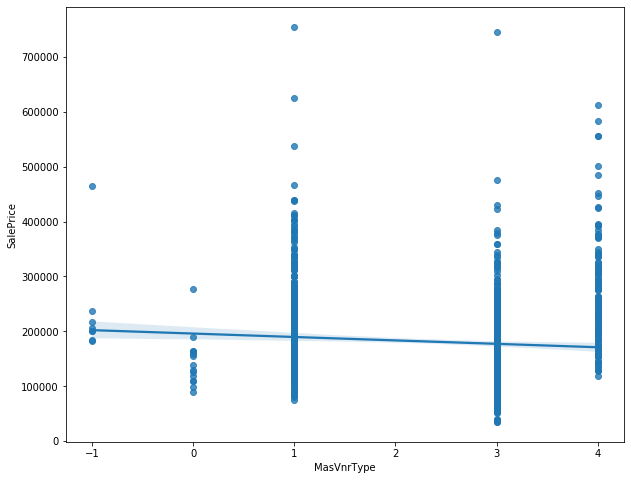

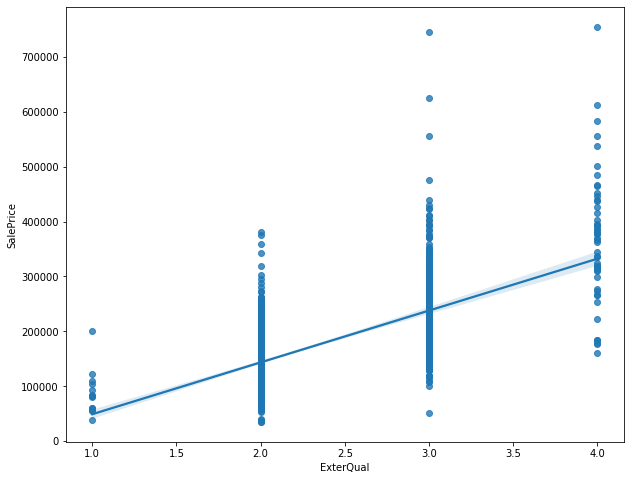

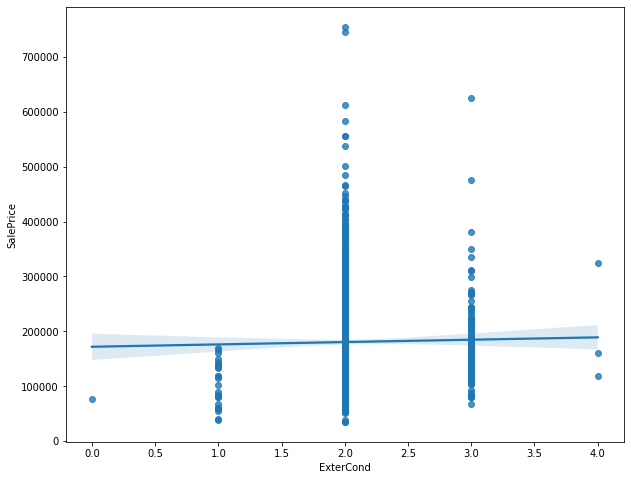

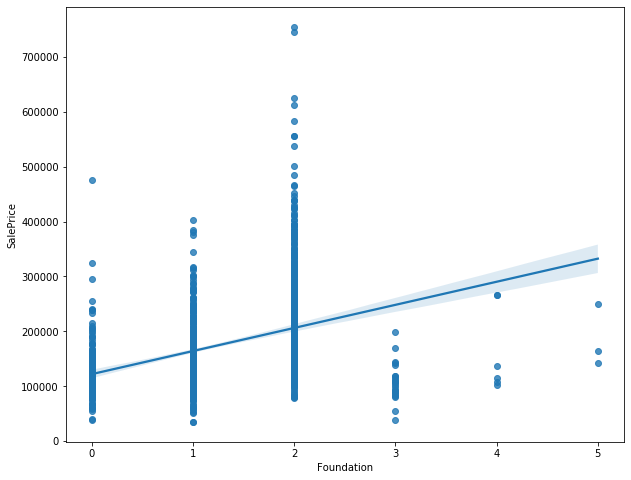

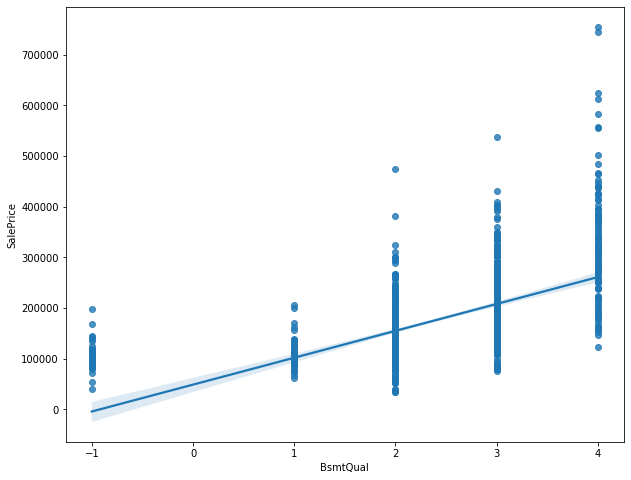

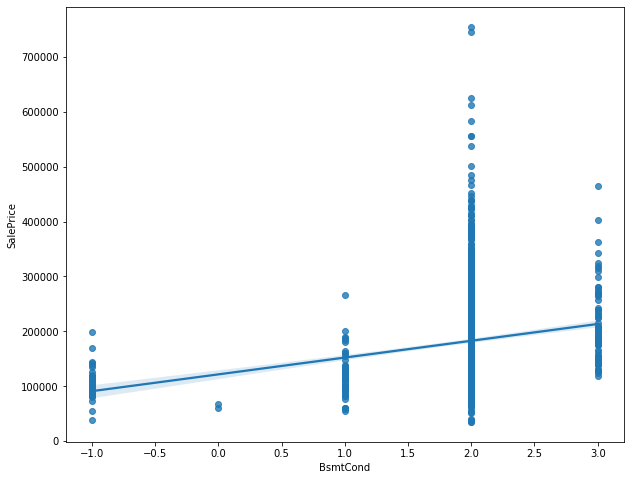

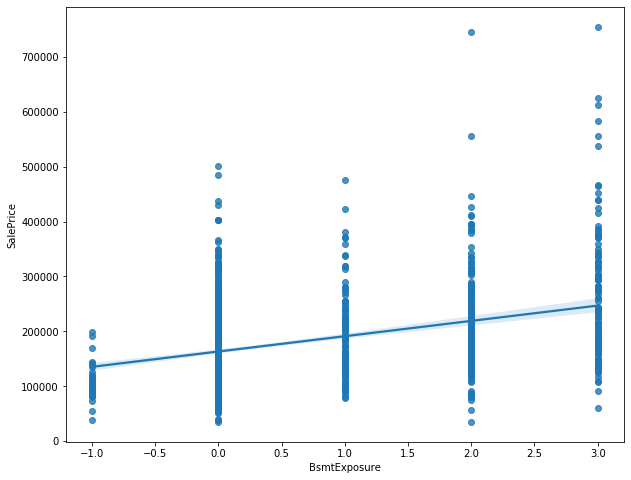

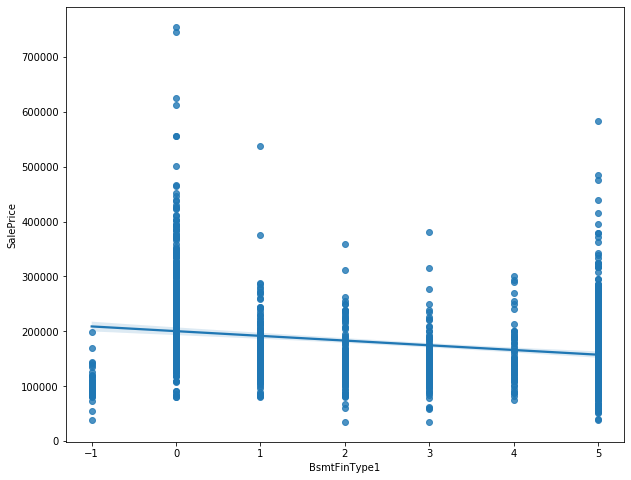

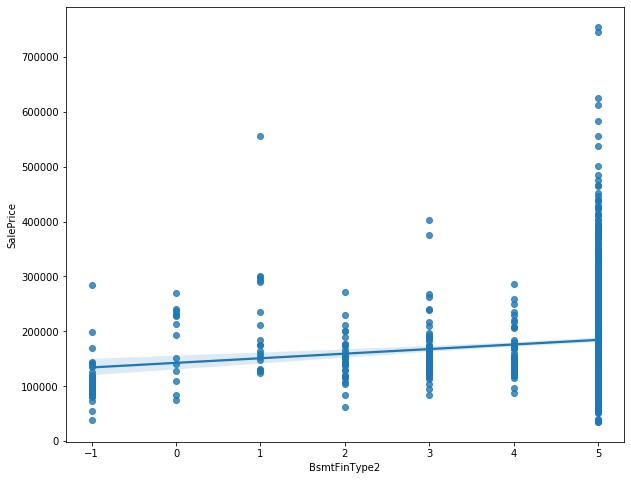

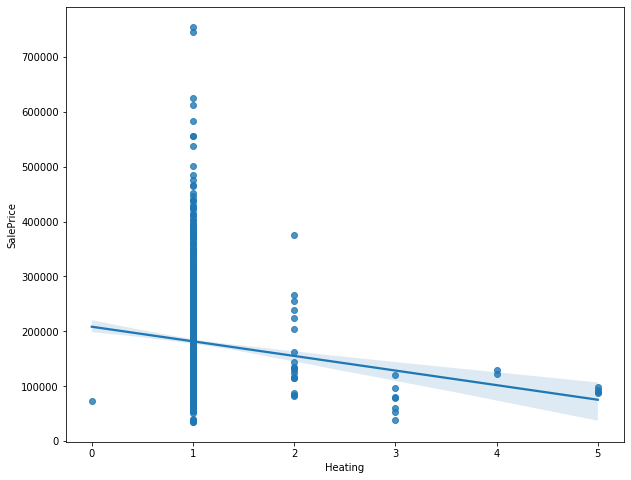

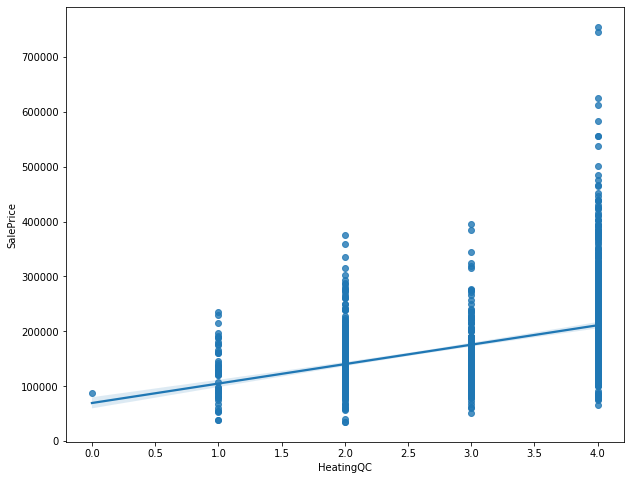

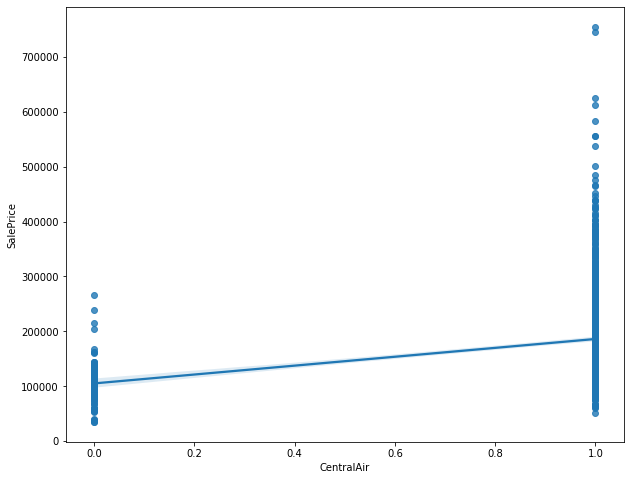

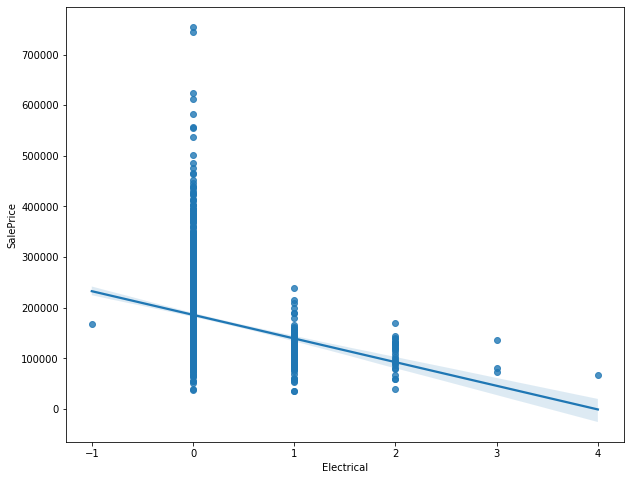

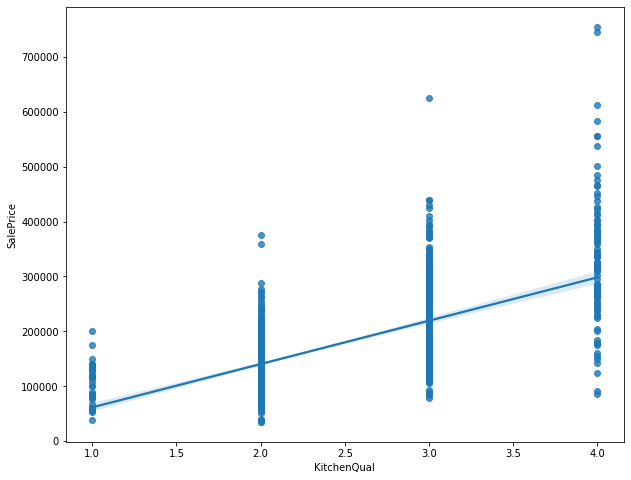

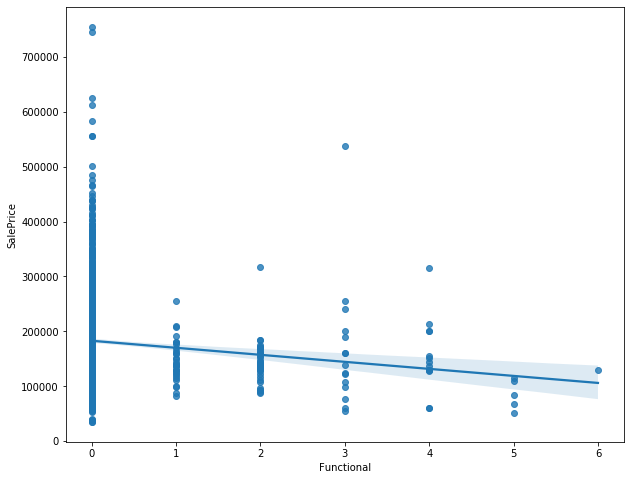

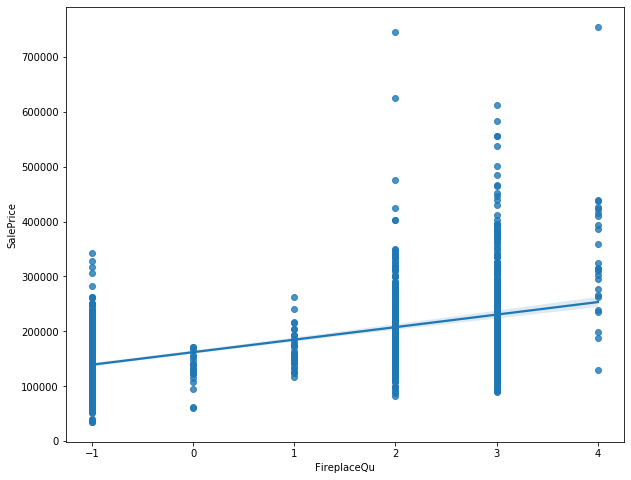

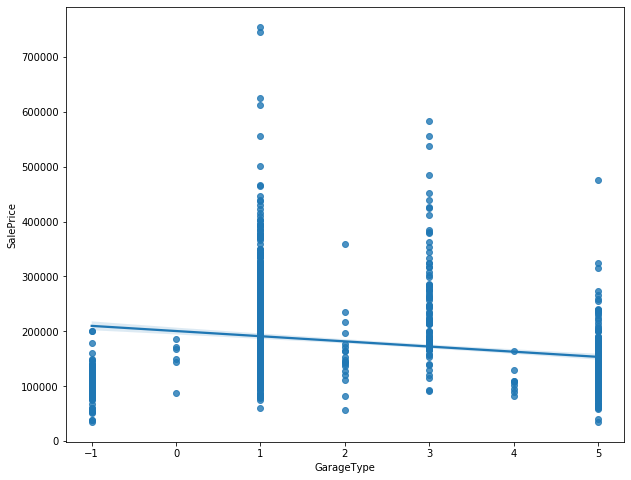

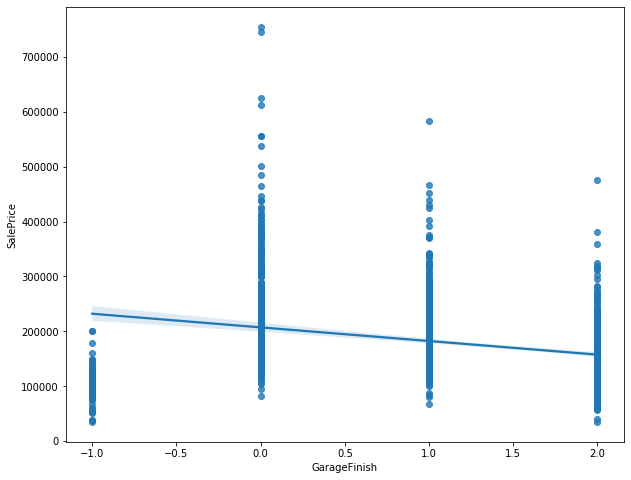

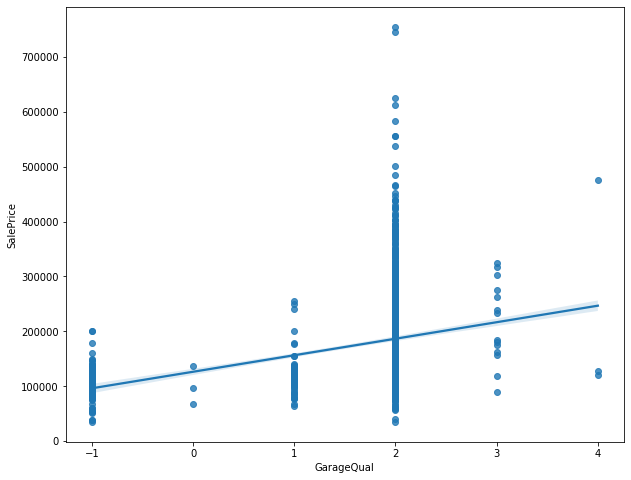

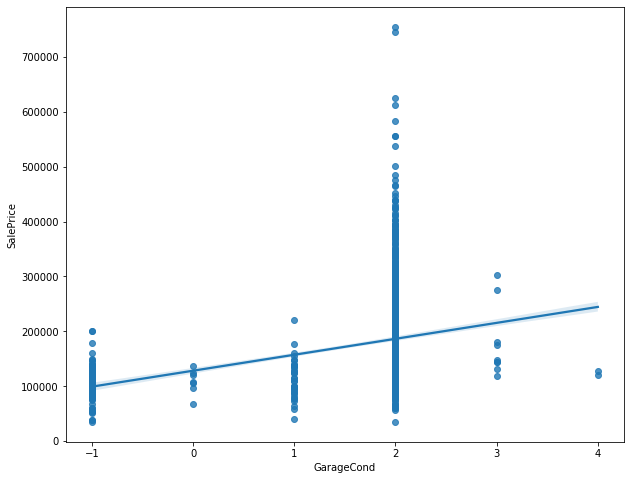

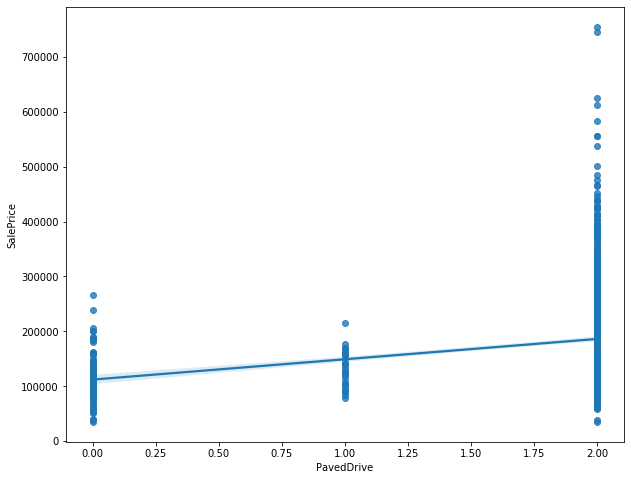

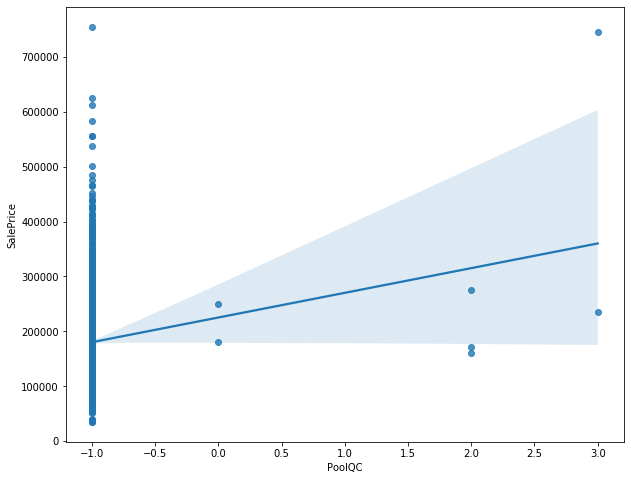

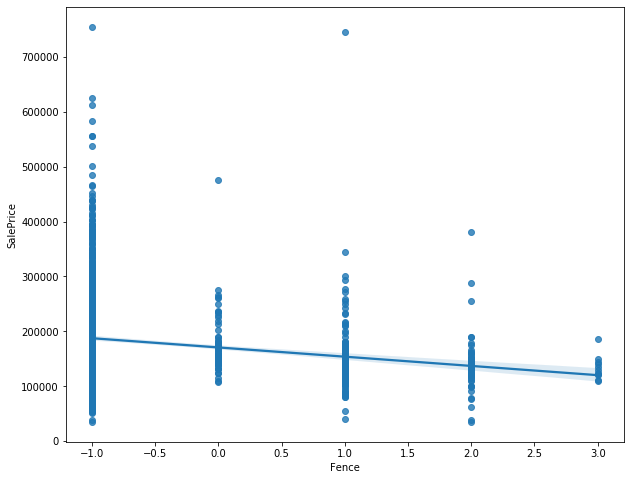

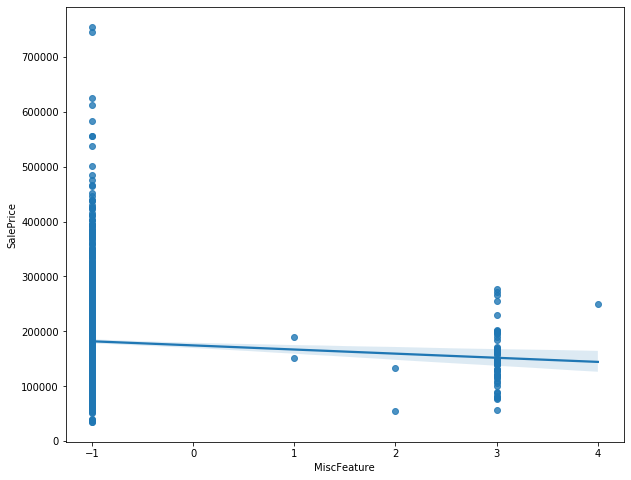

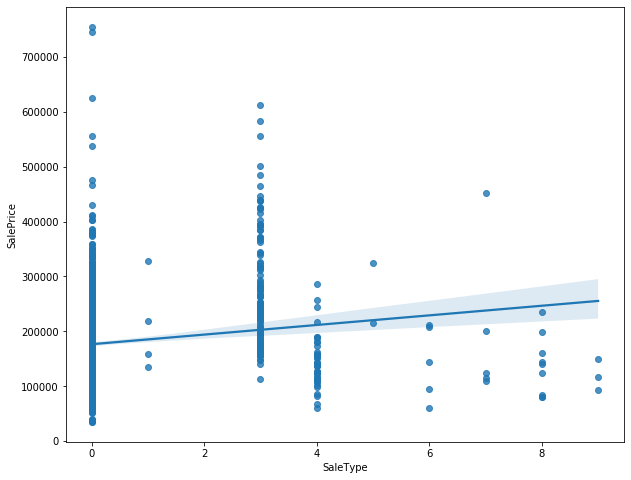

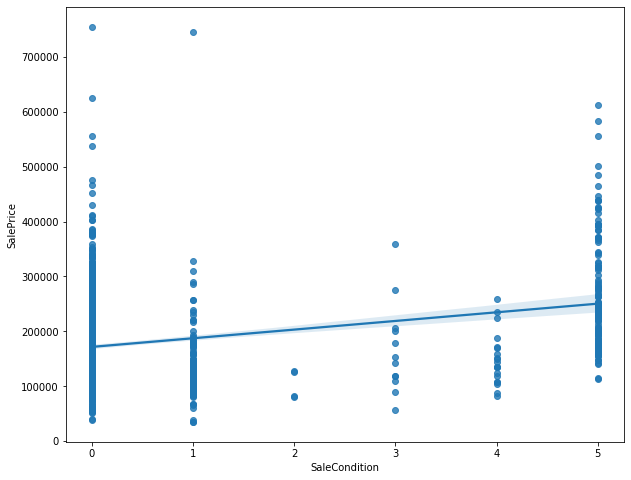

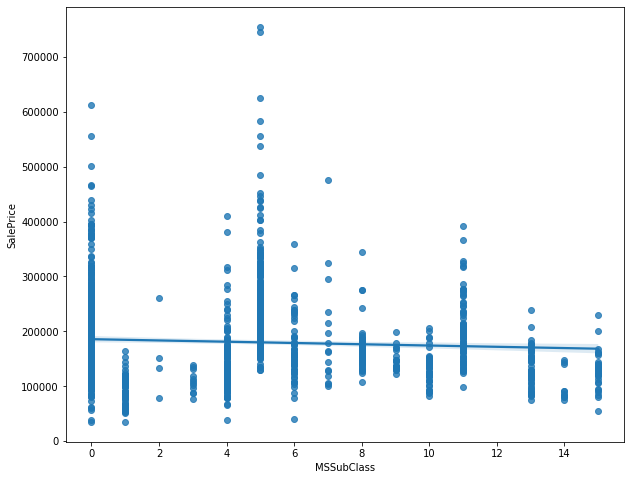

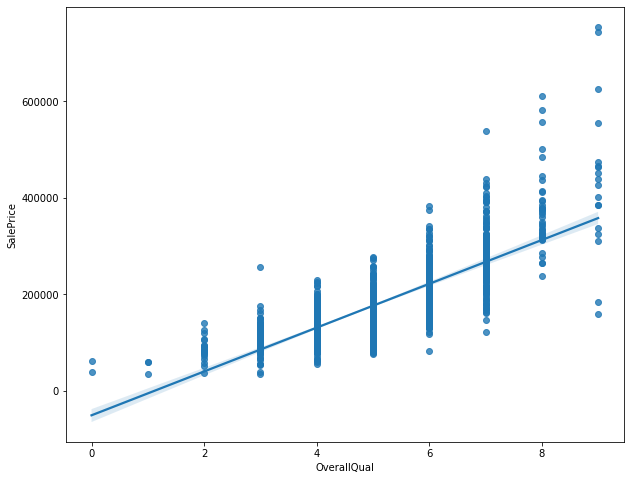

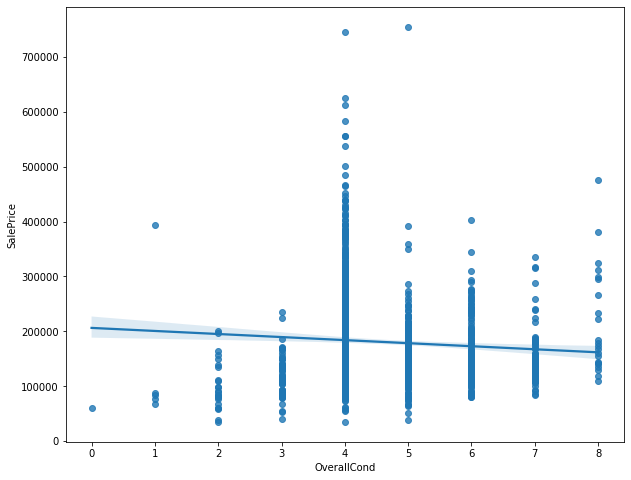

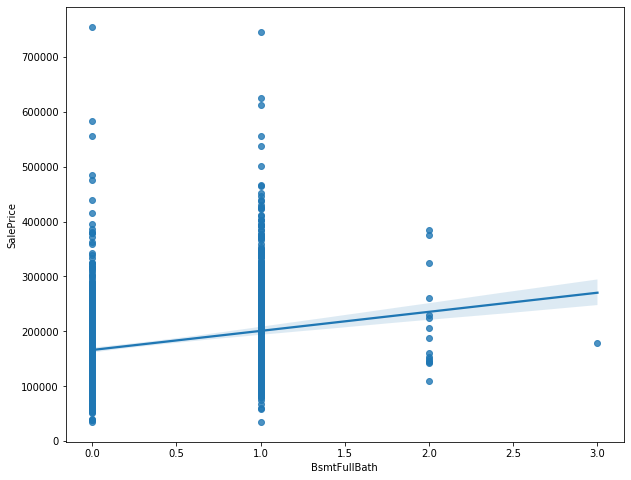

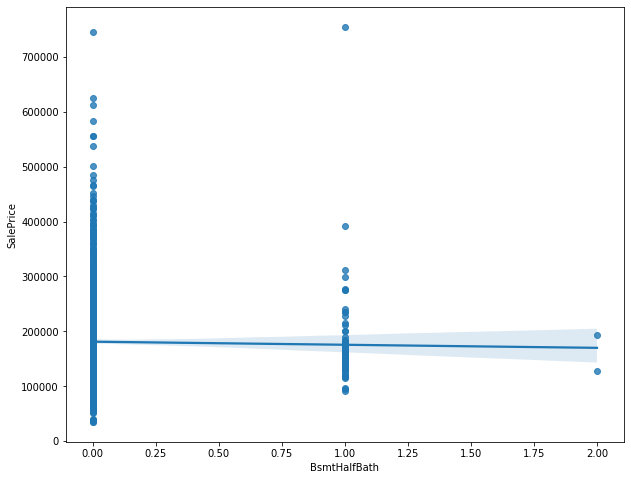

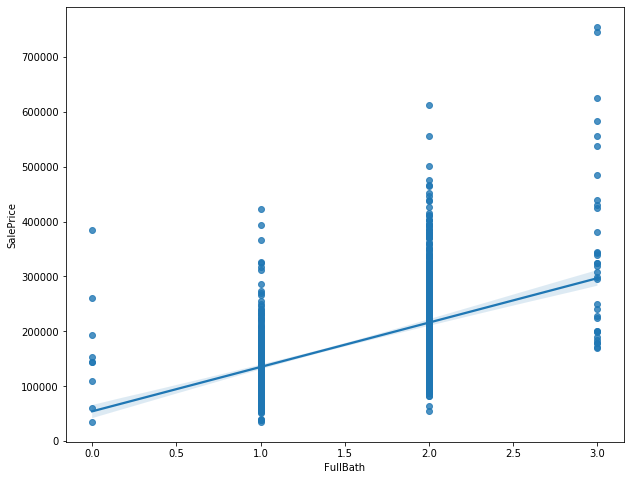

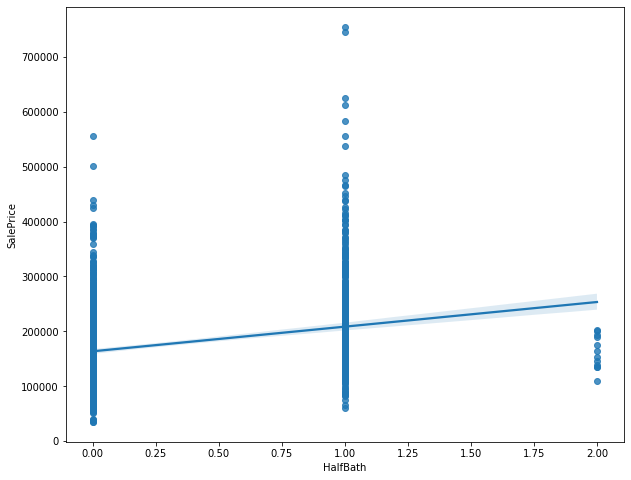

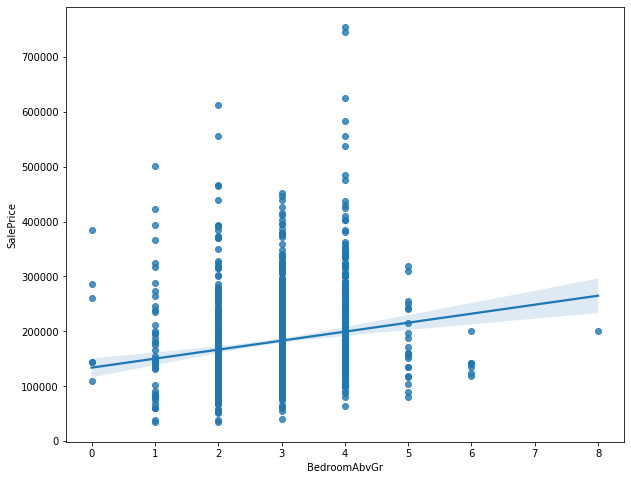

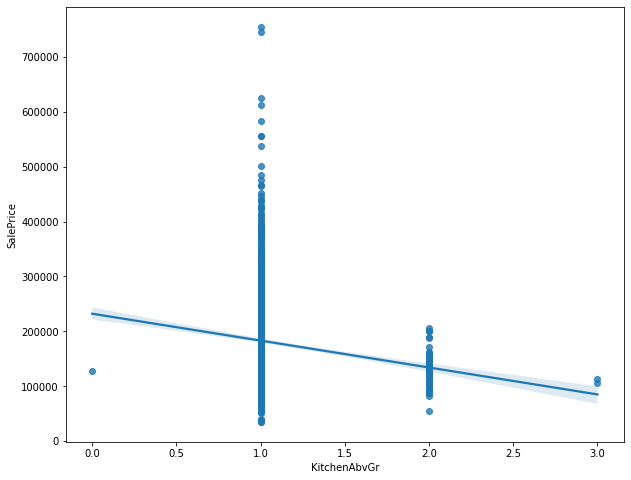

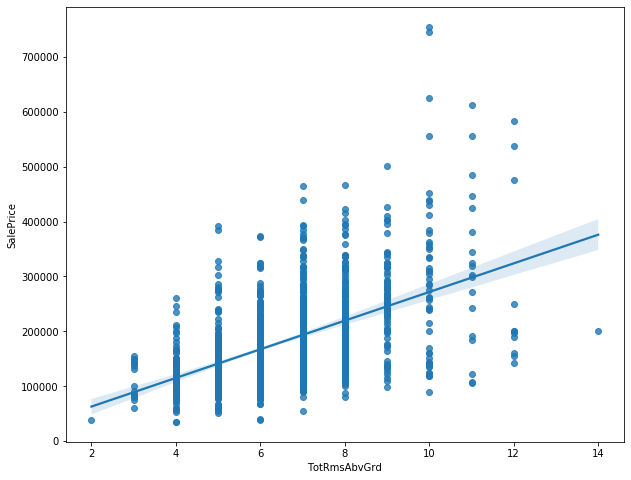

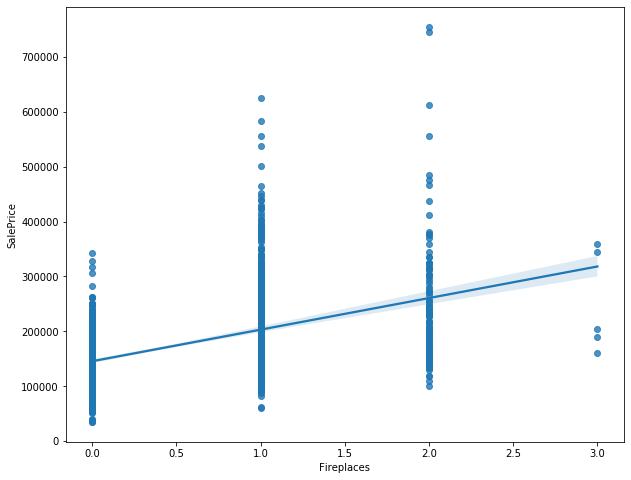

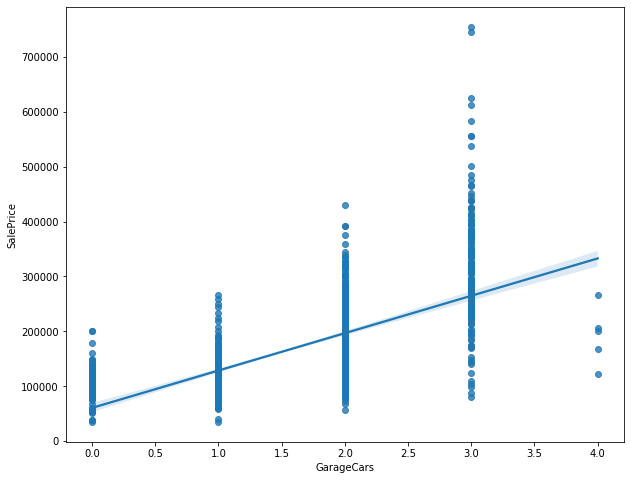

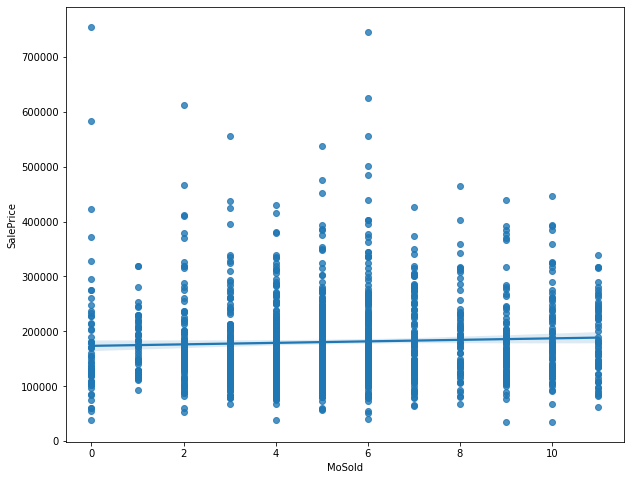

In [44]:
for col in cat_cols:
    sns.regplot(x=train_data[col].cat.codes, y =train_data['SalePrice'])
    plt.xlabel(col)
    plt.show()

I think regplot for categorical data is useless

## SalePrice vs other Numerical variables

### distplot
- on combined data (considering both test and train data)

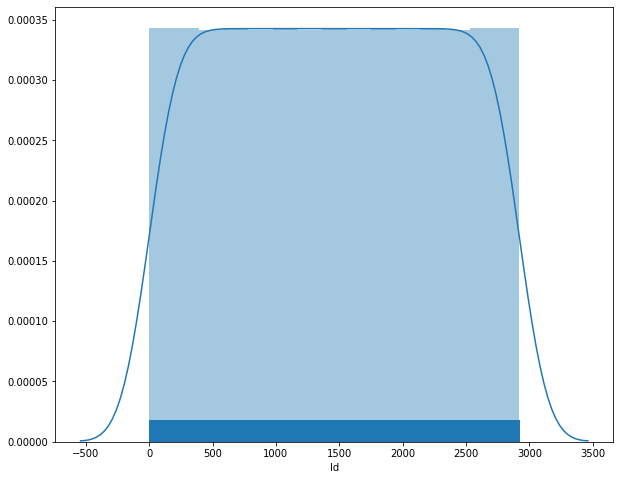

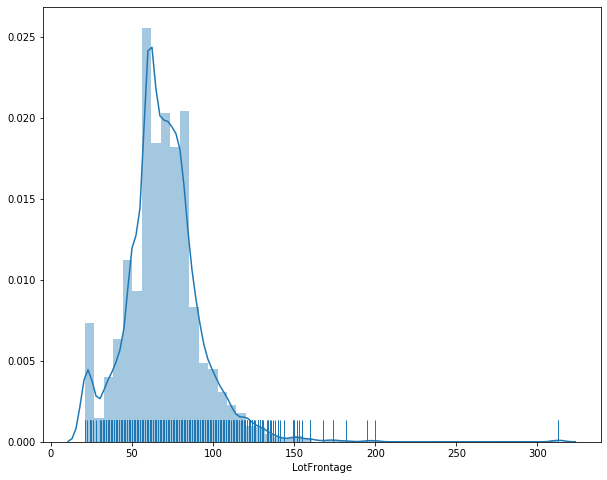

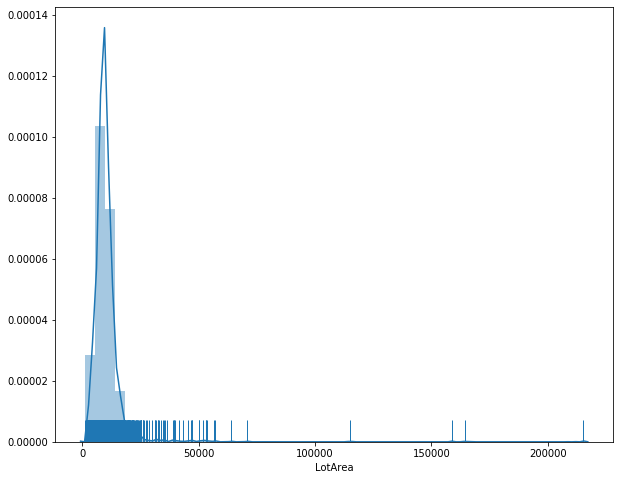

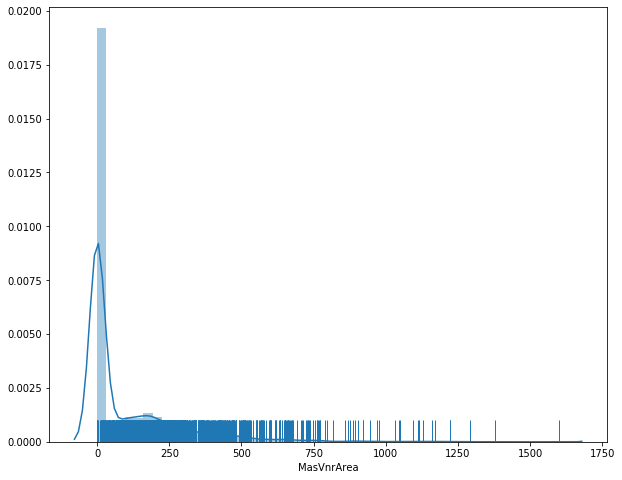

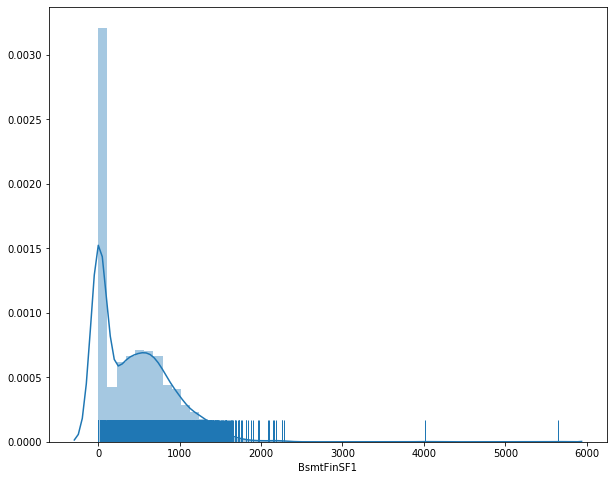

/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


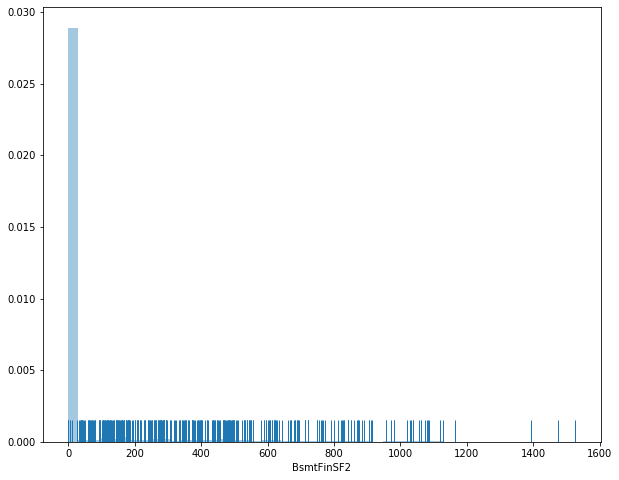

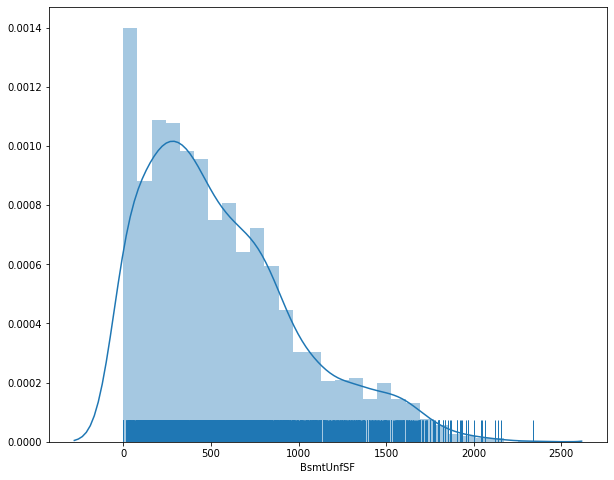

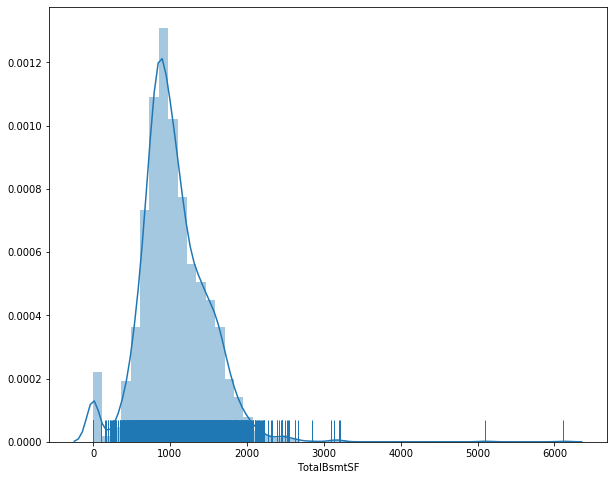

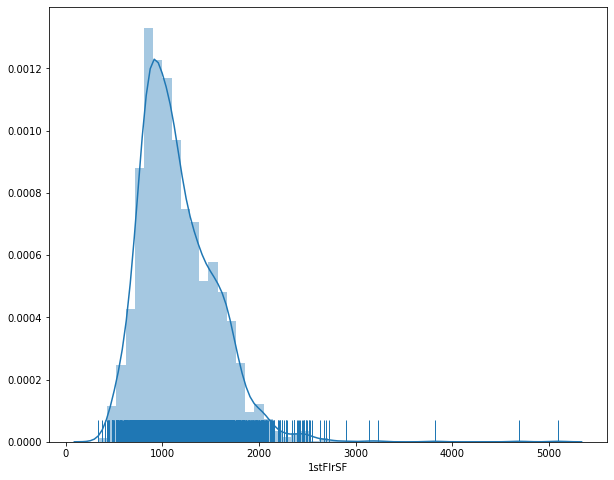

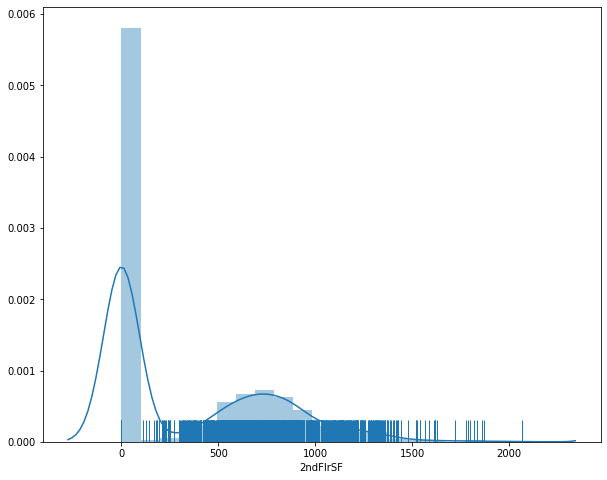

/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


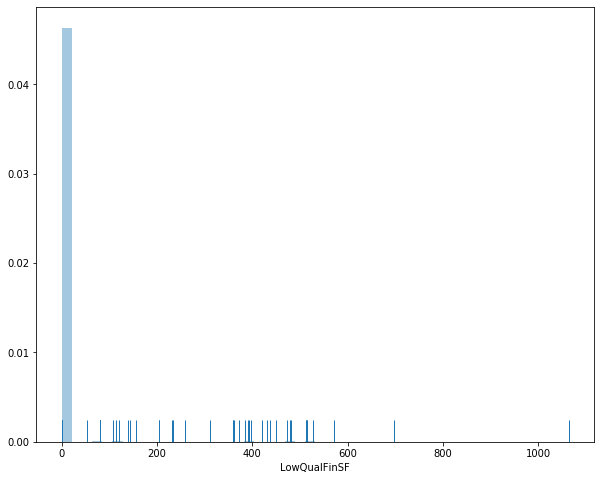

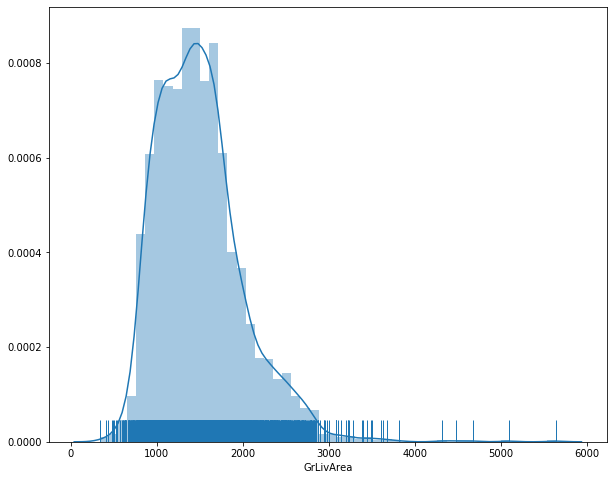

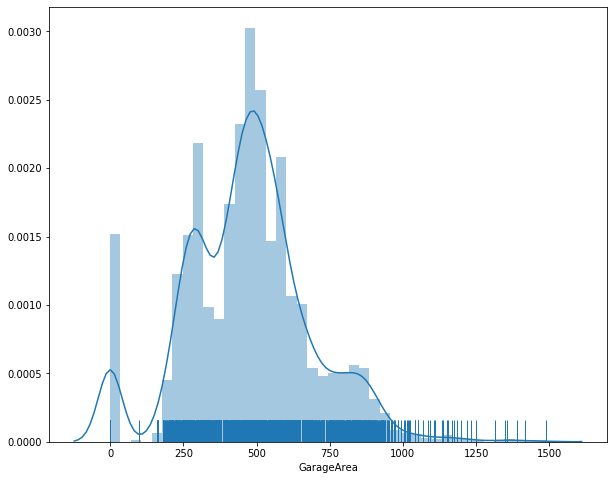

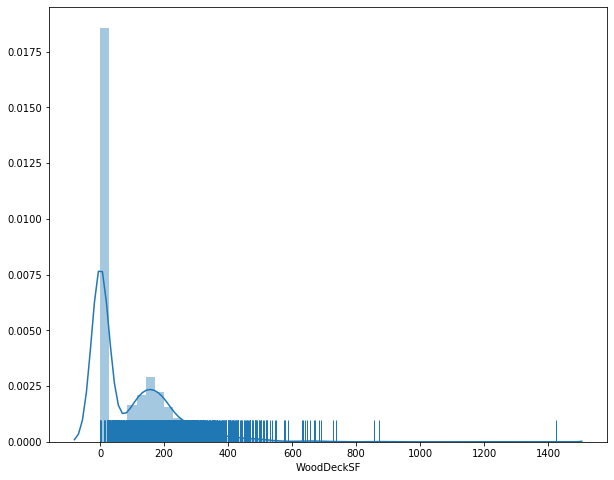

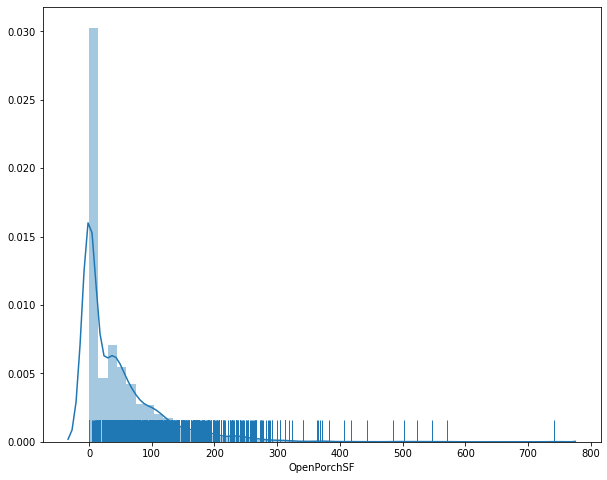

/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


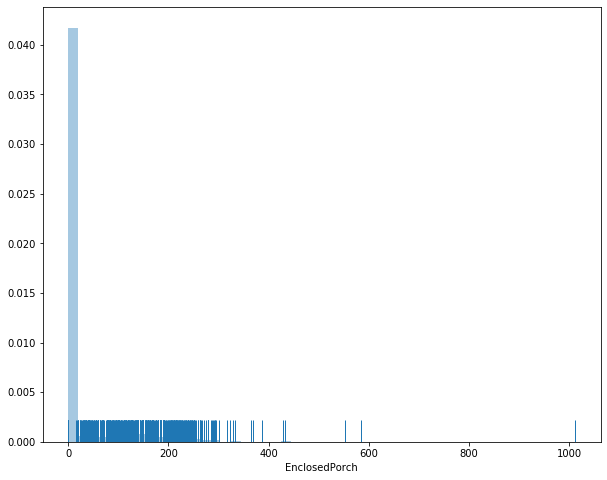

/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


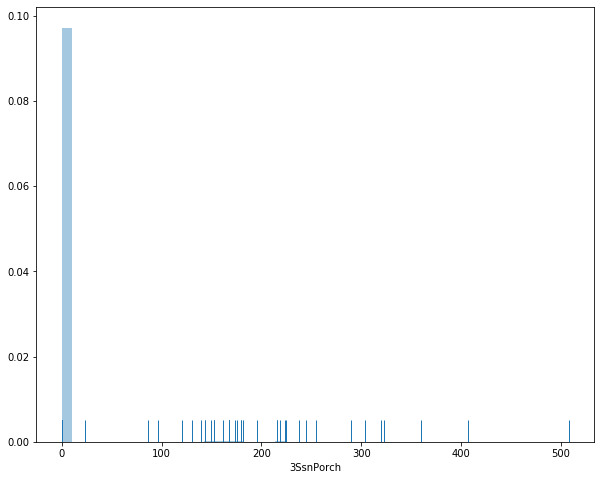

/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


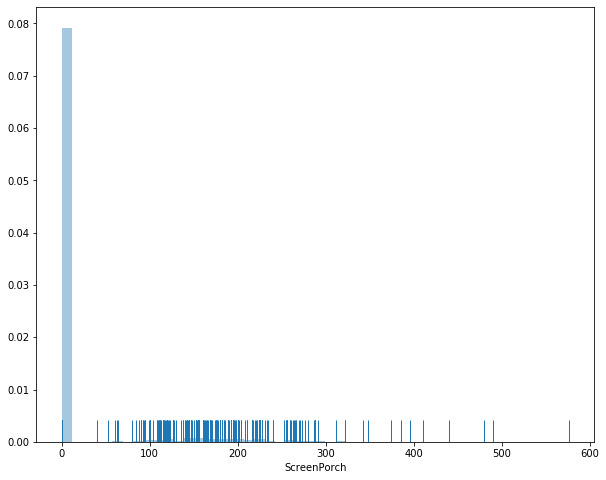

/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


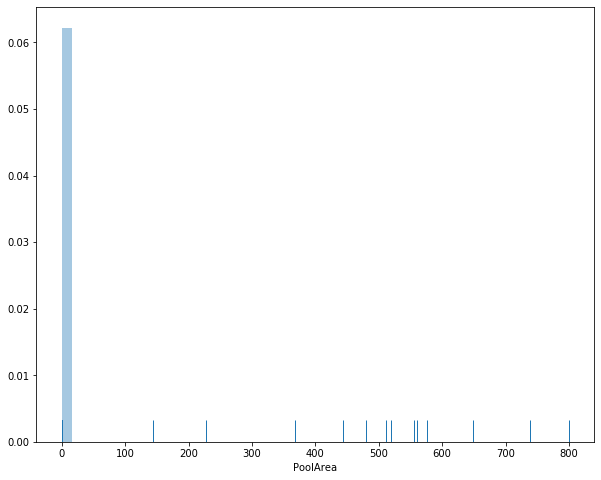

/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


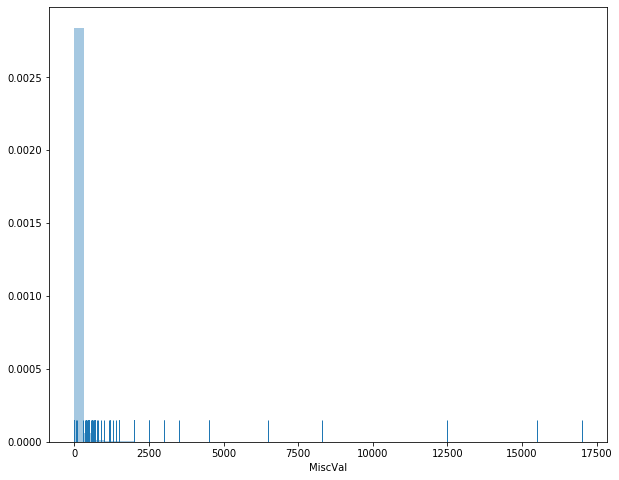

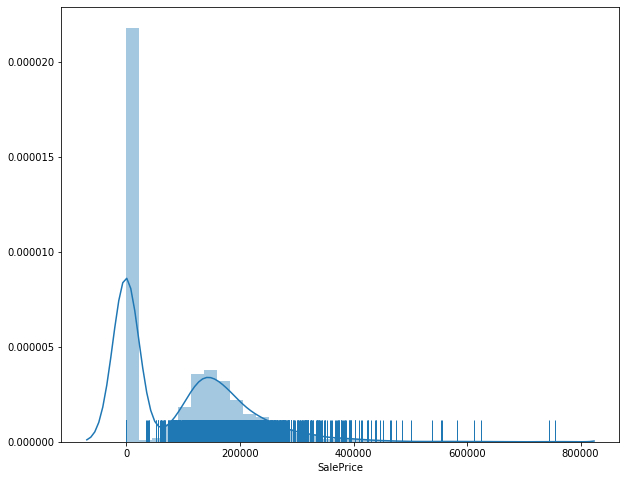

In [45]:
for col in data.describe().columns:
    sns.distplot(data[col], rug=True)
    plt.show()

### mean |median | mode
- on combined data (considering both test and train data)

In [46]:
print ('col', 'mode', 'median', 'mean')
for col in data.describe().columns:
    print(col, stats.mode(data[col])[0] ,np.nanmedian(data[col]), np.mean(data[col]))

col mode median mean
Id [1] 1460.0 1460.0
LotFrontage [60.] 68.0 69.30579531442663
LotArea [9600] 9453.0 10168.11408016444
MasVnrArea [0.] 0.0 102.20131215469613
BsmtFinSF1 [0.] 368.5 441.4232350925291
BsmtFinSF2 [0.] 0.0 49.58224811514736
BsmtUnfSF [0.] 467.0 560.7721041809458
TotalBsmtSF [0.] 989.5 1051.7775873886224
1stFlrSF [864] 1082.0 1159.5817060637205
2ndFlrSF [0] 0.0 336.4837273038712
LowQualFinSF [0] 0.0 4.694415895854744
GrLivArea [864] 1444.0 1500.7598492634463
GarageArea [0.] 480.0 472.8745716244003
WoodDeckSF [0] 0.0 93.70983213429257
OpenPorchSF [0] 26.0 47.486810551558754
EnclosedPorch [0] 0.0 23.098321342925658
3SsnPorch [0] 0.0 2.602261048304214
ScreenPorch [0] 0.0 16.062350119904078
PoolArea [0] 0.0 2.2517985611510793
MiscVal [0] 0.0 50.82596779719082
SalePrice [-999] 34900.0 89992.25933538884


### regplot

- visualizing relationship of Saleprice with other numerical variables in TRAIN data

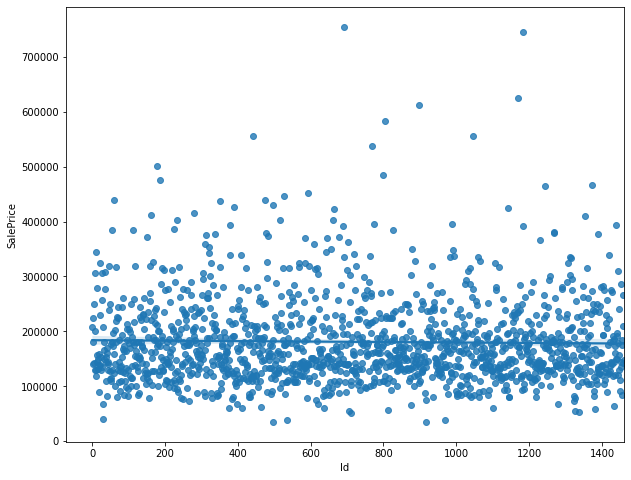

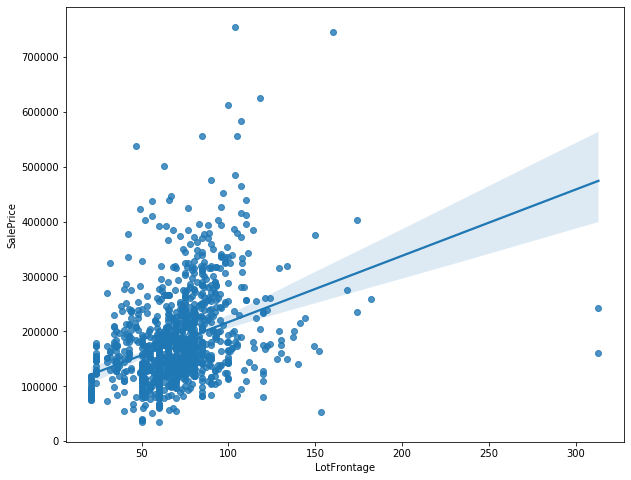

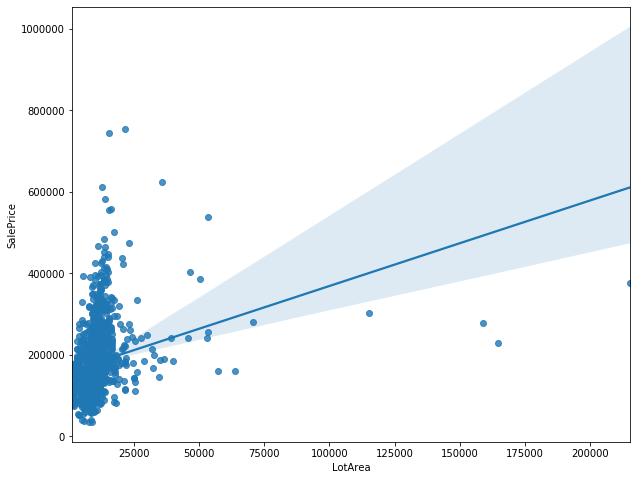

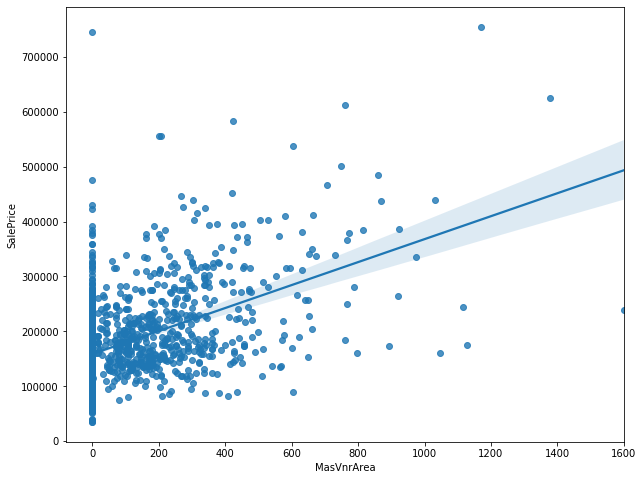

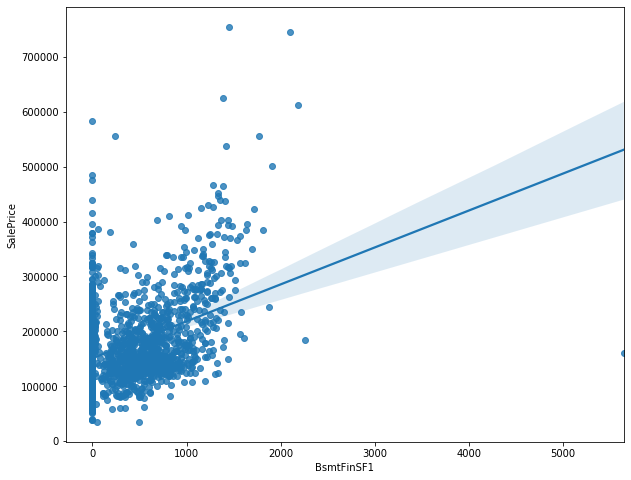

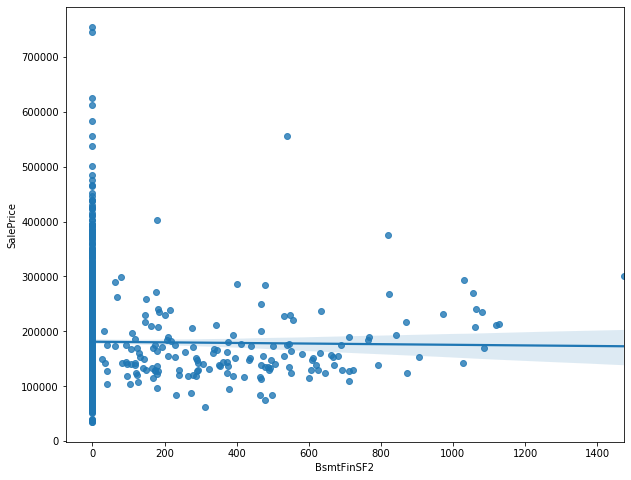

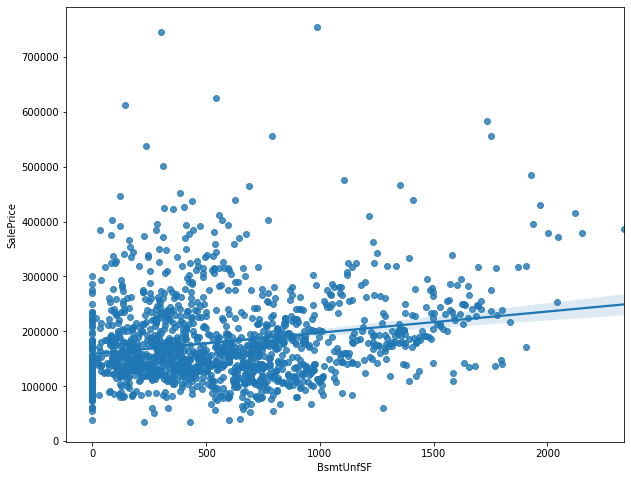

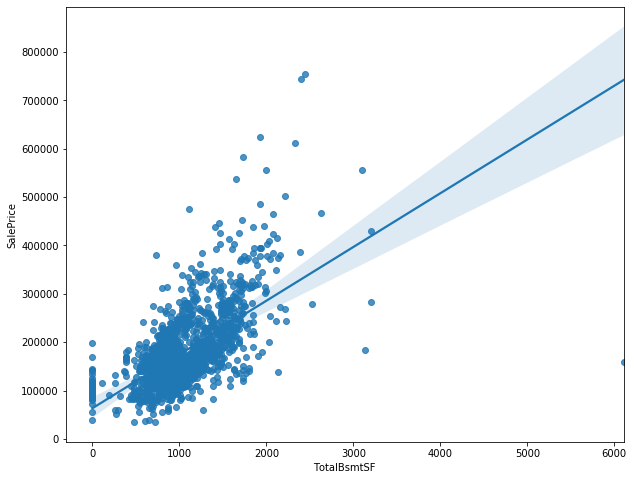

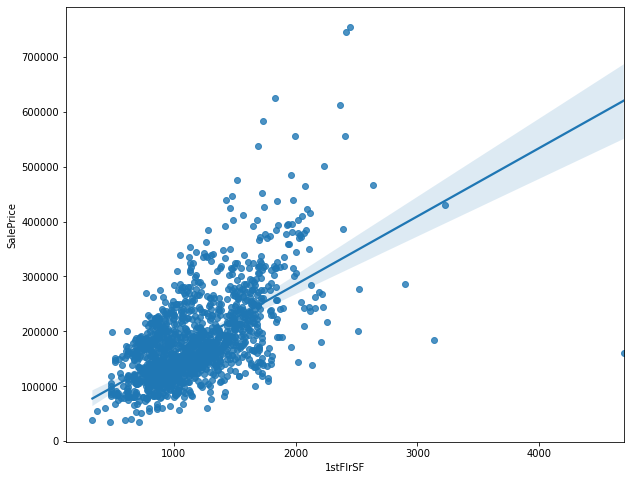

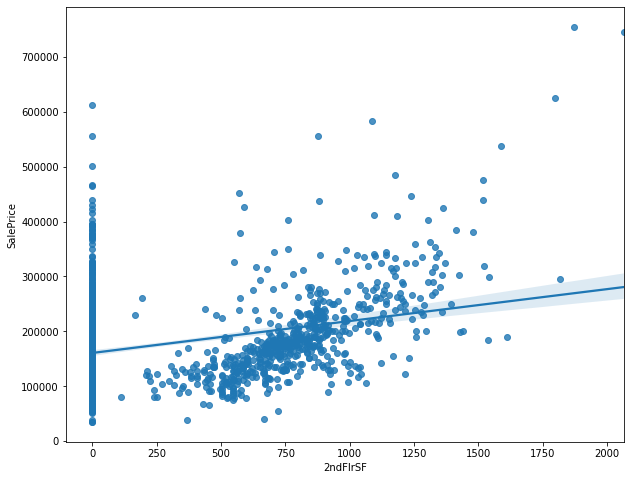

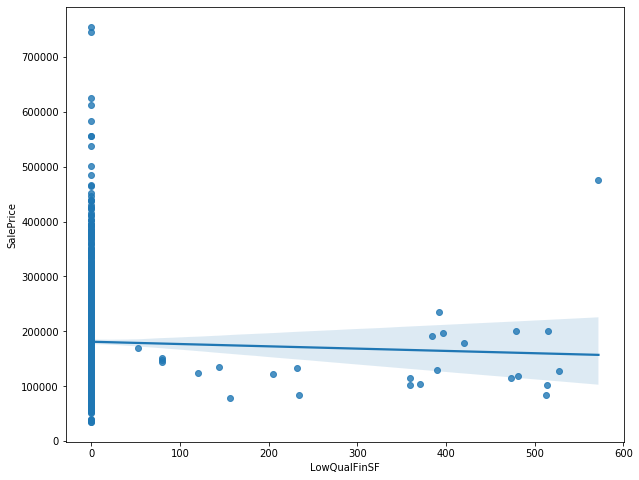

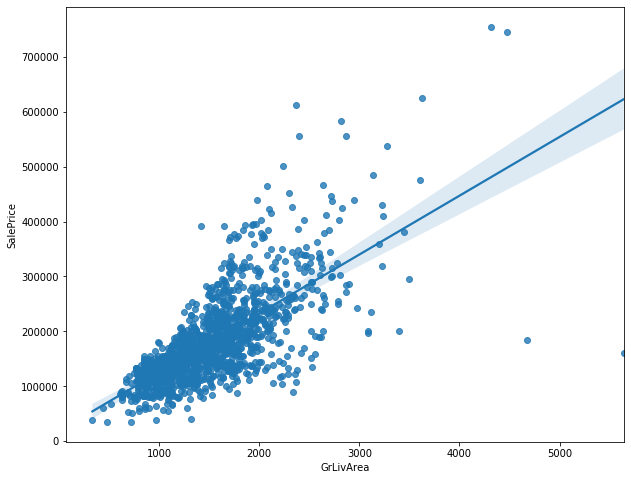

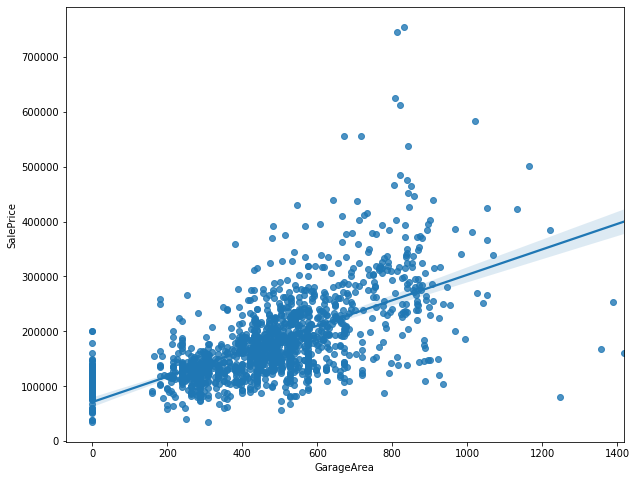

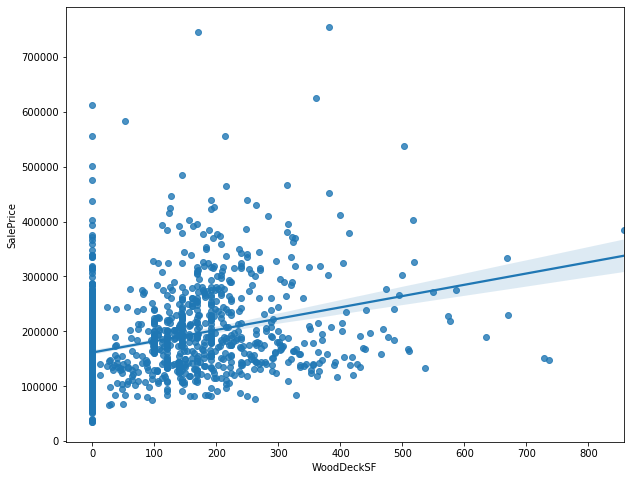

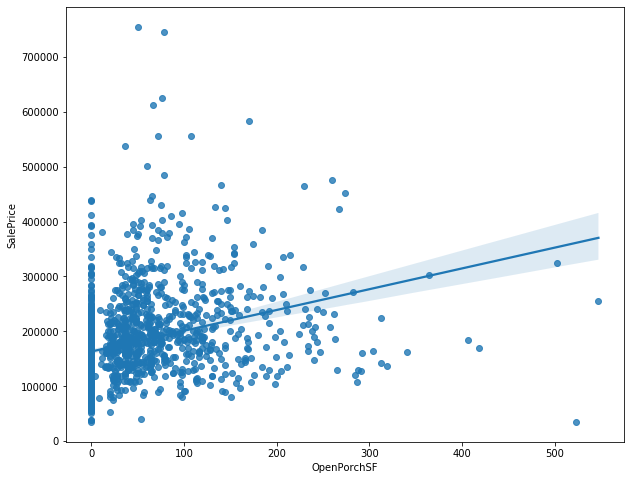

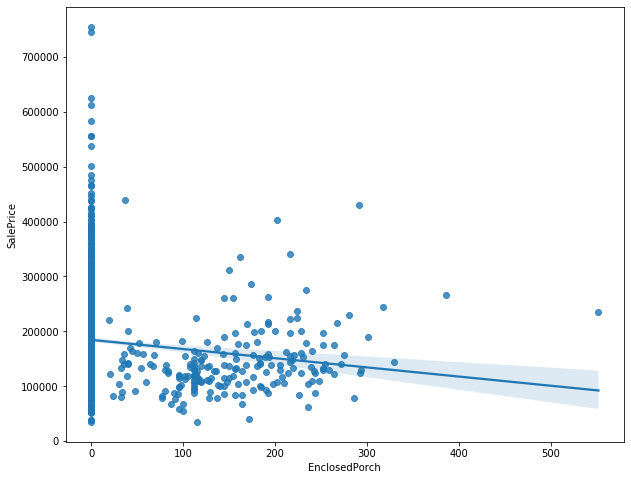

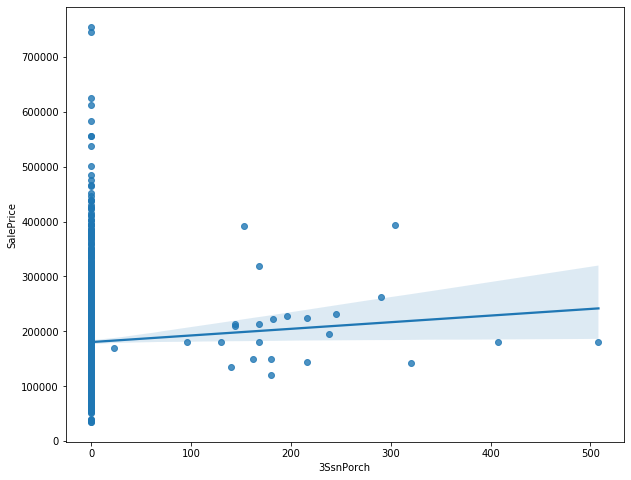

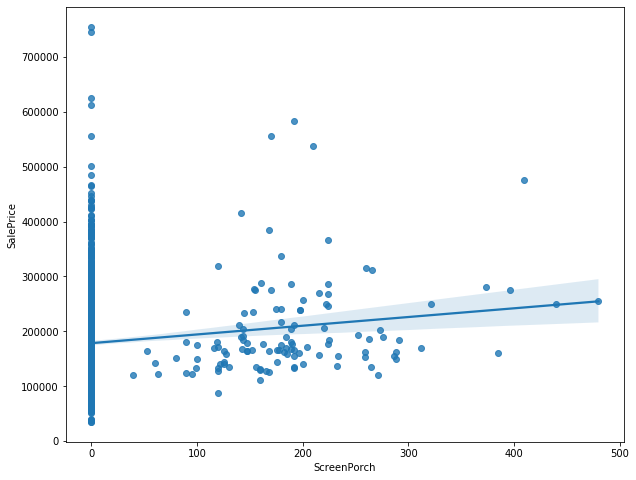

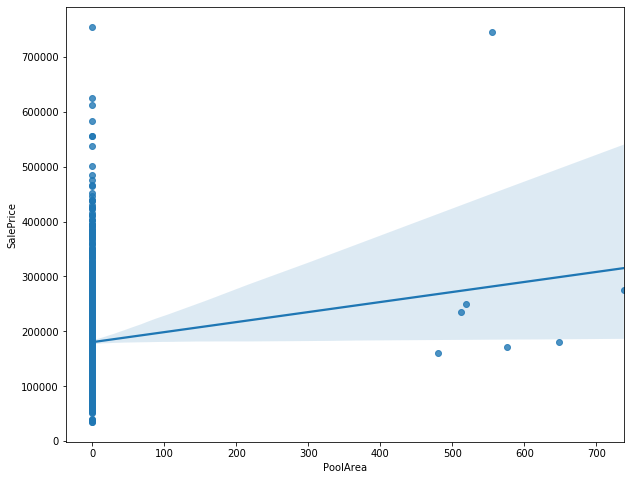

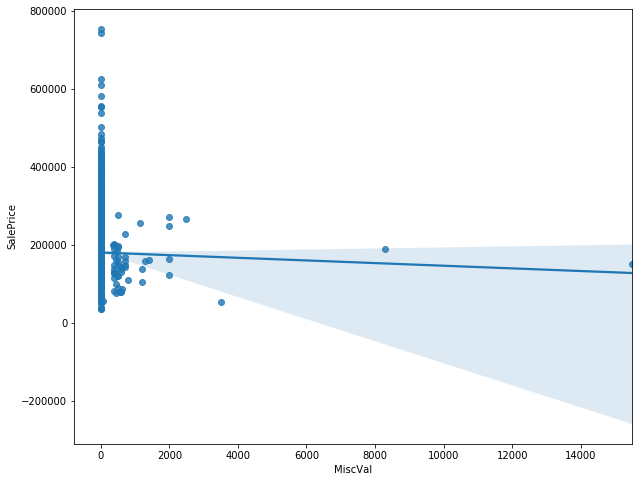

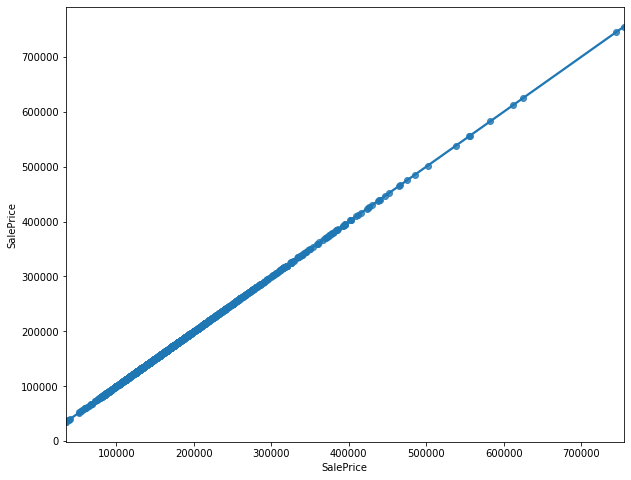

In [47]:
for col in train_data.describe().columns:
    sns.regplot(data= train_data, x=col, y ='SalePrice')
    plt.show()

### relplot

- visualizing relationship of Saleprice with other numerical variables in TRAIN data
- note that axis is flipped compared to regplot

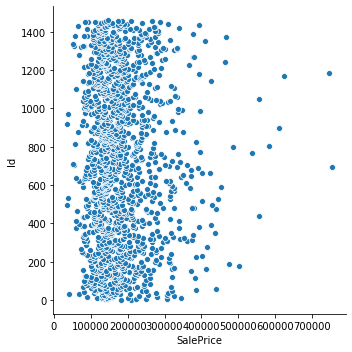

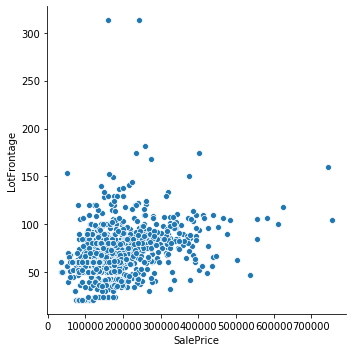

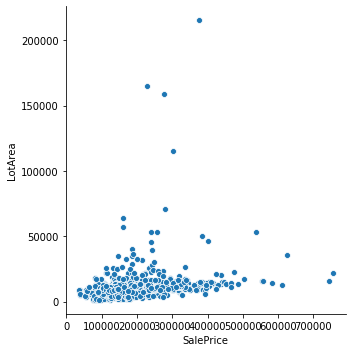

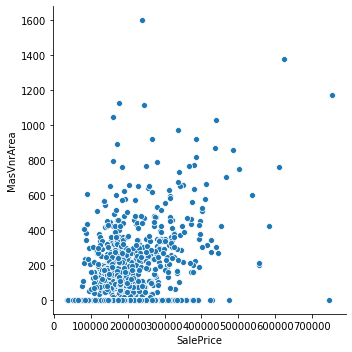

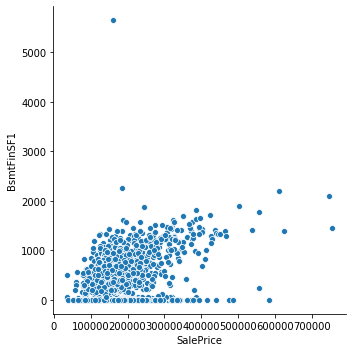

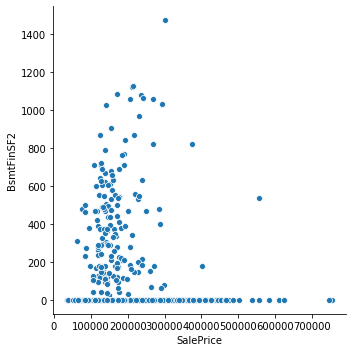

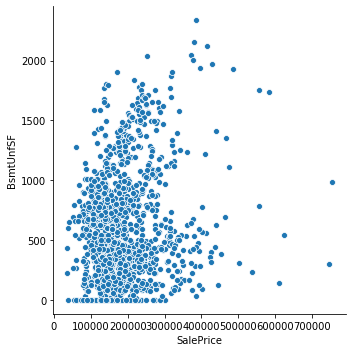

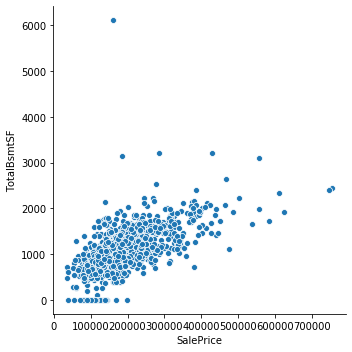

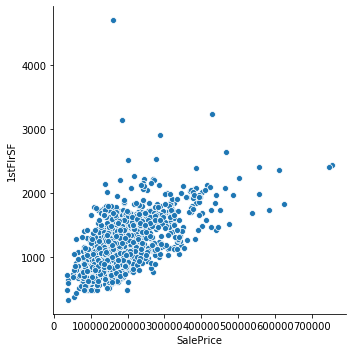

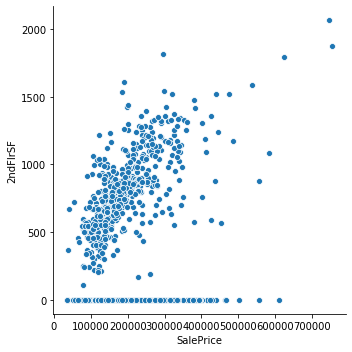

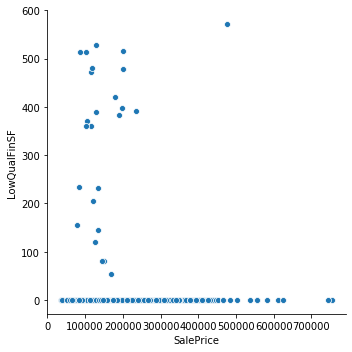

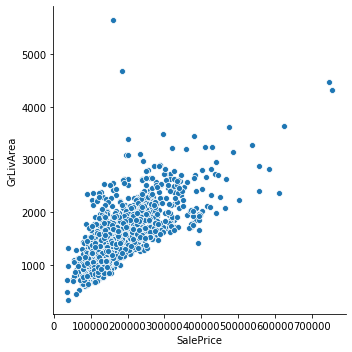

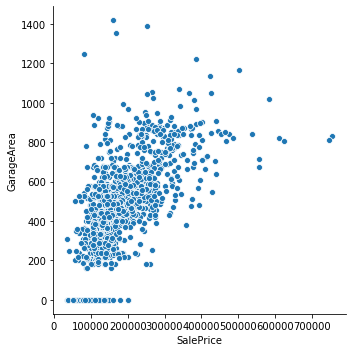

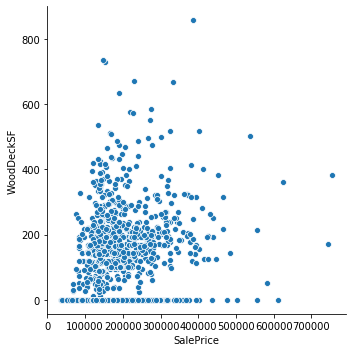

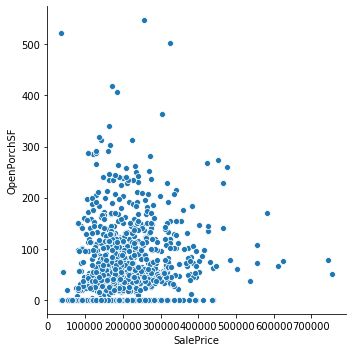

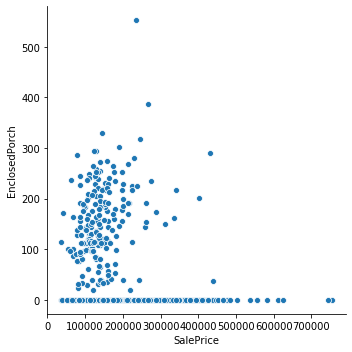

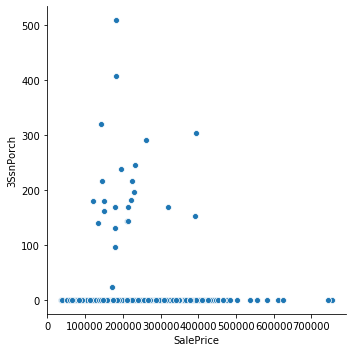

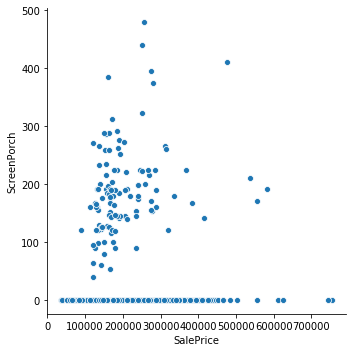

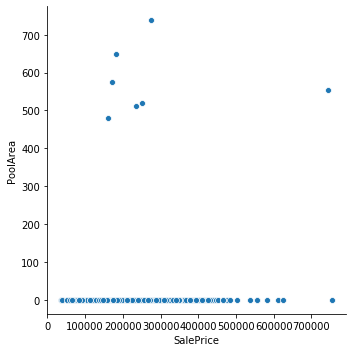

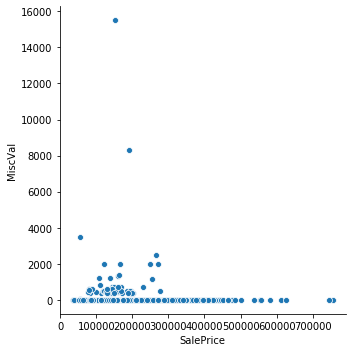

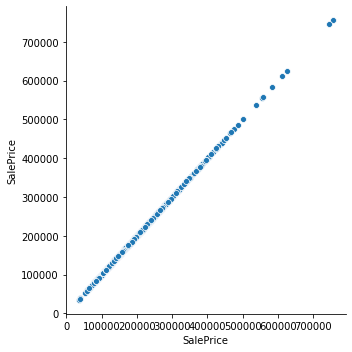

In [48]:
for col in train_data.describe().columns:
    sns.relplot(data= train_data, y=col, x ='SalePrice')
    plt.show()

### boxplot
- visualizing data other numerical variables in TRAIN data

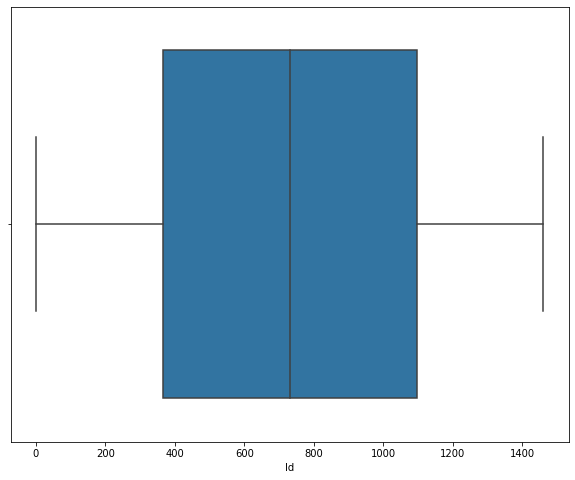

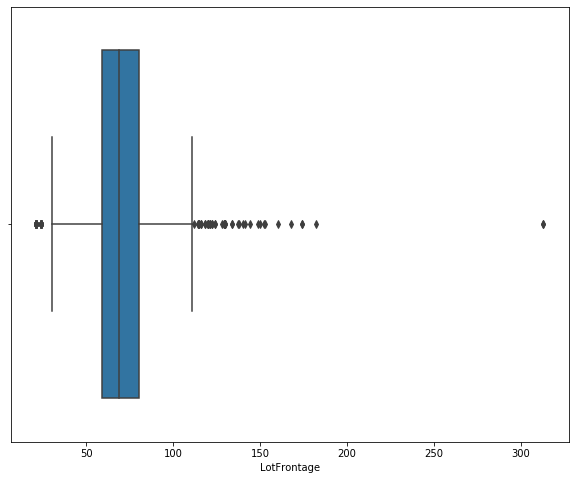

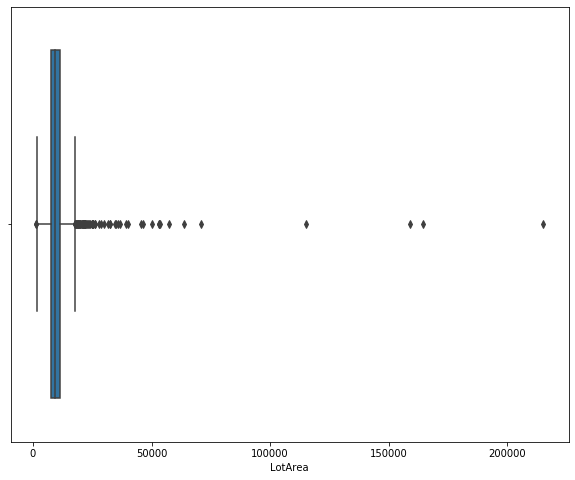

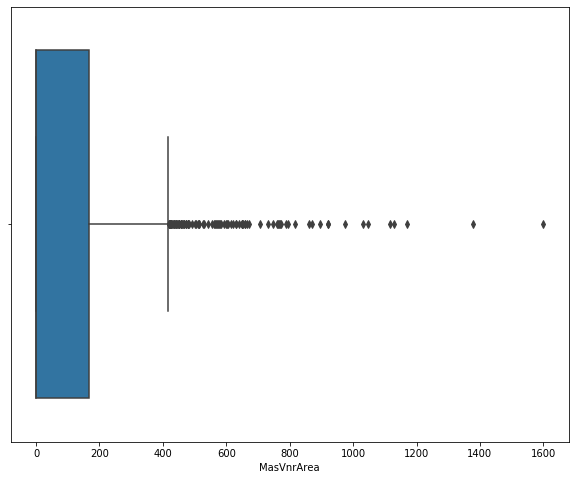

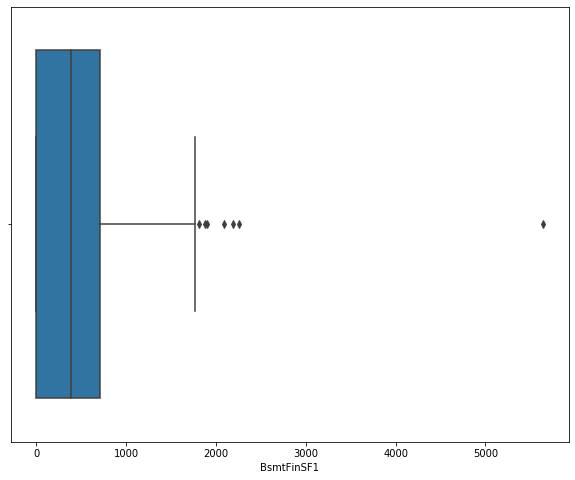

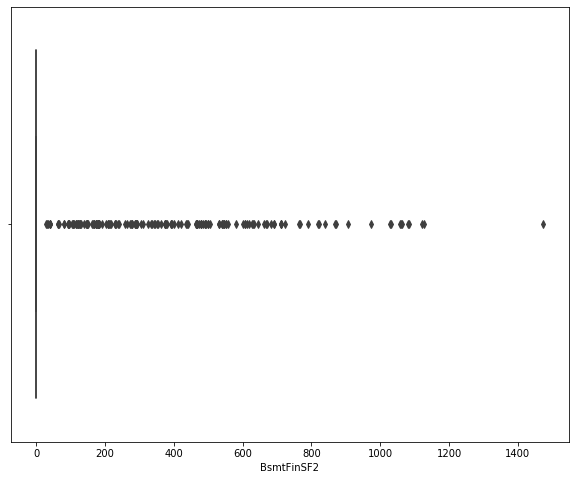

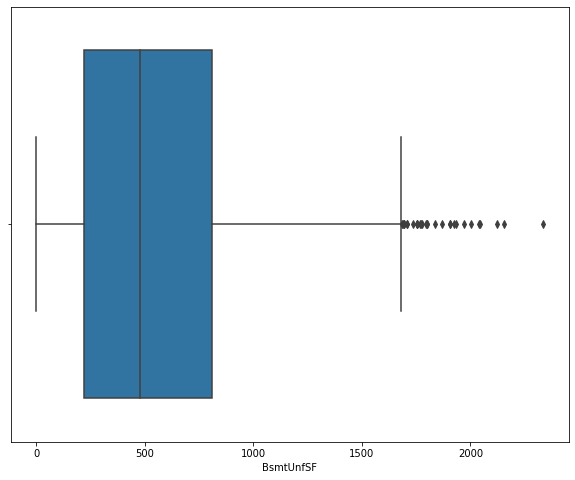

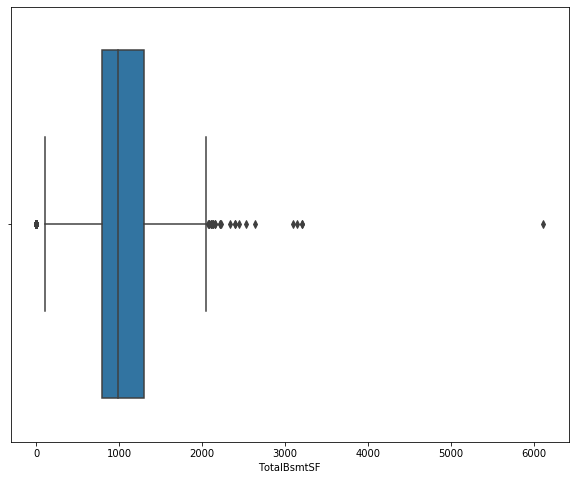

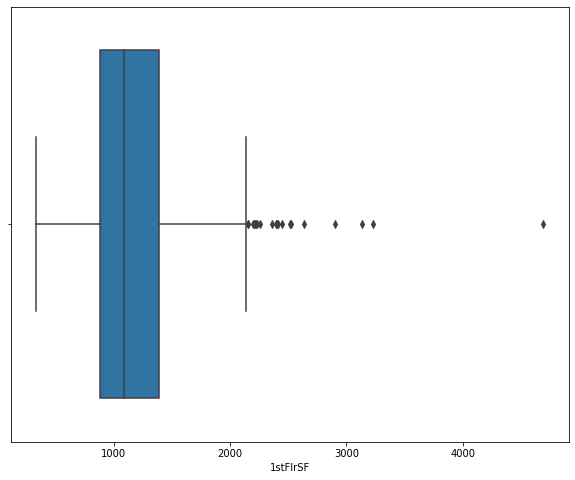

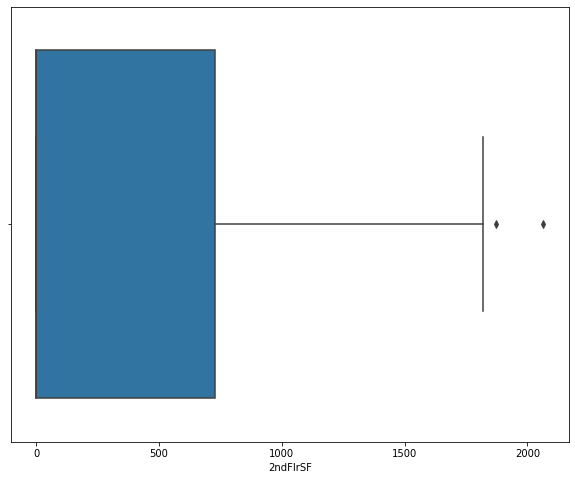

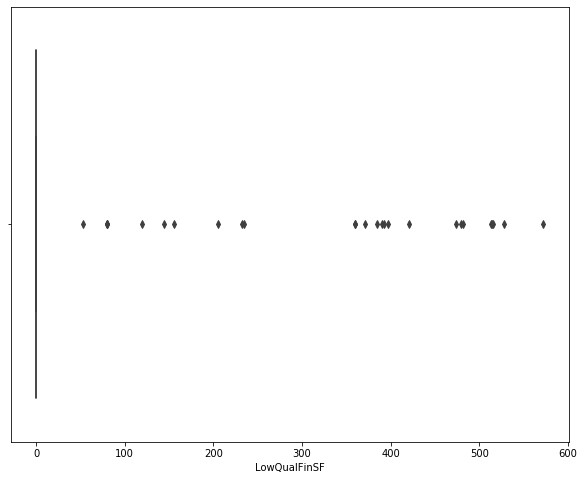

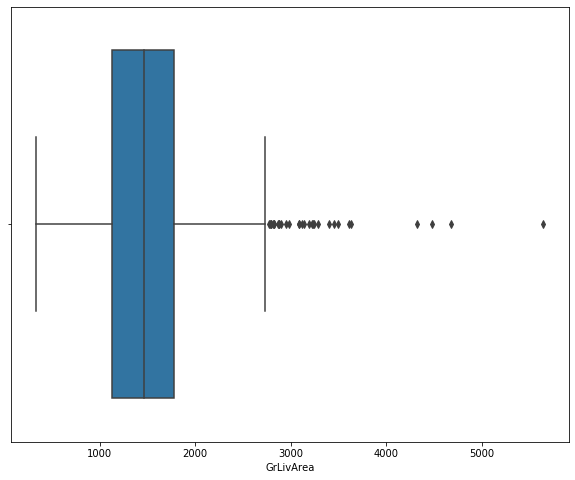

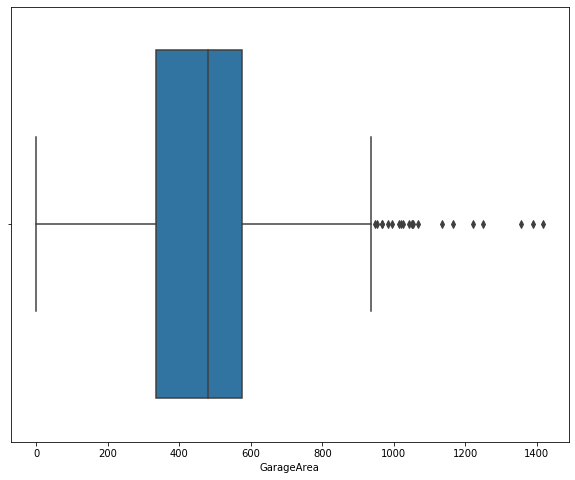

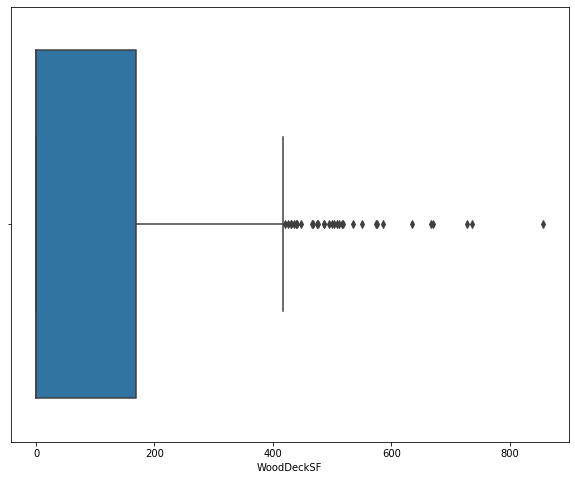

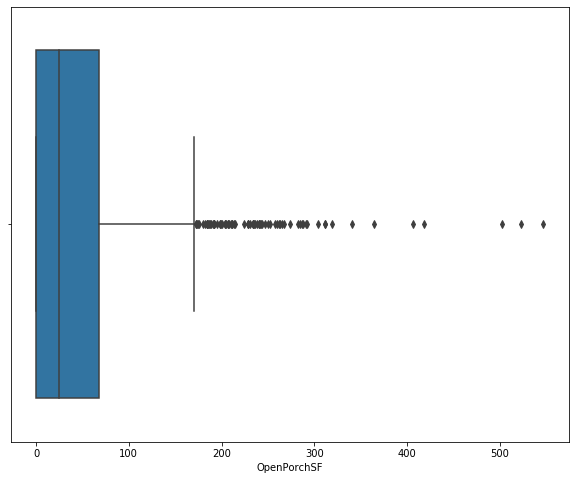

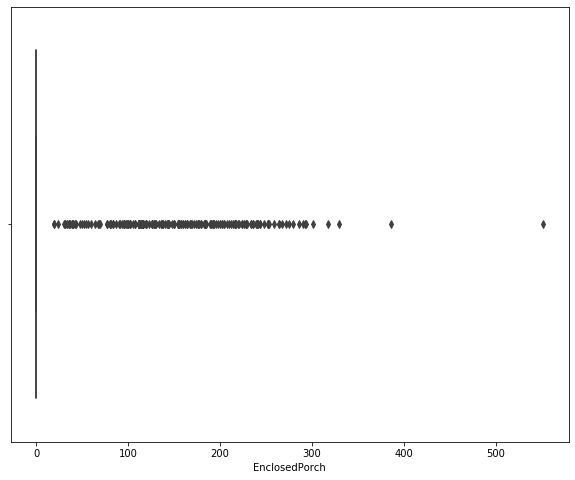

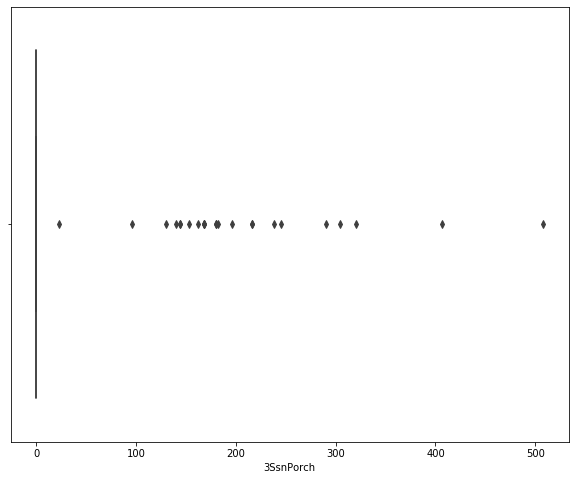

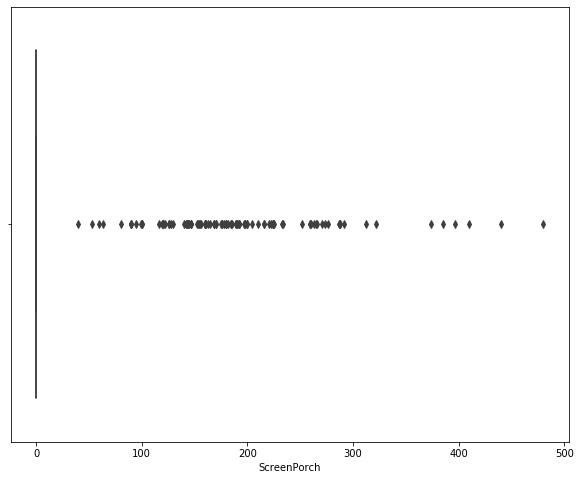

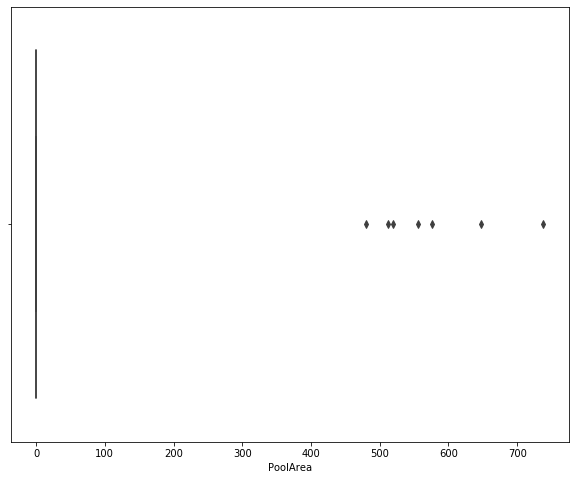

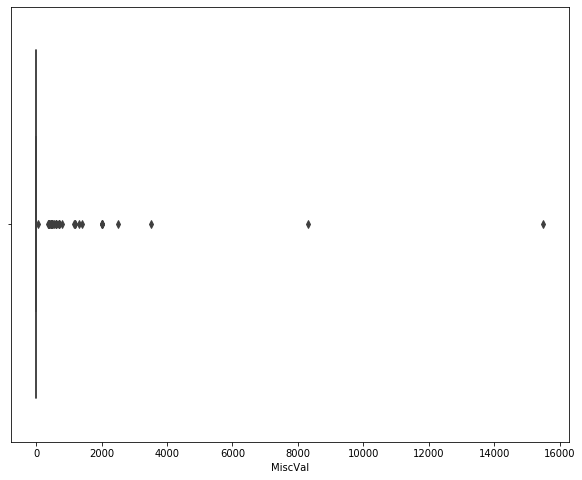

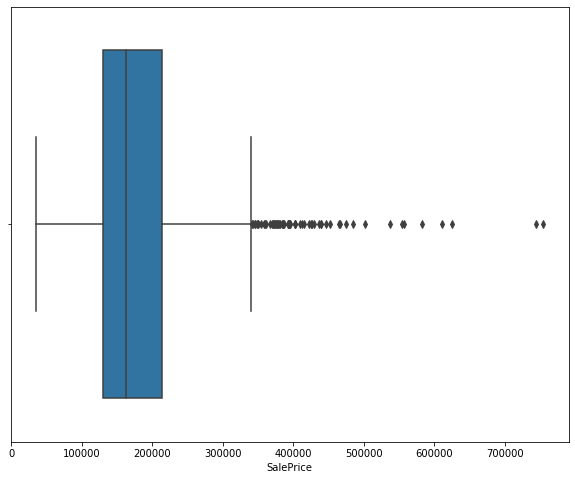

In [49]:
for col in train_data.describe().columns:
    sns.boxplot(train_data[col])
    plt.show()

Columns that can be removed: 
- BSMTFin2 , LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal, PoolArea

## Year columns

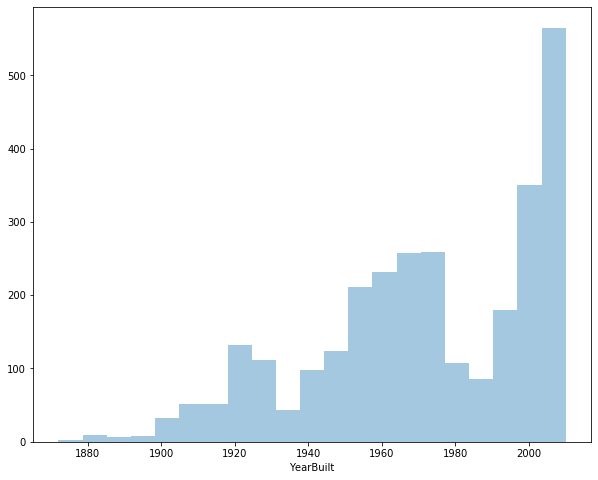

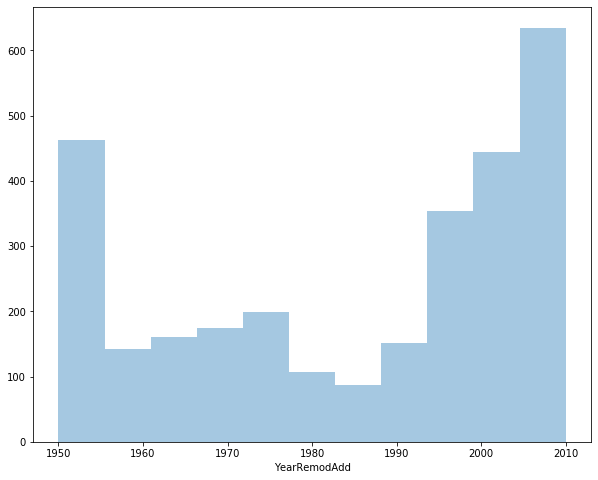

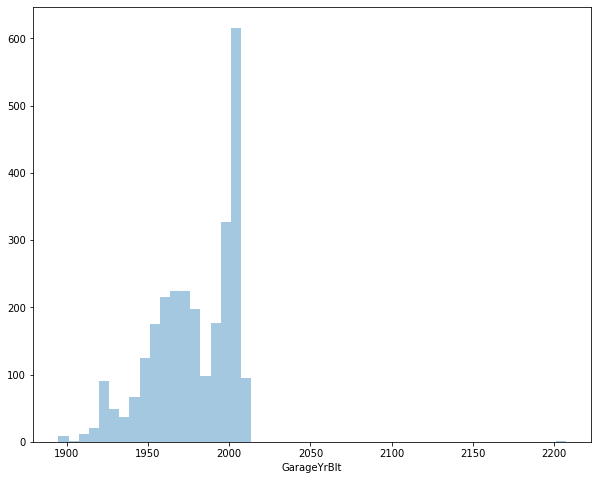

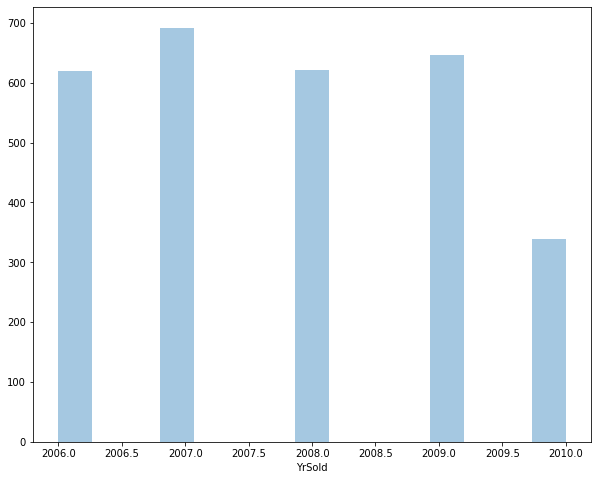

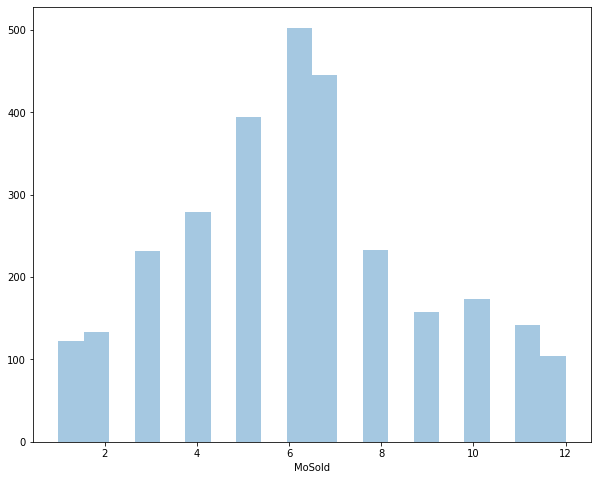

In [50]:
for col in year_cols:
    sns.distplot(data[col], kde=False)
    plt.show()

##  Missing Data
### Identify columns with missing values in combined data

In [51]:
col_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
col_with_na


['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [52]:
for col in col_with_na:
    print('\n', col, ' <--> ', data[col].unique() , ' <--> ', data[col].isnull().sum())


 MSZoning  <-->  [RL, RM, C (all), FV, RH, NaN]
Categories (5, object): [RL, RM, C (all), FV, RH]  <-->  4

 LotFrontage  <-->  [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]  <-->  486

 Alley  <-->  [NaN, Grvl, Pave]
Categories (2, object): [Grvl, Pave]  <-->  2721

 Utilities  <-->  [AllPub, NoSeWa, NaN]
Categories (2, object): [AllPub, NoSeWa]  <-->  2

 Neighborhood  <-->  [CollgCr,


### Analysis of columns with missing values

**Leave 'NAN' in categorical data as it is; it is handled as a category with -1 value** 


LotFrontage - median because it has outliers as per box plot above 

MasVnrArea - mode 

BsmtFinSF1 - median because it has outliers as per box plot above 

BsmtFinSF2 - Drop Column 

BsmtUnfSF - median

TotalBsmtSf  - median

Year columns  - bin them 

GarageArea - median 

Above choice of median/mode is based on the dist and box plots above

# Next steps after analysis

In combined data :
- Bin all the year columns 
- Drop columns that show no relationship
In train data:
- Fill missing values of numerical varaibles as per the above analysis [mean|median|mode of combined data]

## Binning 

Let's see the range of year build columns 

In [53]:
for col in year_cols:
    print(col , ' --> ', data[col].min(), data[col].max(), data[col].max() - data[col].min())

YearBuilt  -->  1872 2010 138
YearRemodAdd  -->  1950 2010 60
GarageYrBlt  -->  1895.0 2207.0 312.0
YrSold  -->  2006 2010 4
MoSold  -->  1 12 11


Let's so equal width binning for all year columns based on combined data

### YearBuilt

In [54]:
yr_built_bins = [1872, 1950, 1960, 1980, 1990, 2000, 2010]

In [55]:
data['bin_yr_built'] = pd.cut(data['YearBuilt'], bins= yr_built_bins, precision=0)

In [56]:
data['bin_yr_built'].value_counts()

(2000, 2010]    735
(1960, 1980]    704
(1872, 1950]    669
(1990, 2000]    361
(1950, 1960]    339
(1980, 1990]    110
Name: bin_yr_built, dtype: int64

### YearRemodAdd

In [57]:
yr_remod_bins = [1950, 1980, 1990, 2000, 2010]

In [58]:
data['bin_yr_remod'] = pd.cut(data['YearRemodAdd'], bins= yr_remod_bins, precision=0)
data['bin_yr_remod'].value_counts()

(2000, 2010]    976
(1950, 1980]    865
(1990, 2000]    562
(1980, 1990]    155
Name: bin_yr_remod, dtype: int64

### GarageYrBlt

In [59]:
yr_garage_bins = [1895, 1950, 1980, 1990, 2000,2207]

In [60]:
data['bin_garage_built'] = pd.cut(data['GarageYrBlt'], bins= yr_garage_bins, precision=0)
data['bin_garage_built'].value_counts()

(1950, 1980]    1030
(2000, 2207]     753
(1990, 2000]     418
(1895, 1950]     391
(1980, 1990]     167
Name: bin_garage_built, dtype: int64

## YrSold

In [61]:
yr_sold_bins = [2006, 2007, 2008, 2009, 2010]
data['bin_yr_sold'] = pd.cut(data['YrSold'], bins= yr_sold_bins, precision=0)
data['bin_yr_sold'].value_counts()

(2006, 2007]    692
(2008, 2009]    647
(2007, 2008]    622
(2009, 2010]    339
Name: bin_yr_sold, dtype: int64

### MoSold

In [62]:
# seperating it in four seasons
month_sold_bins = [1, 4, 6, 9, 12]
#month_sold_bins_lbl = ['spring', 'summer', 'fall', 'winter']
data['bin_mo_sold'] = pd.cut(data['MoSold'], bins= month_sold_bins, precision=0)
data['bin_mo_sold'].value_counts()


(4, 6]     897
(6, 9]     837
(1, 4]     644
(9, 12]    419
Name: bin_mo_sold, dtype: int64

### MSSubClass

come back later 

In [63]:
#'MSSubClass': [20,30,40,45,50, 60,70,75,80,85,90,120,150,160,180,190], 


## Drop Columns

Drop columns that are not contributinmeaningfully and also binned columns

In [64]:
to_be_dropped_cols = ['BsmtFinSF2' , 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 
                      'ScreenPorch', 'MiscVal', 'PoolArea', 
                      'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']

In [65]:
data.drop(to_be_dropped_cols, axis=1, inplace =True)
data.shape

(2919, 74)

## Filling missing values

Fill in missing values for following columns only
- LotFrontage --> median 
- MasVnrArea  --> median

Let's first split the data into test and train

In [66]:
test_data = data[data['SalePrice'] == -999]
test_data.shape

(1459, 74)

In [67]:
test_data.drop('SalePrice', axis =1, inplace =True)
test_data.shape

/Users/adeela/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(1459, 73)

In [68]:
train_data = data[data['SalePrice'] != -999]
train_data.shape

(1460, 74)

In [69]:
#now check any cols with missing data in training data
[col for col in train_data.describe().columns if train_data[col].isnull().sum() > 0]

['LotFrontage', 'MasVnrArea']

In [70]:
train_data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)

/Users/adeela/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [71]:
train_data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)

In [72]:
#now check any cols with missing data
[col for col in train_data.describe().columns if train_data[col].isnull().sum() > 0]

[]

# Save for later use

In [73]:
#save data to file
pd.to_pickle(train_data, 'data/train_data_cat_missing_binning_handled.pkl')
pd.to_pickle(test_data, 'data/test_data_cat_missing_binning_handled.pkl')